<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/rl/baselines-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to OpenAI on Colab


## Step 1: Installation for Colab - just execute these cells and do not worry too much

* http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb 
* https://docs.microsoft.com/en-us/message-passing-interface/microsoft-mpi
* https://nyu-cds.github.io/python-mpi/setup/
* https://medium.com/@kaleajit27/reinforcement-learning-on-google-colab-9cb2e1ef51e


In [1]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [2]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [3]:
!pip install pyvirtualdisplay
!pip install piglet

In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [1]:
# !pip install -e git+https://github.com/openai/baselines#egg=berater
!pip install git+https://github.com/openai/baselines

  Cloning https://github.com/openai/baselines to /tmp/pip-req-build-488k08p3
  Running setup.py bdist_wheel for baselines ... - \ | done
  Stored in directory: /tmp/pip-ephem-wheel-cache-_h43m1l9/wheels/d8/55/79/53870462a2ec11a80a4edf582cd45f173da693fe317190ee29
Successfully built baselines


In [6]:
!pip install JSAnimation

In [7]:
!pip install gym

In [0]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 144)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='once'))

## Step 2: Understanding Standard Environments

The OpenAI gym provides us with a number of environments. You could view then as simulators that 

1. deiliver observations and rewards based on
1. actions executed by an agent who learns to behave well in the simulated world

The environment also defines which actions are allowed (actions space) and how observations look like (observation space). The agent should try to maximize the cumulated reward.

![Learning Cycle](http://gym.openai.com/assets/docs/aeloop-138c89d44114492fd02822303e6b4b07213010bb14ca5856d2d49d6b62d88e53.svg)

Links
* http://gym.openai.com/docs/
* https://github.com/openai/gym


In [9]:
import gym
# env = gym.make('CartPole-v0')
# env = gym.make('MountainCar-v0')
# env = gym.make('Pendulum-v0')

# https://github.com/openai/gym#atari
# http://gym.openai.com/envs/MsPacman-v0/

env = gym.make('MsPacman-v0') 
# env = gym.make('SpaceInvaders-v0')

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [10]:
env.action_space

Discrete(9)

In [11]:
env.observation_space

Box(210, 160, 3)

In [12]:
# Run a demo of the environment
observation = env.reset()
cumulated_reward = 0

frames = []
for t in range(1000):
#     print(observation)
    frames.append(env.render(mode = 'rgb_array'))
    # very stupid agent, just makes a random action within the allowd action space
    action = env.action_space.sample()
#     print("Action: {}".format(t+1))    
    observation, reward, done, info = env.step(action)
#     print(observation)
#     print(reward)
    cumulated_reward += reward
    if done:
        print("Episode finished after {} timesteps, accumulated reward = {}".format(t+1, cumulated_reward))
        break
env.close()

Episode finished after 711 timesteps, accumulated reward = 260.0



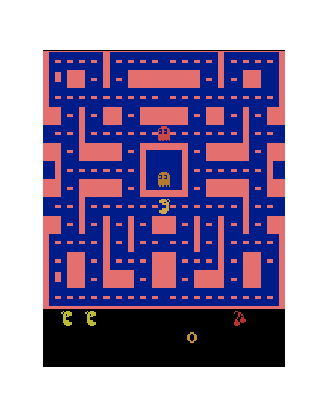
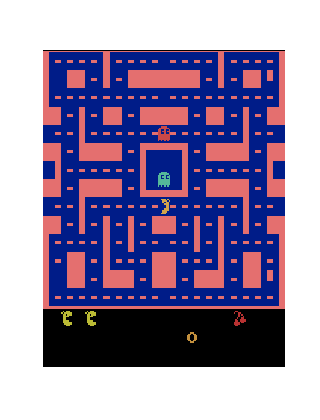
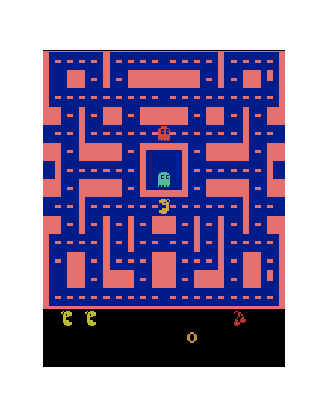
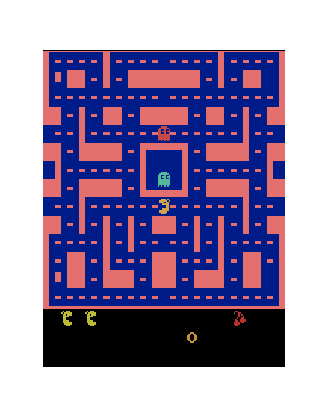
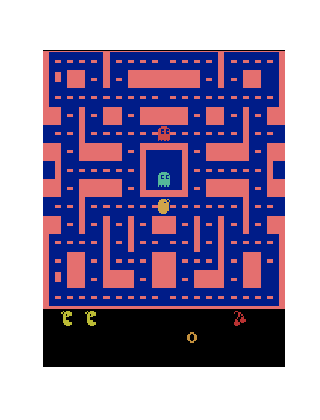
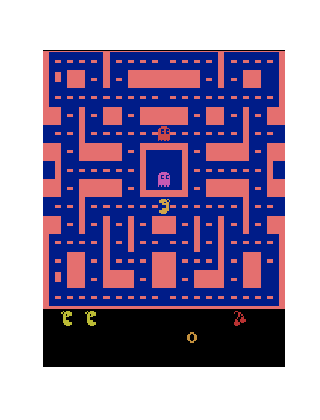
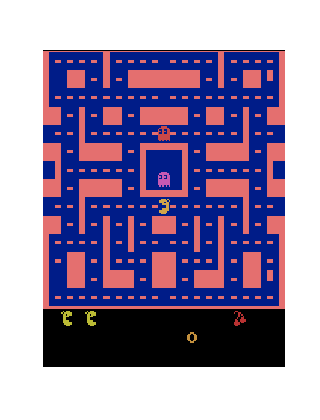
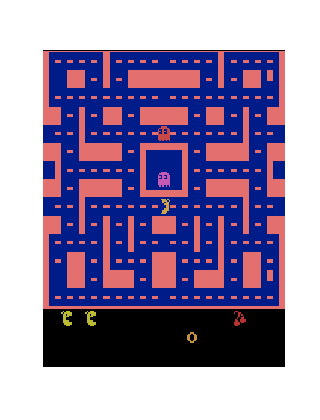
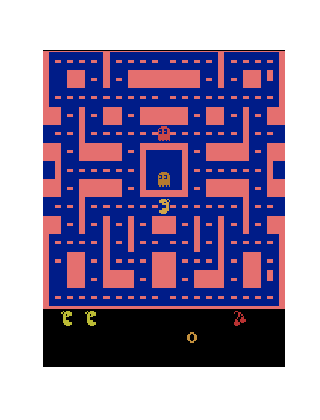
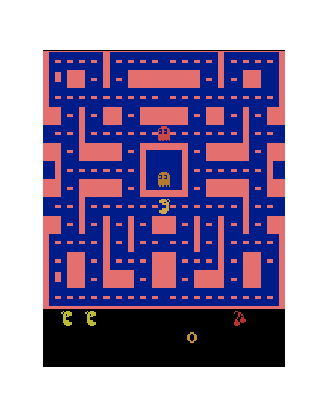
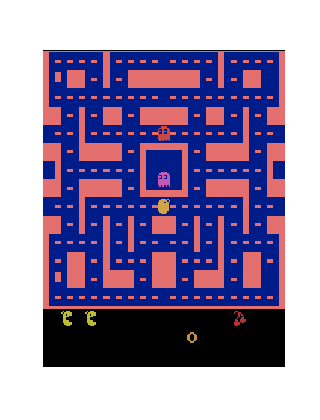
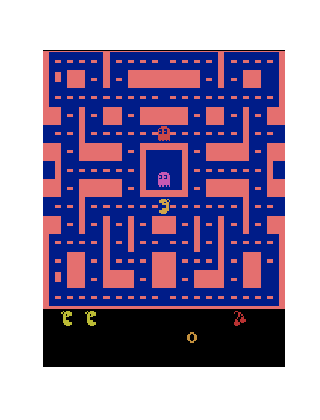
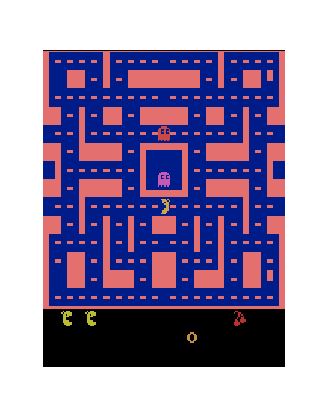
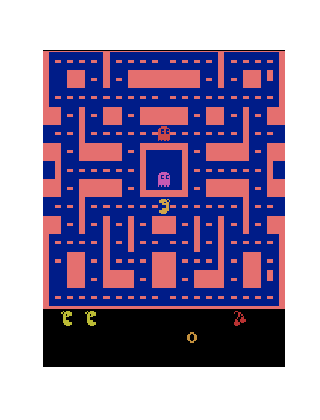
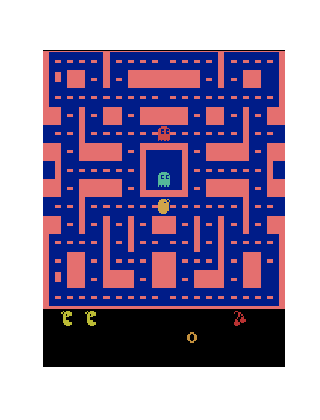
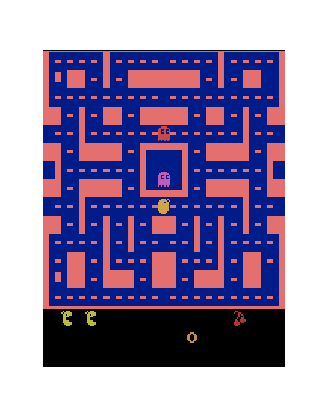
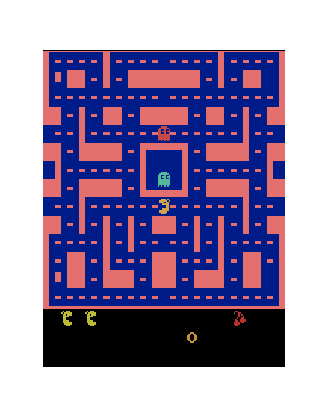
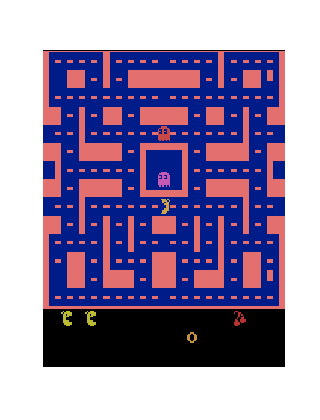
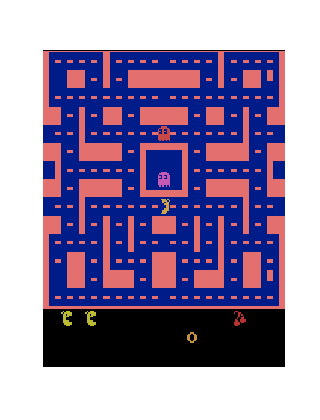
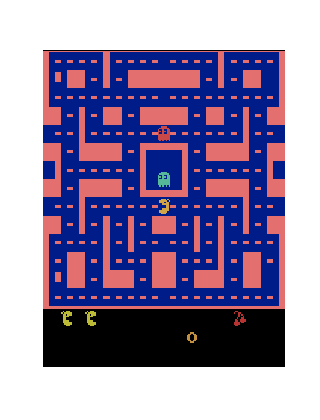
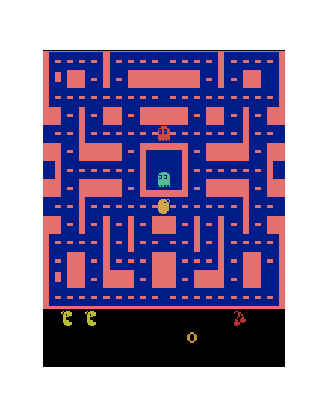
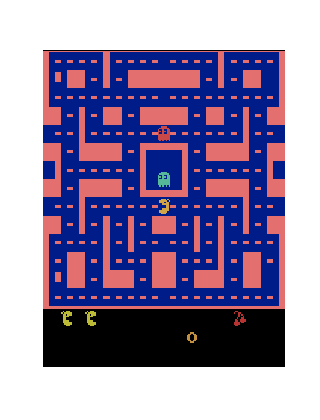
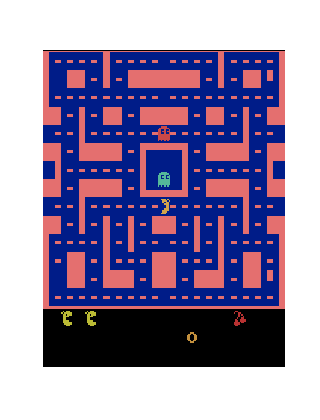
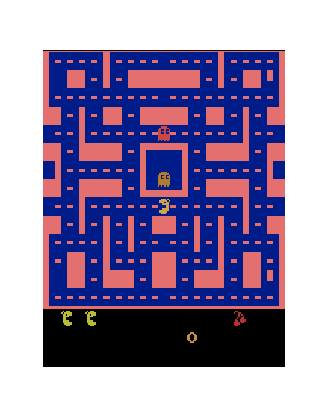
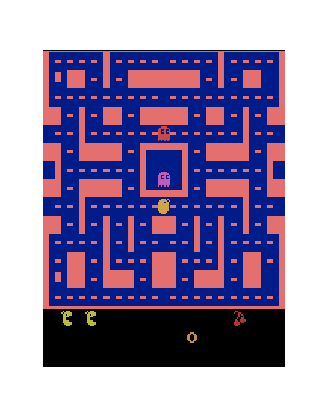
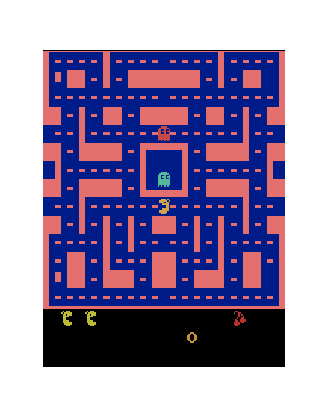
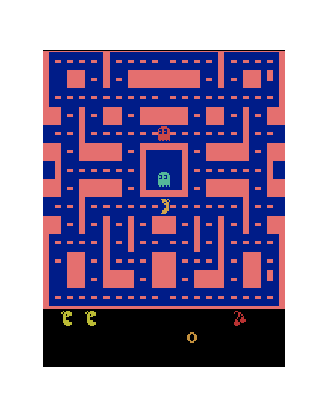
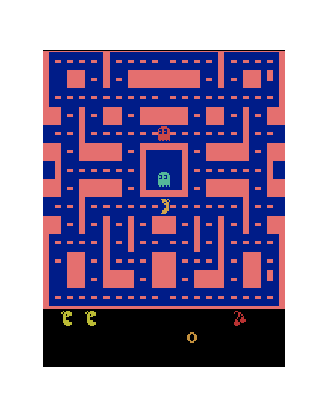
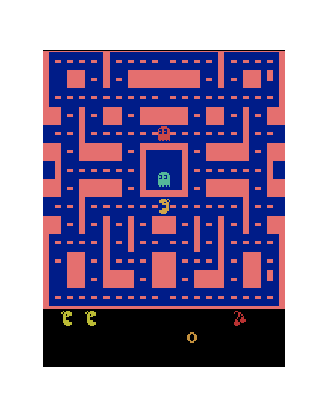
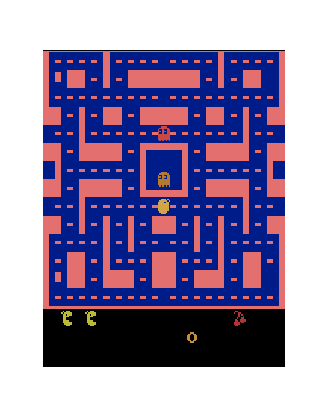
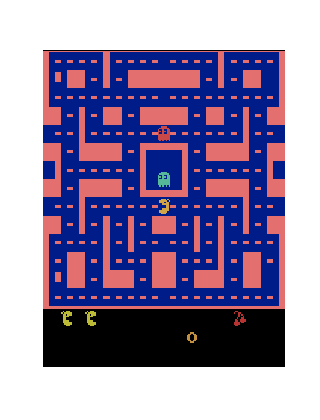
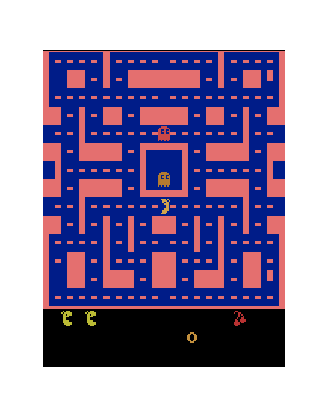
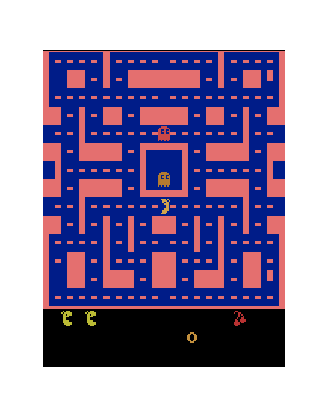
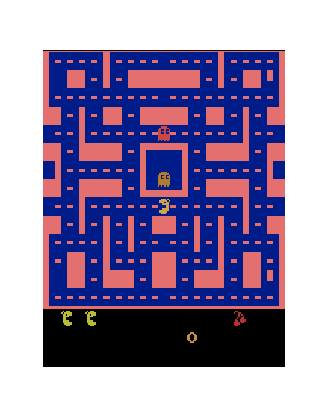
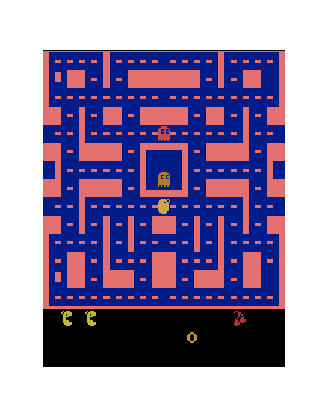
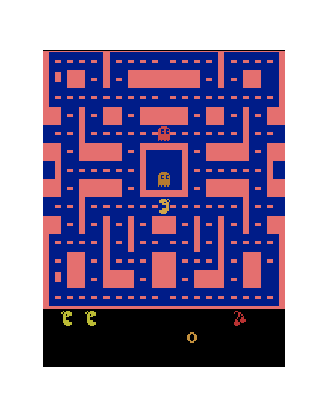
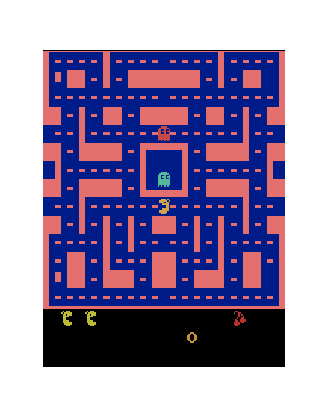
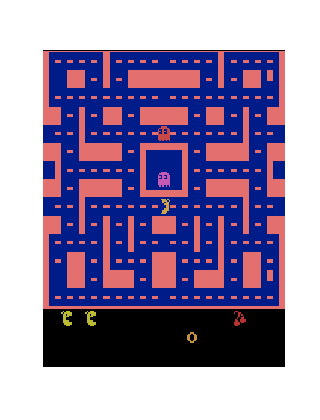
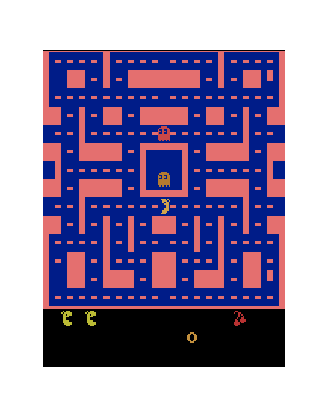
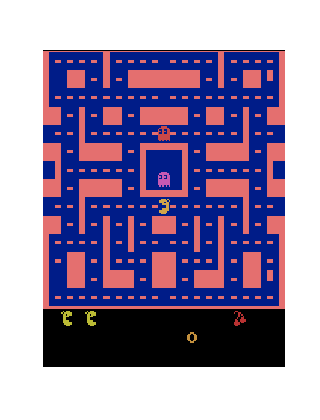
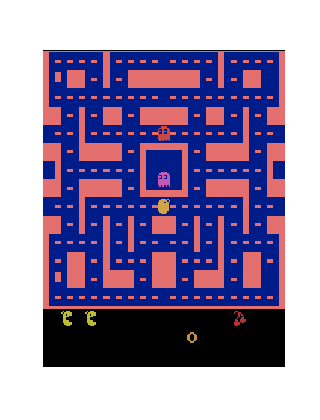
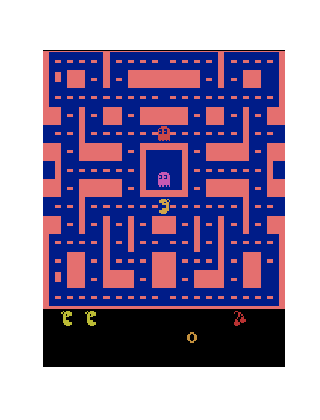
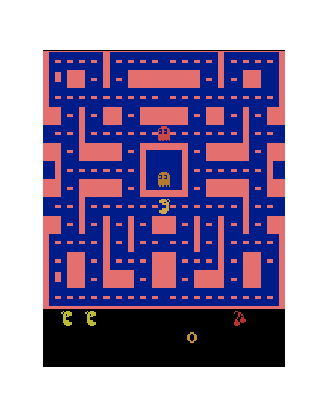
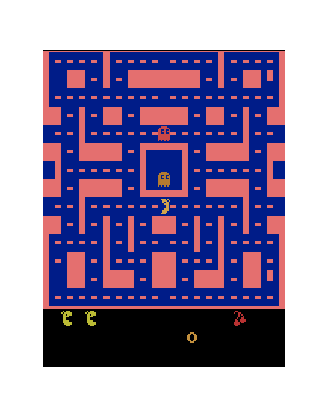
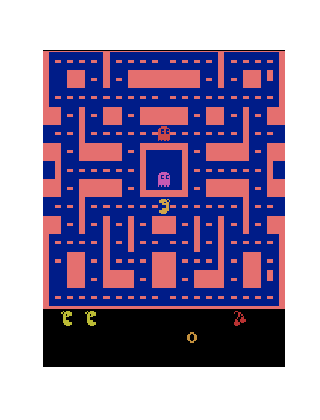
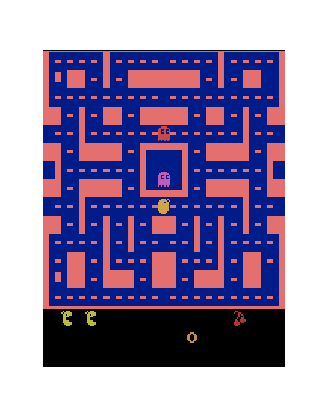
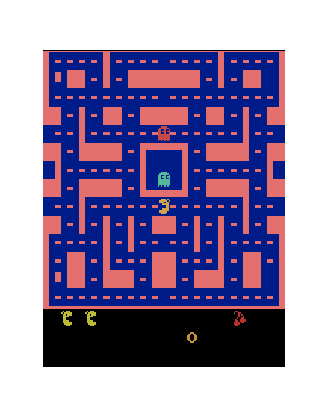
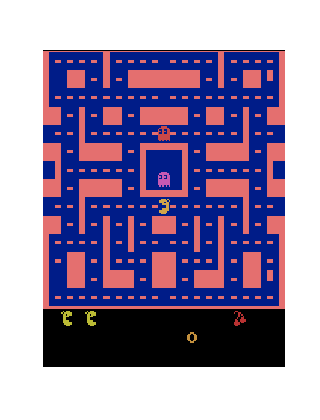
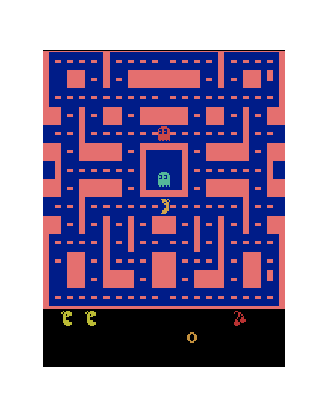
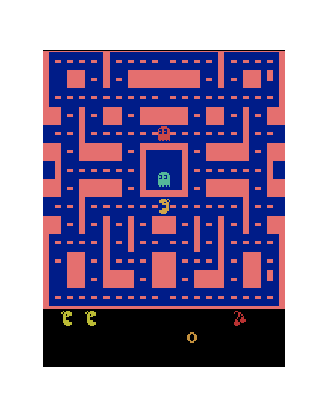
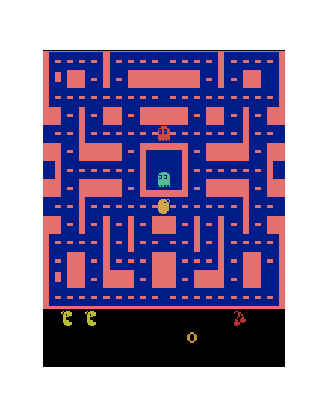
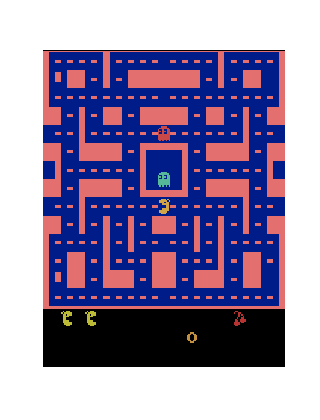
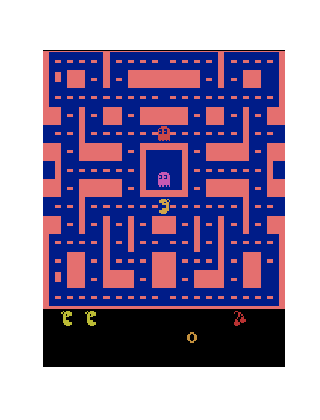
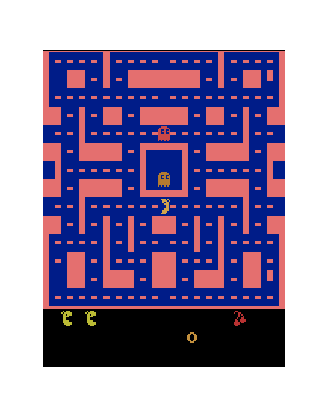
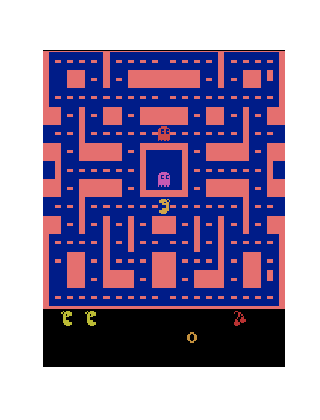
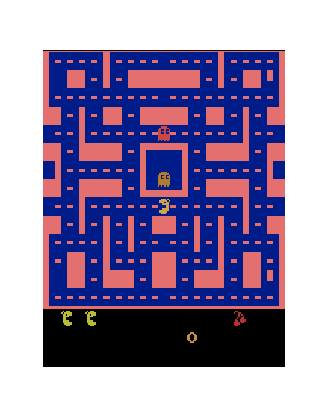
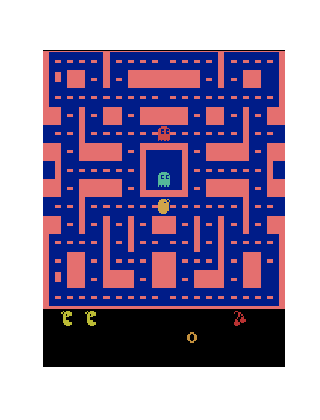
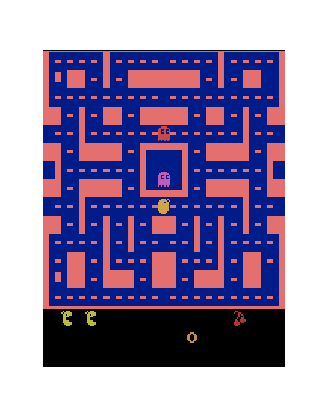
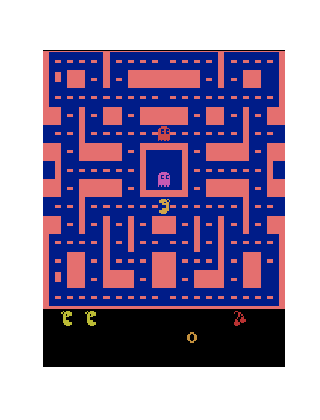
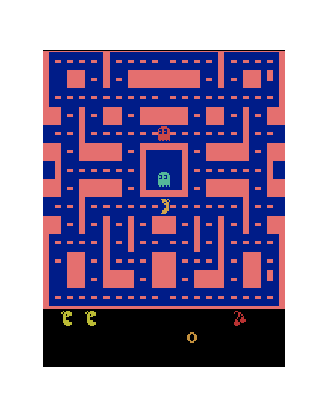
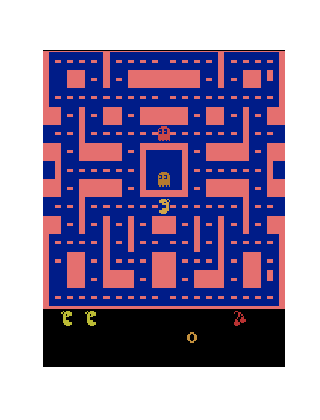
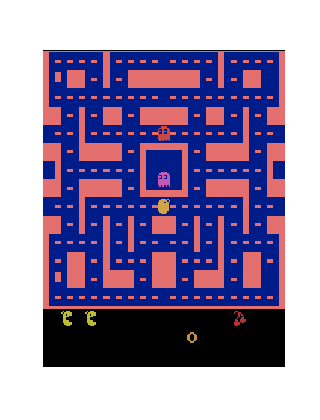
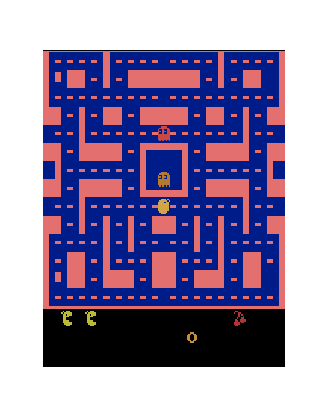
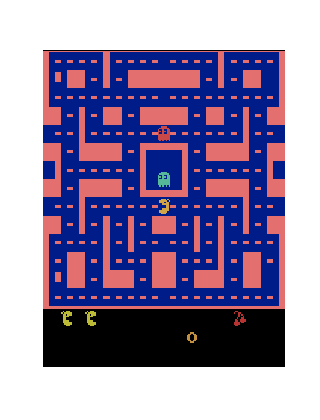
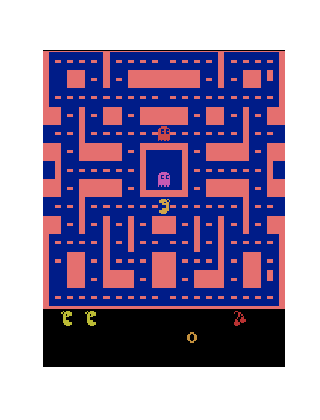
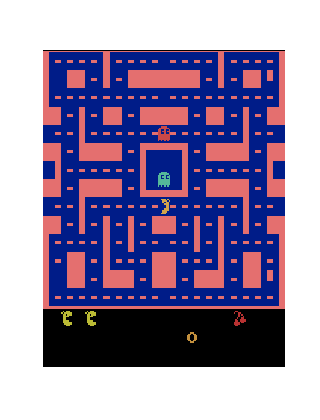
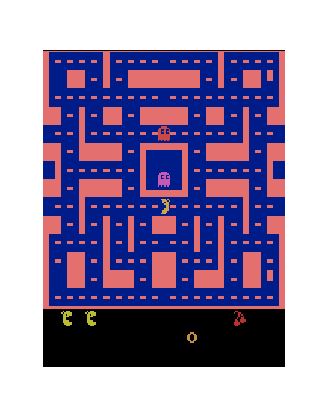
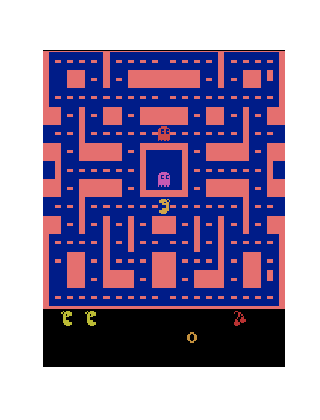
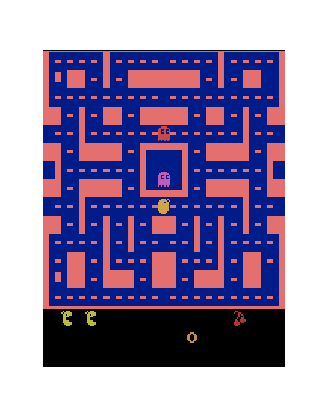
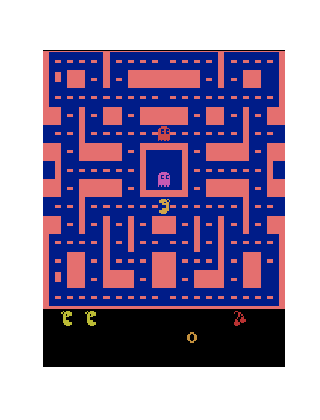
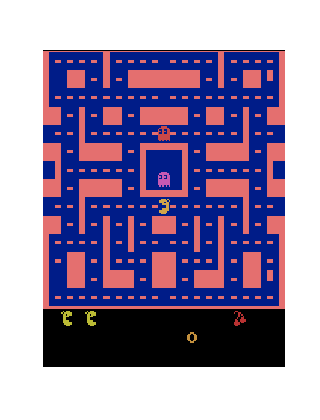
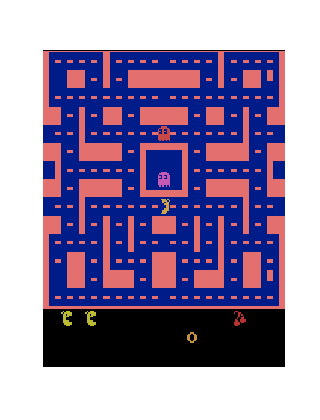
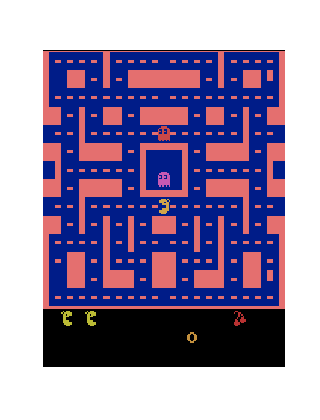
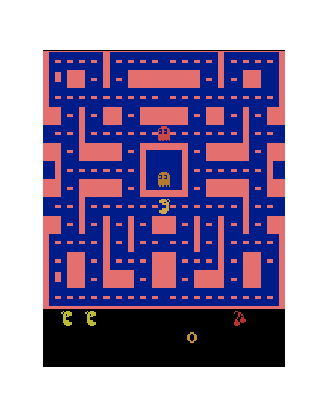
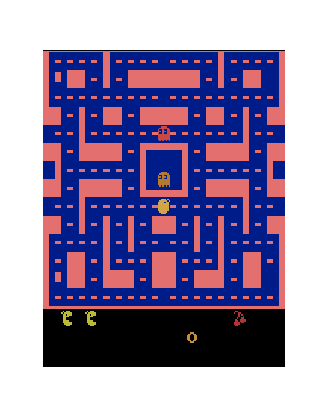
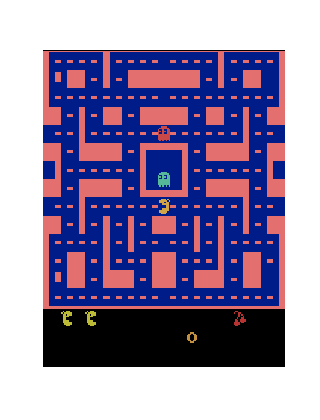
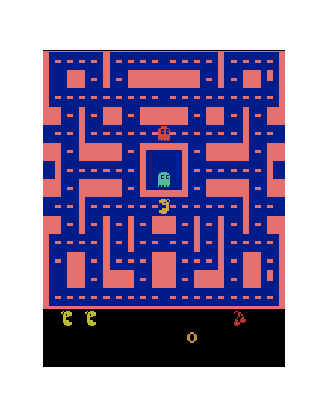
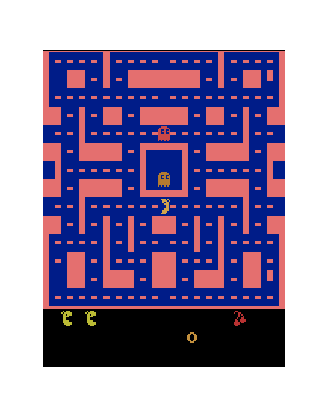
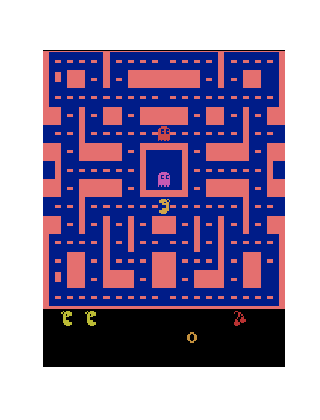
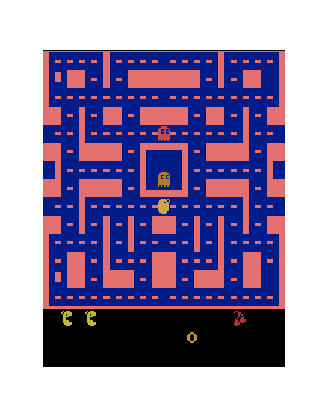
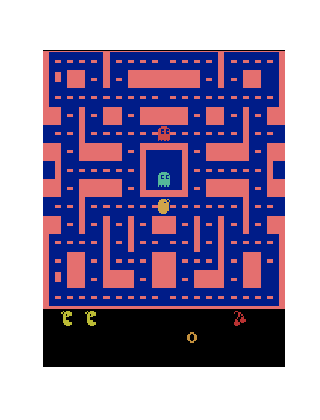
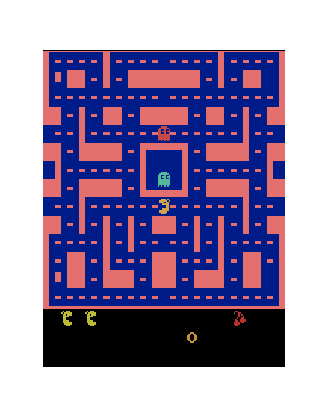
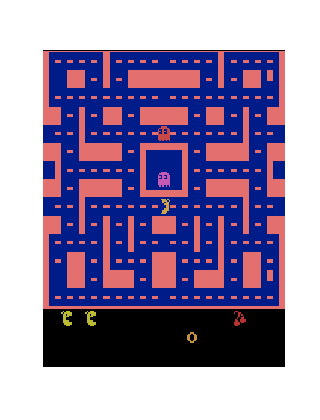
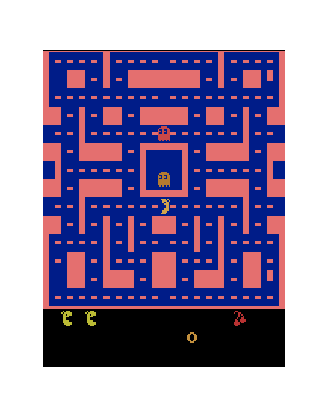
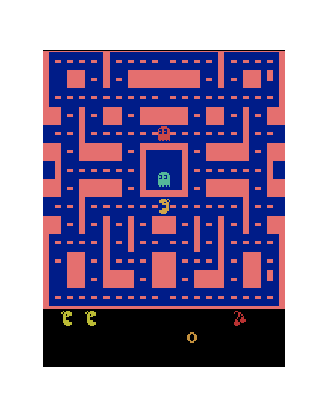
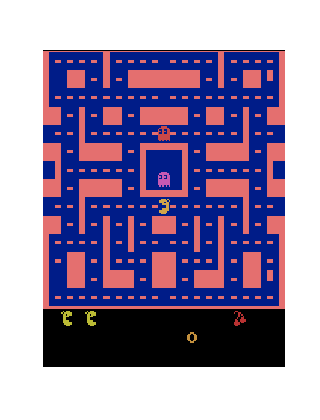
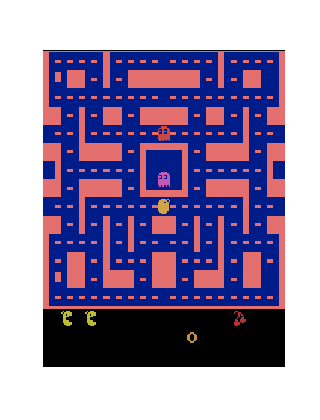
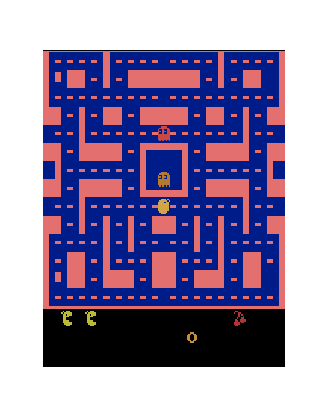
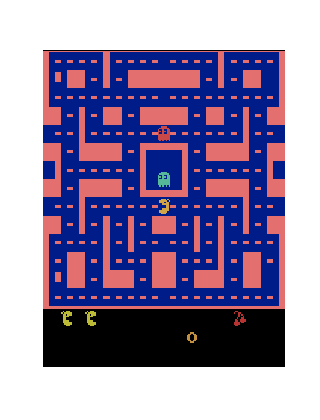
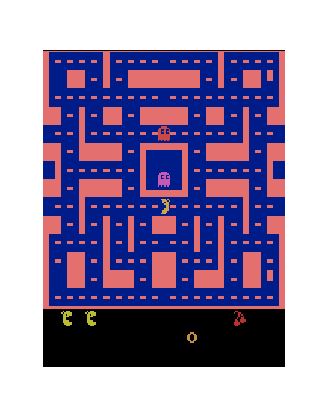
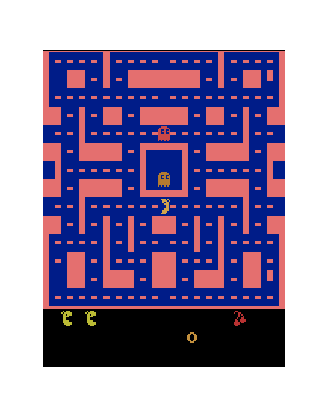
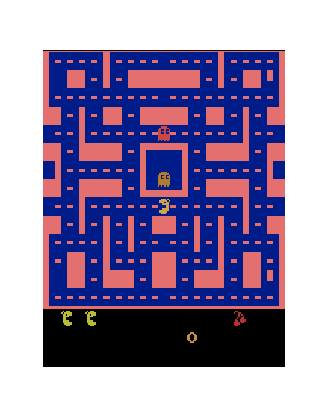
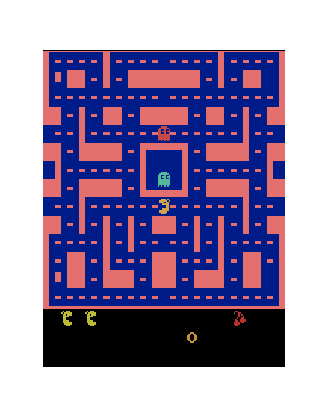
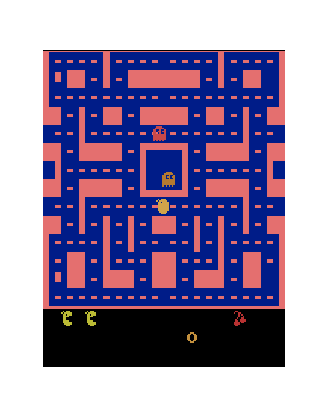
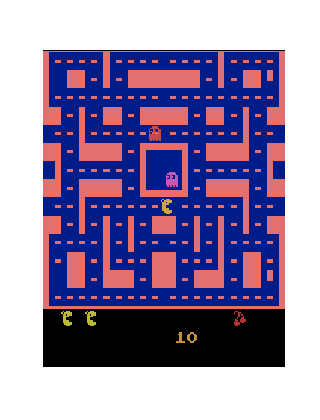
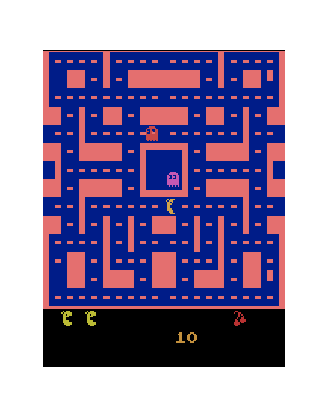
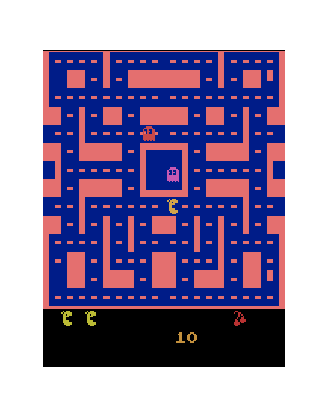
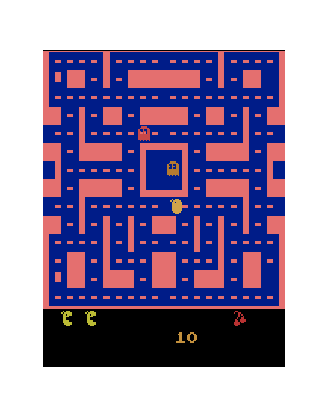
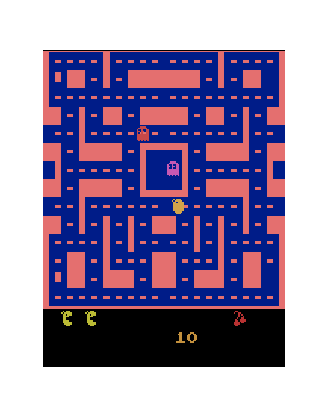
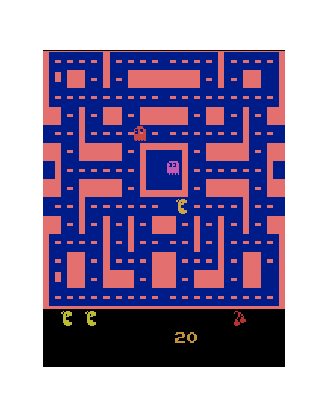
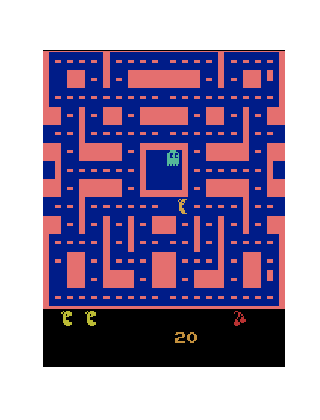
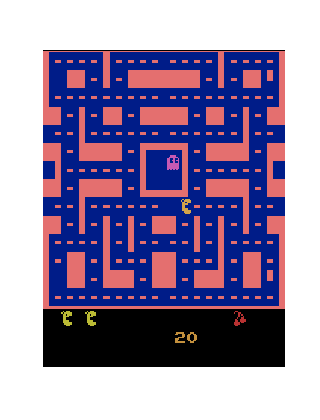
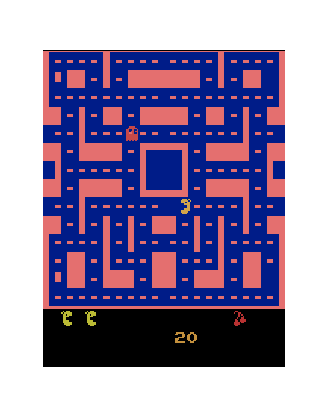
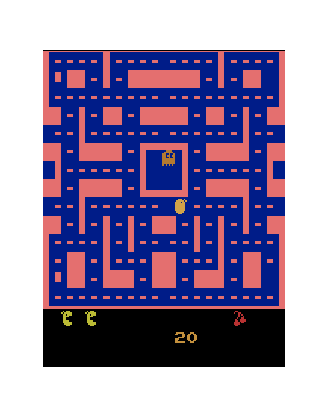
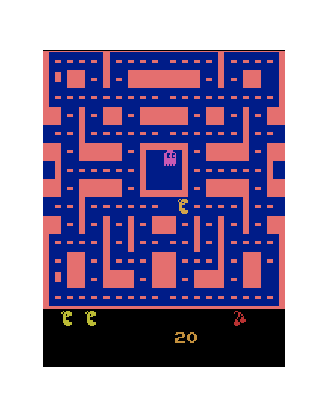
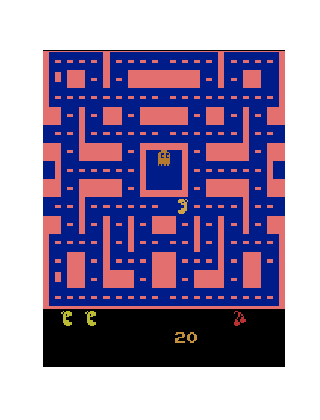
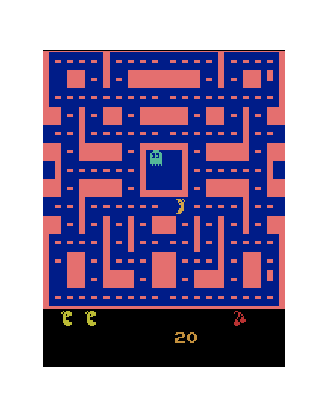
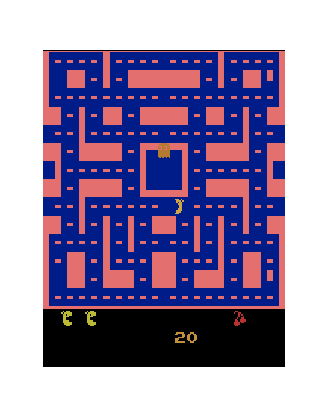
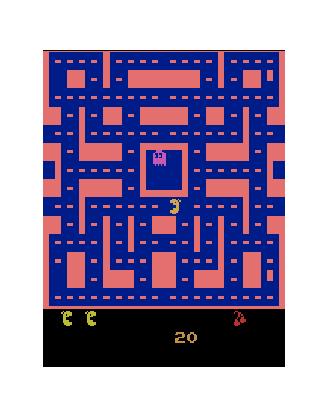
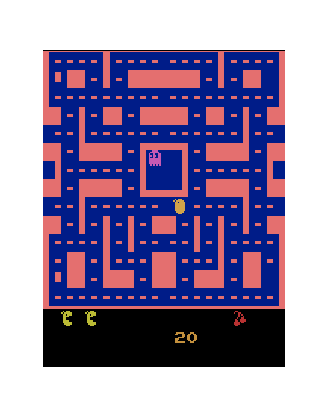
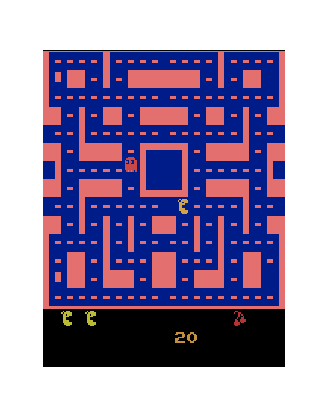
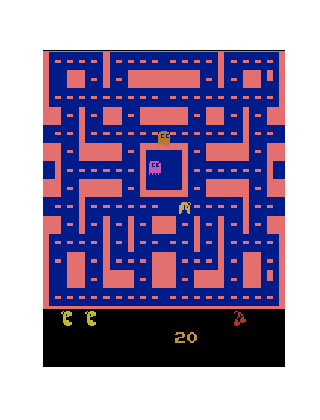
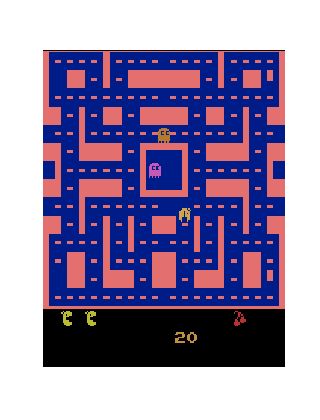
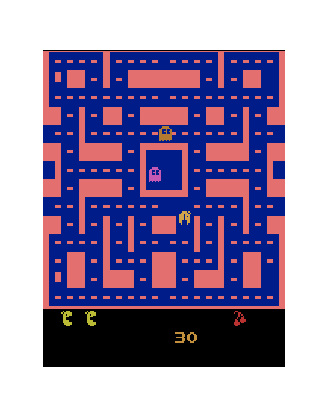
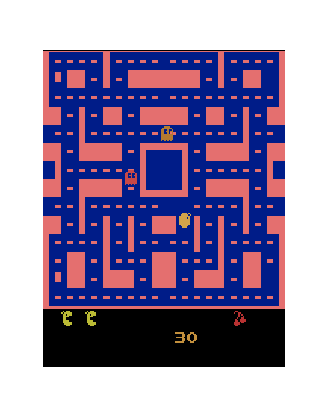
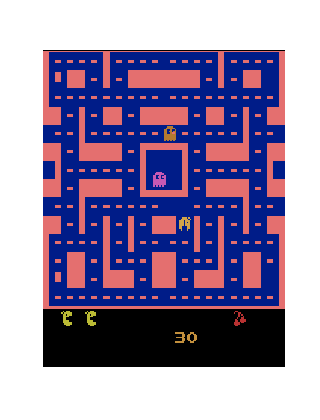
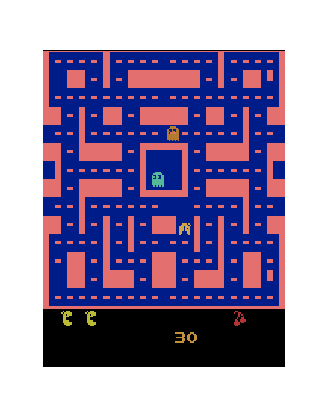
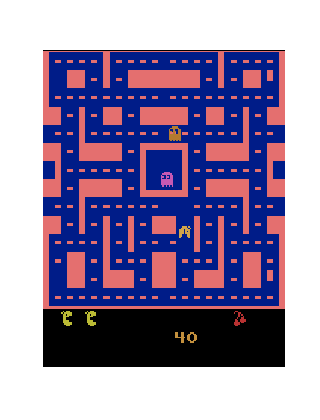
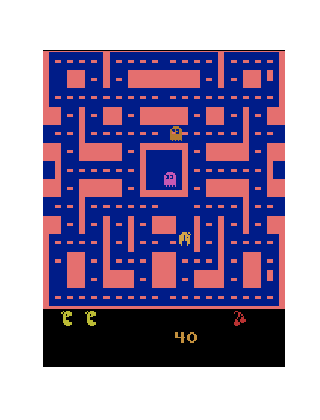
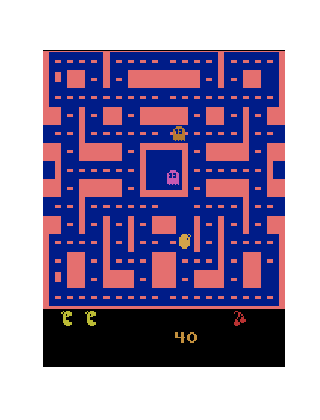
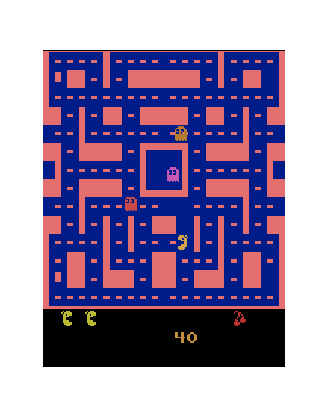
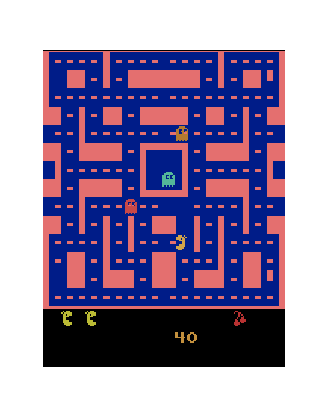
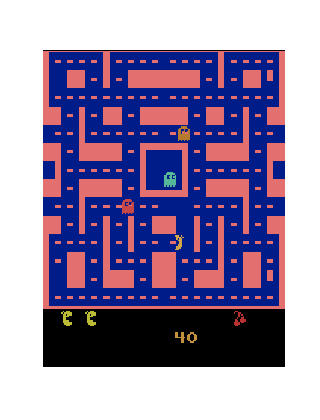
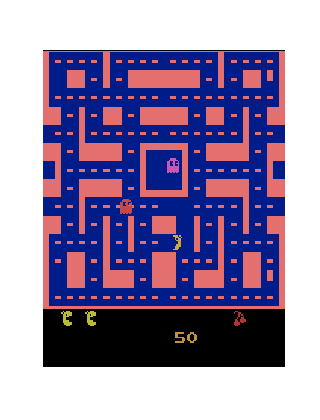
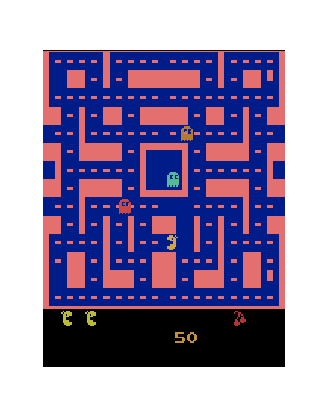
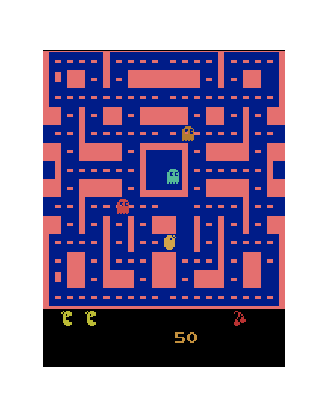
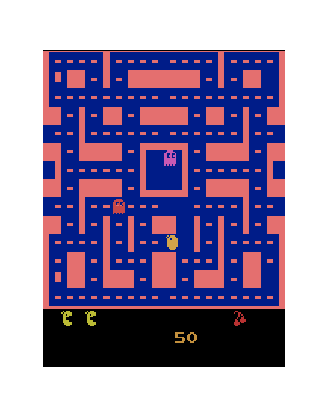
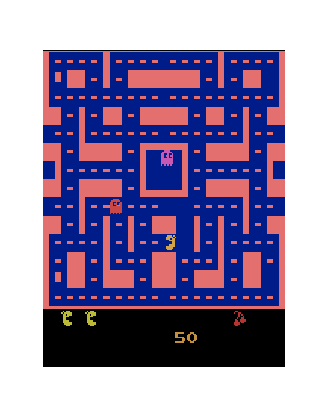
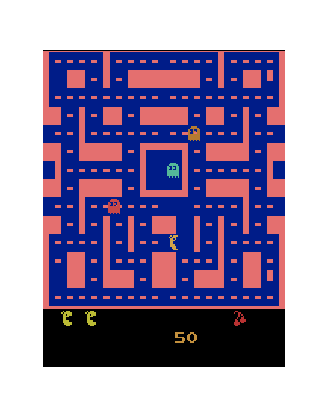
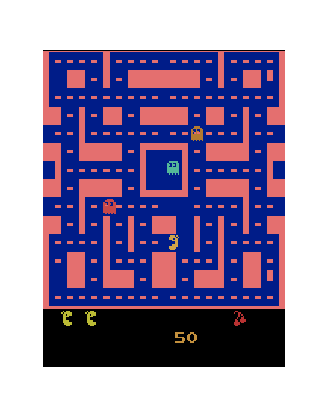
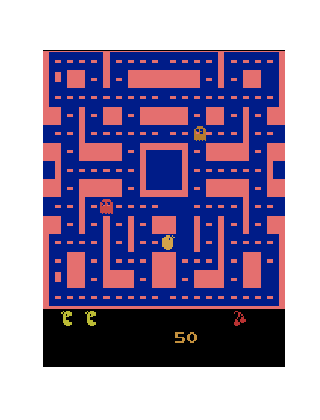
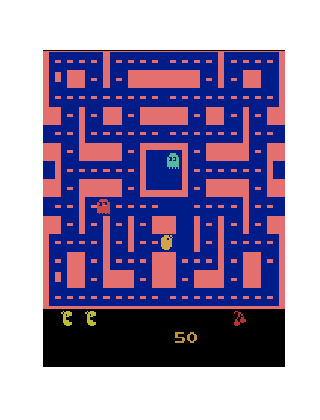
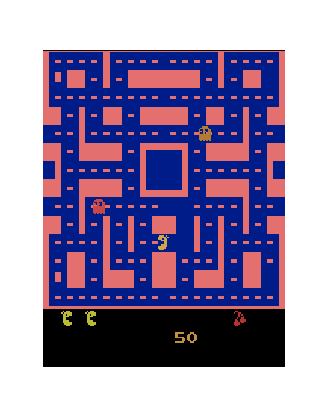
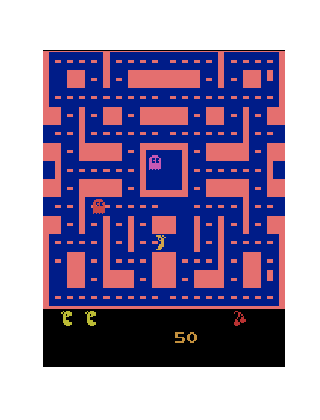
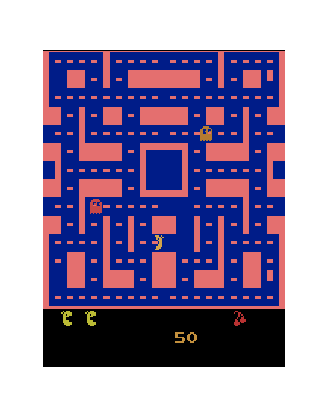
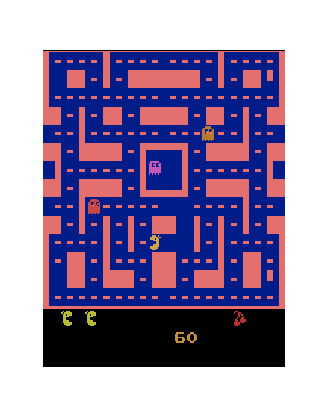
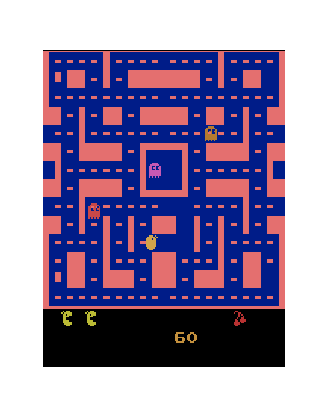
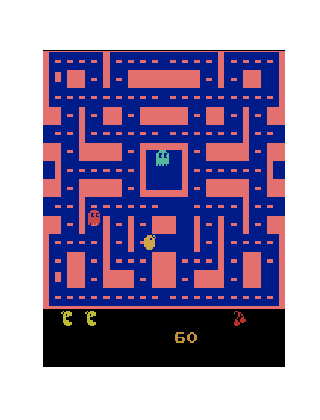
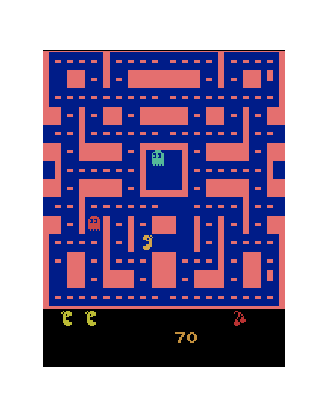
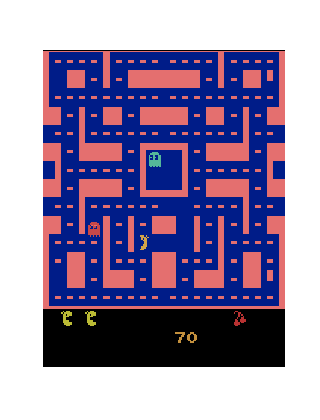
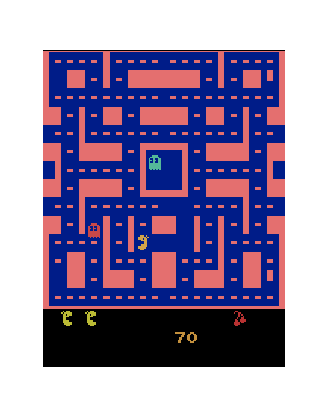
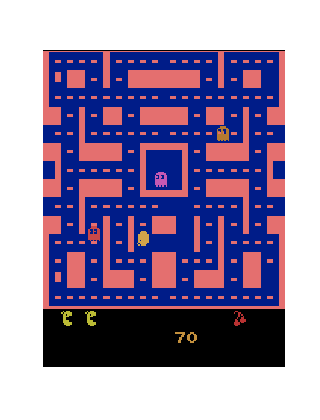
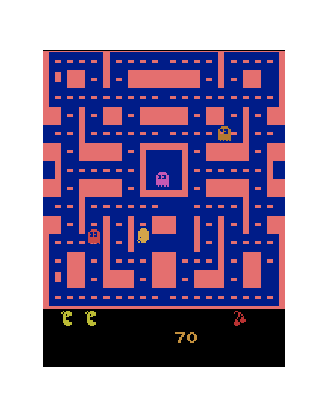
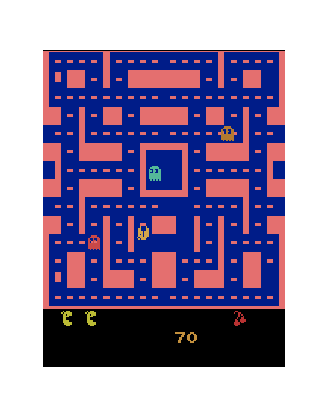
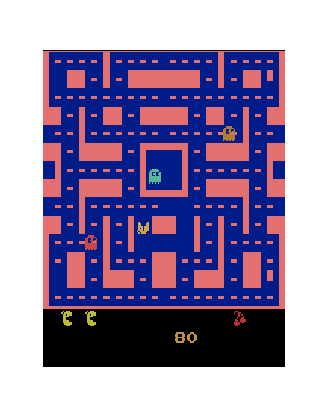
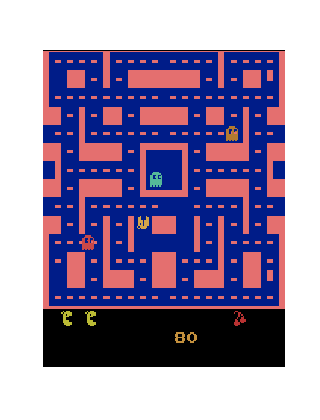
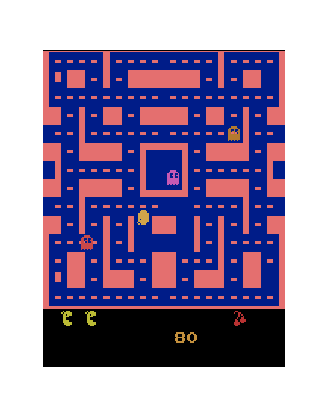
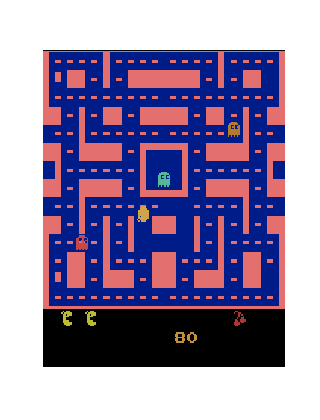
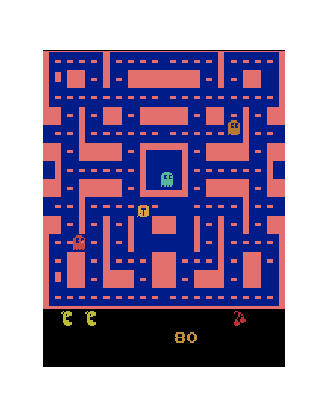
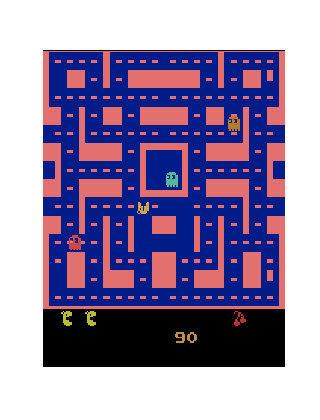
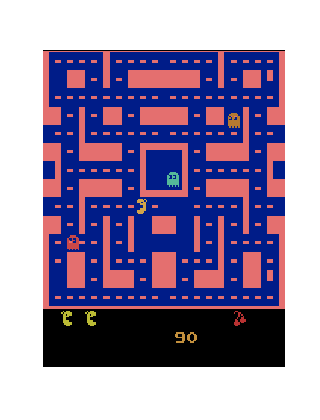
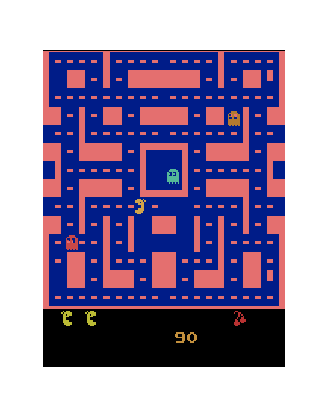
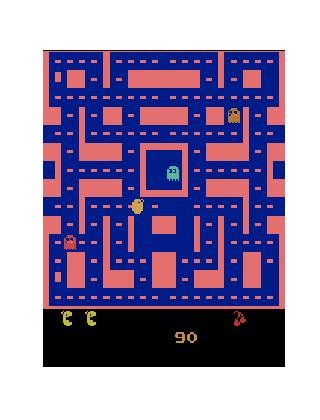
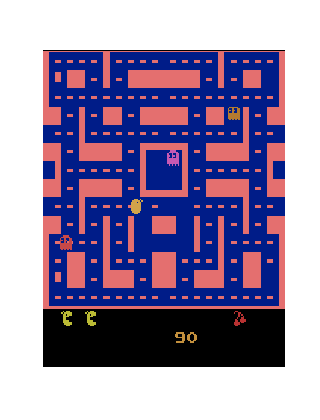
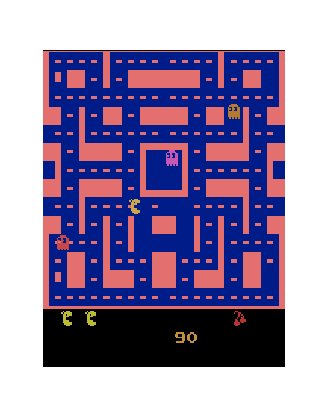
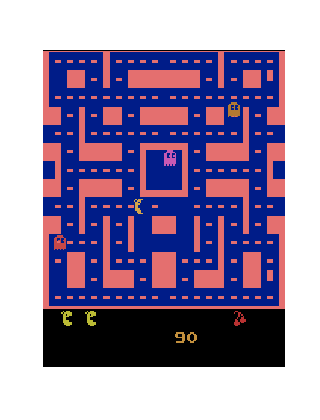
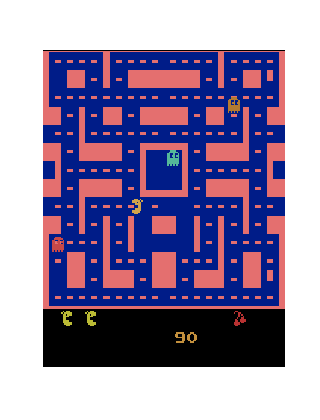
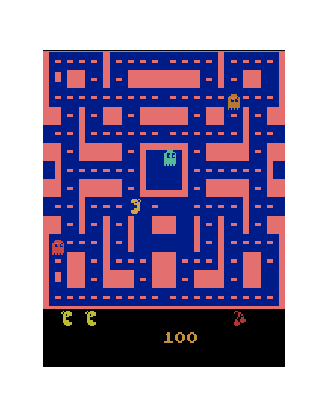
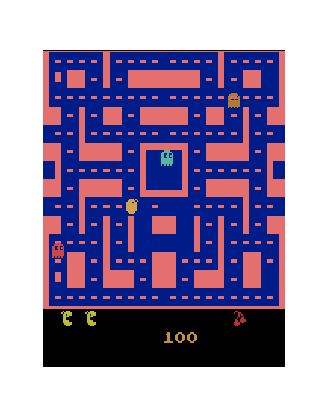
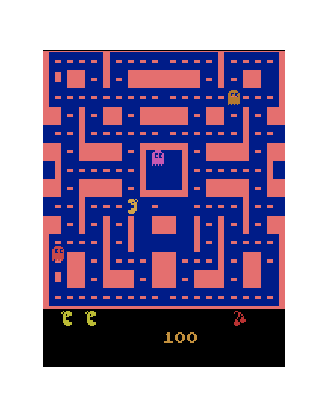
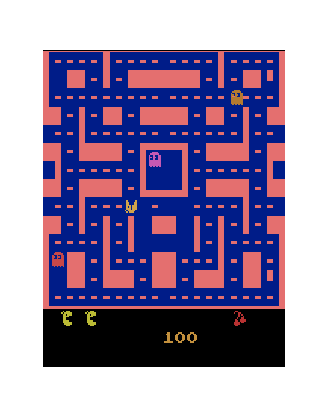
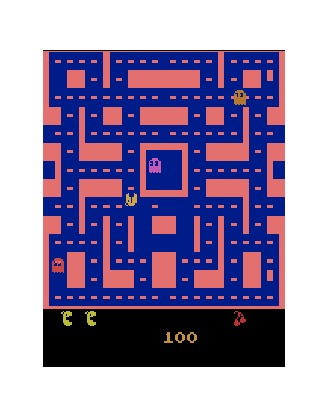
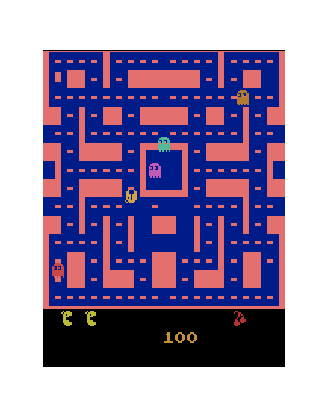
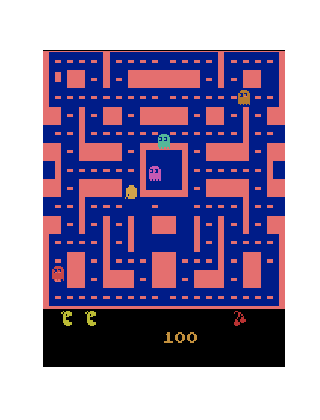
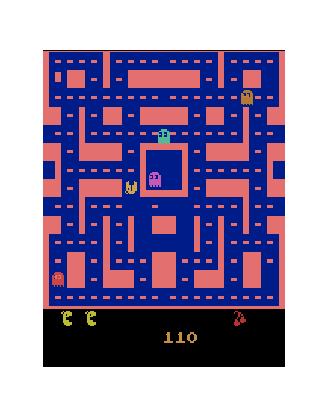
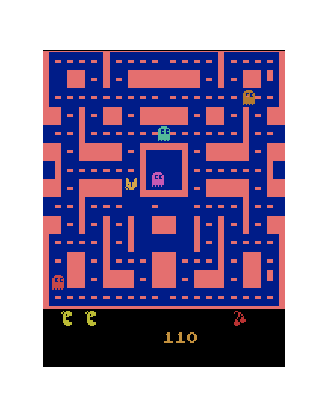
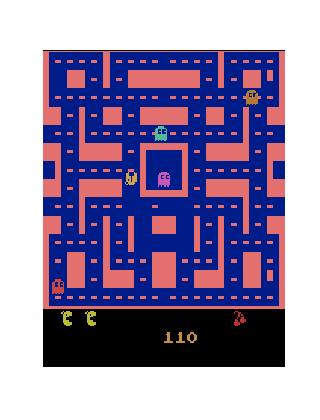
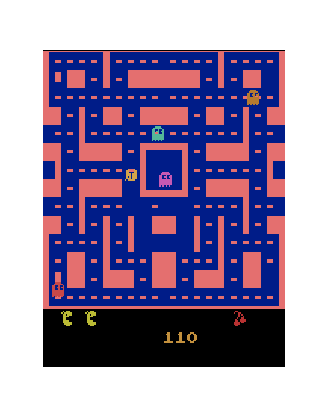
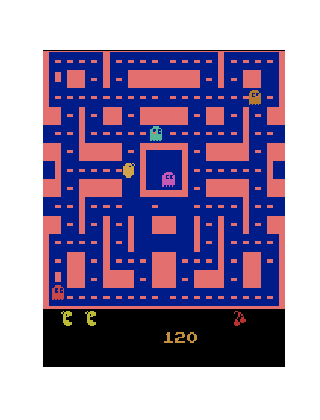
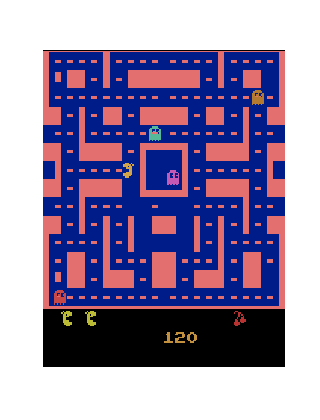
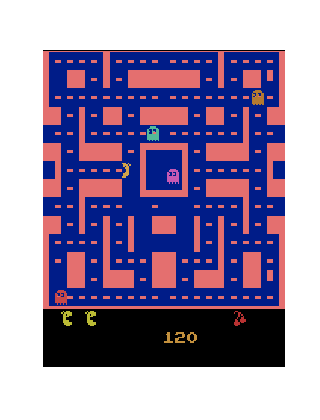
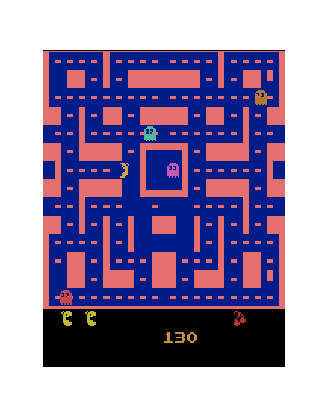
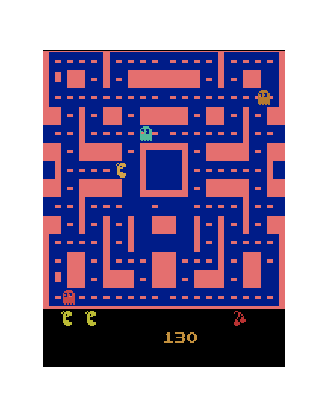
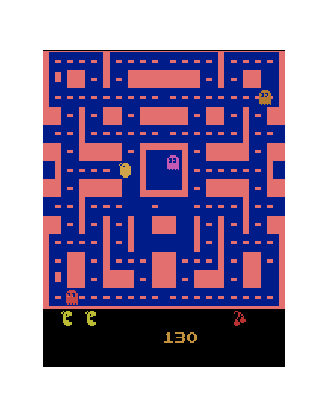
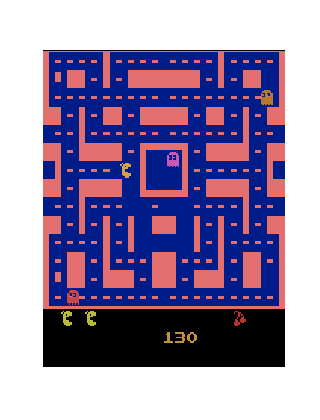
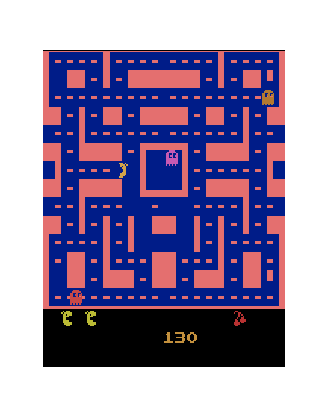
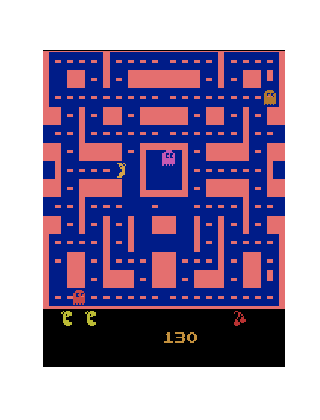
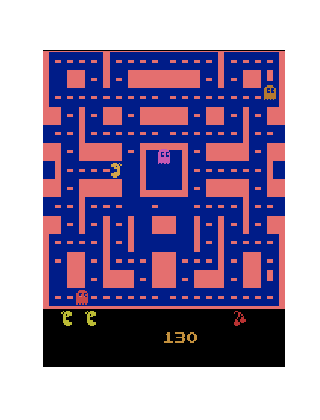
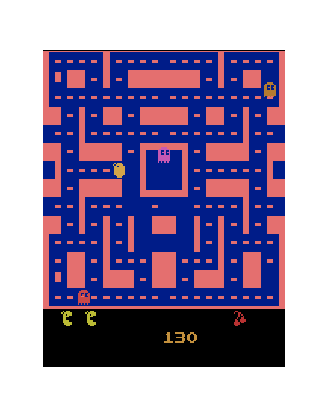
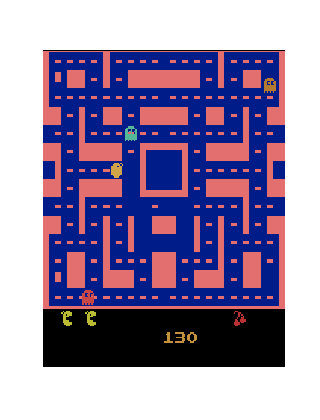
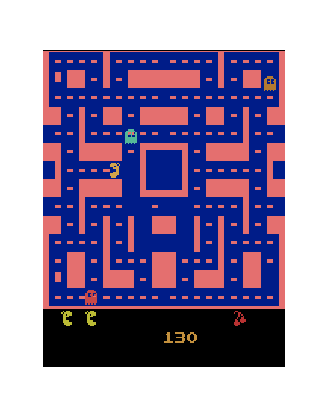
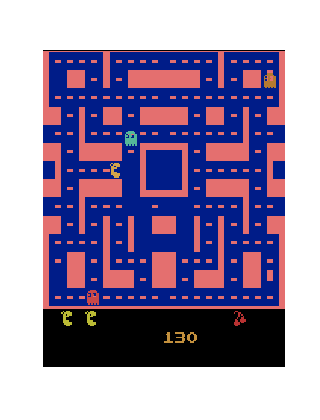
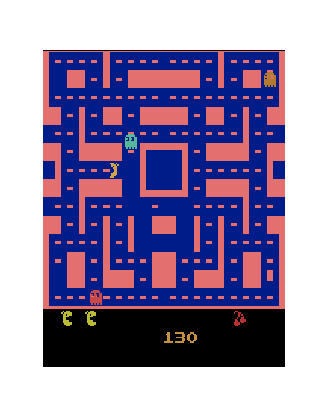
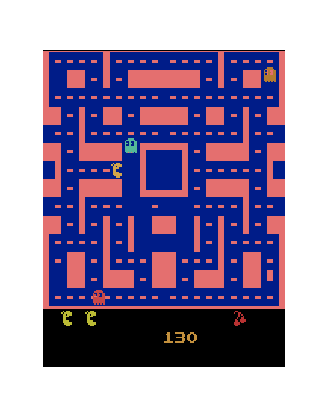
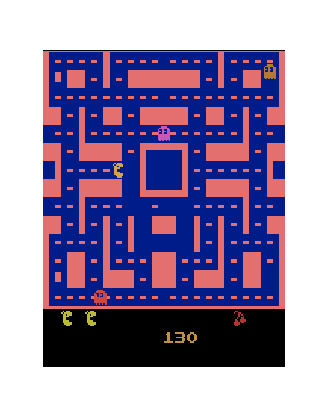
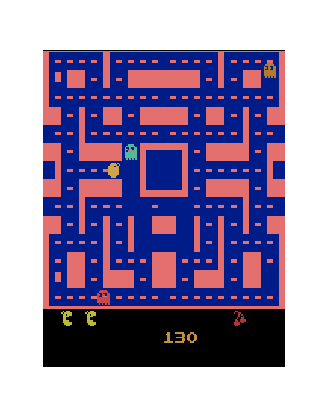
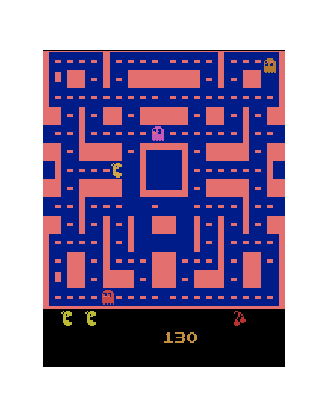
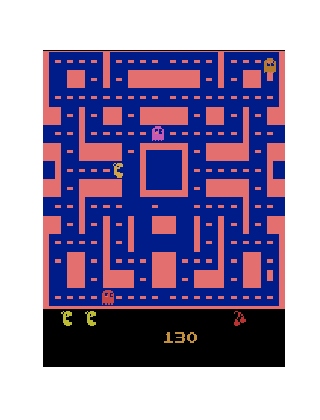
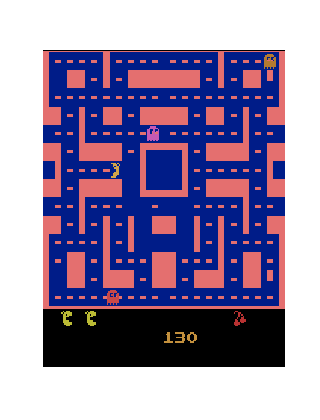
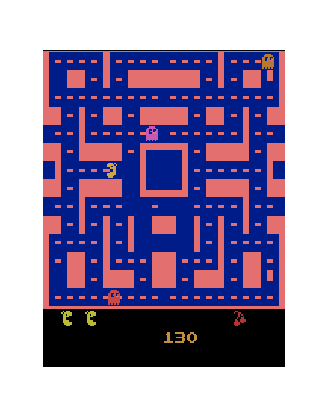
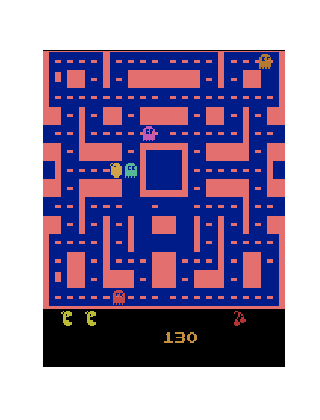
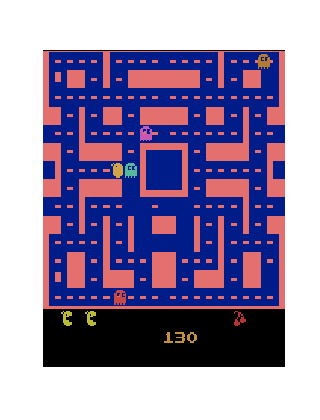
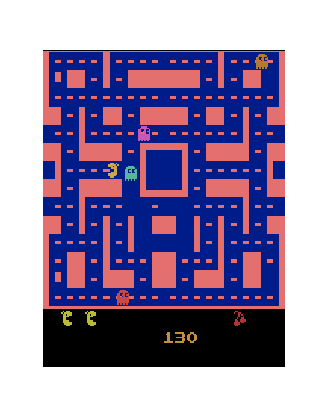
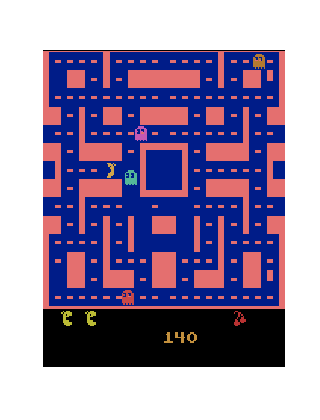
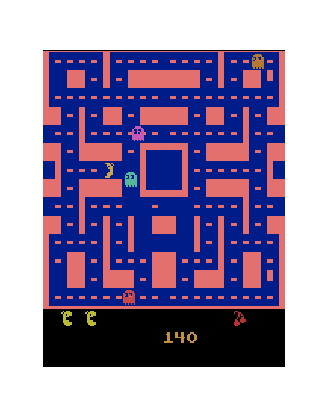
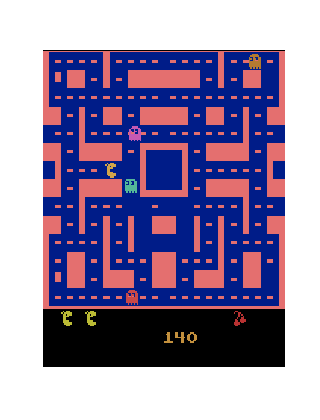
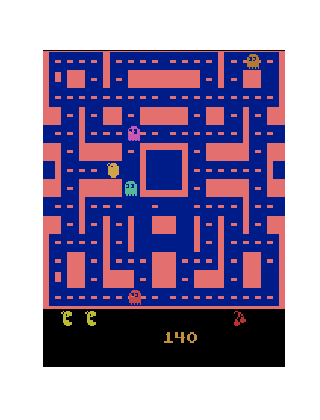
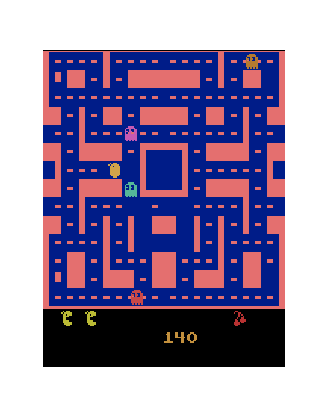
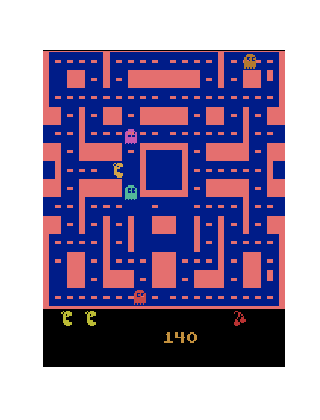
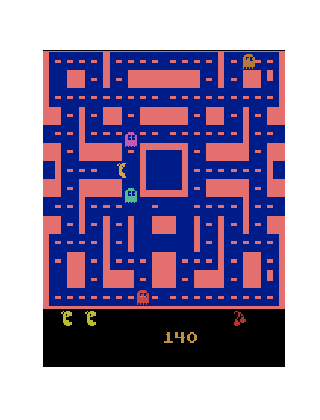
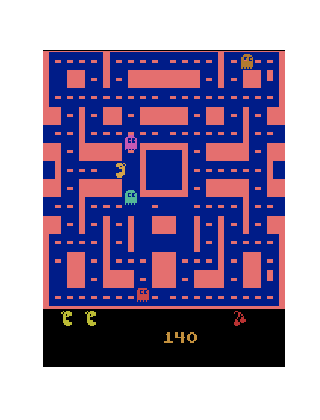
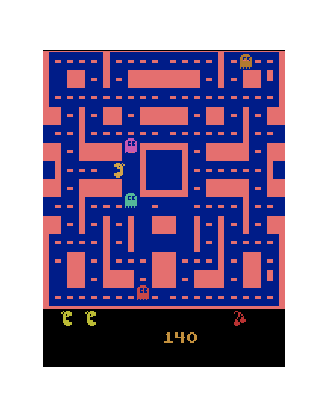
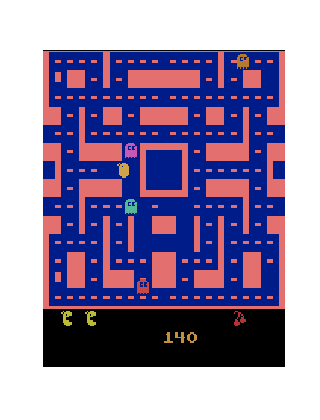
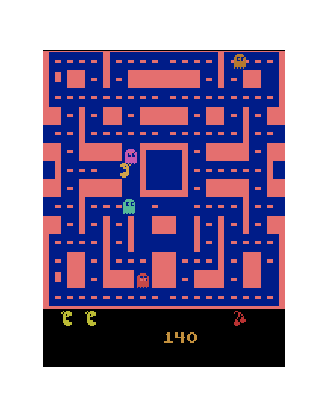
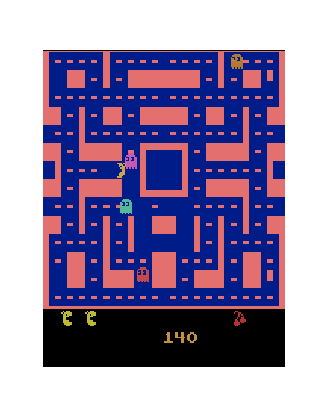
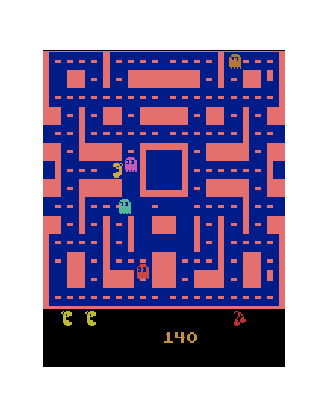
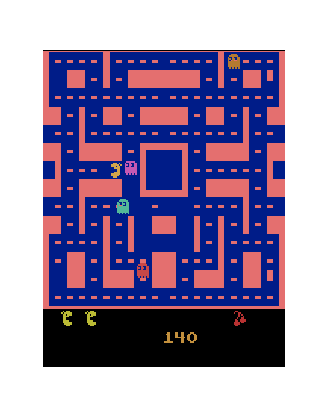
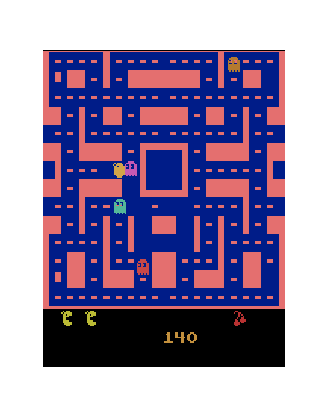
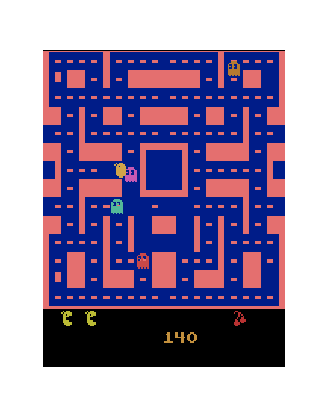
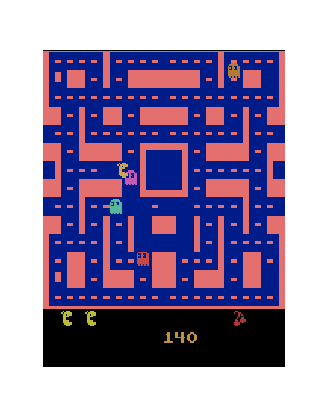
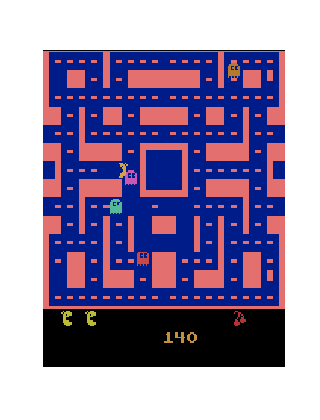
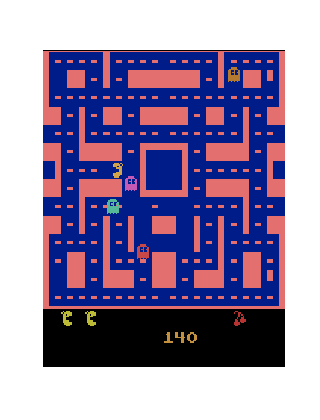
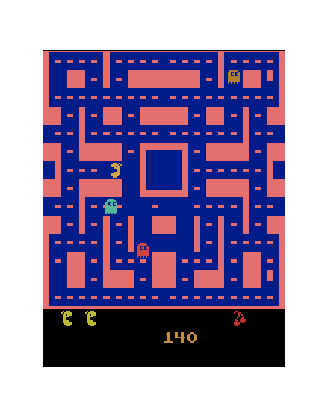
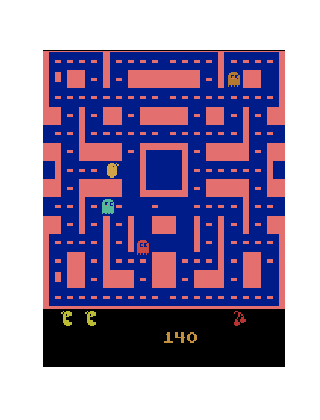
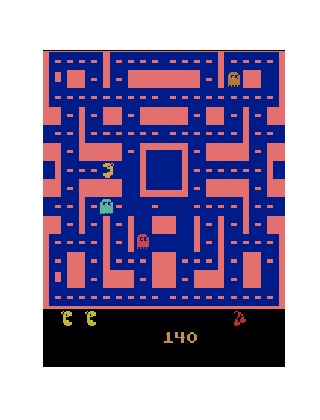
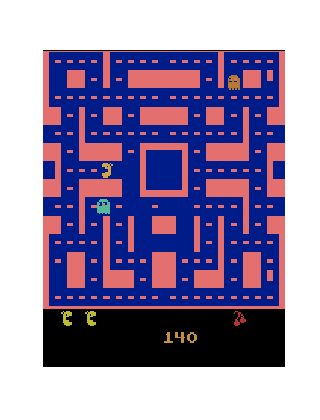
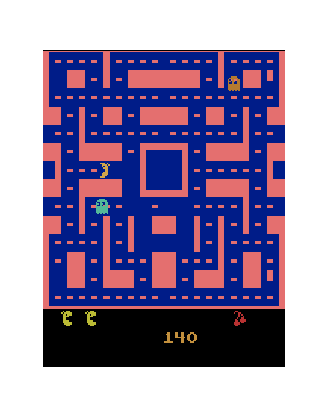
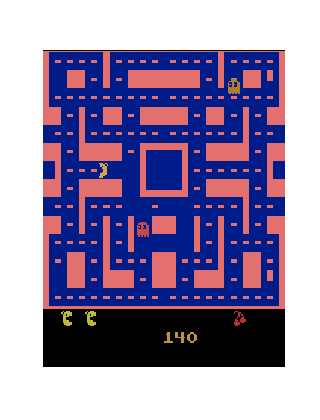
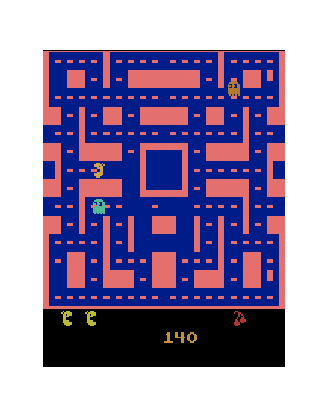
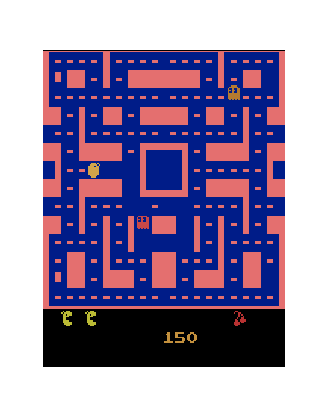
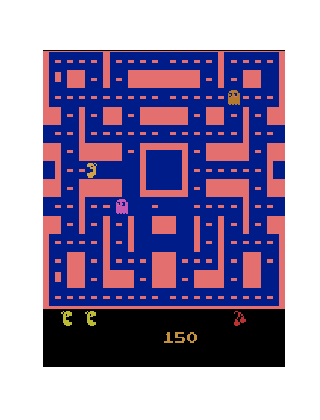
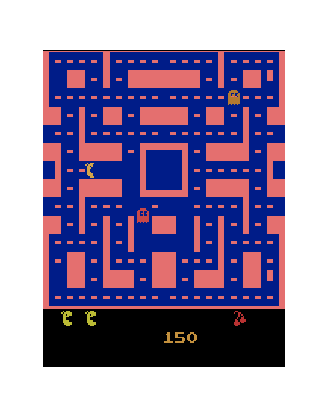
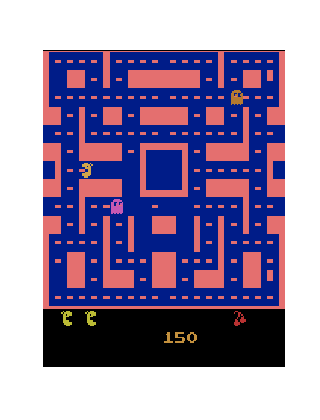
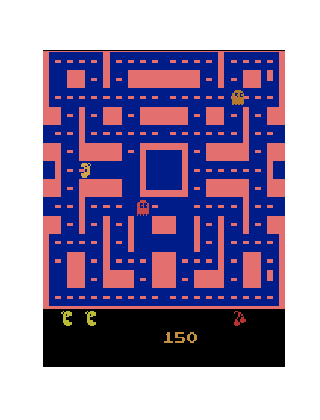
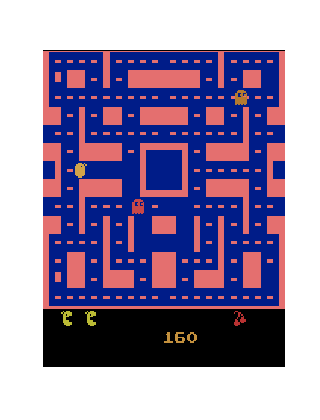
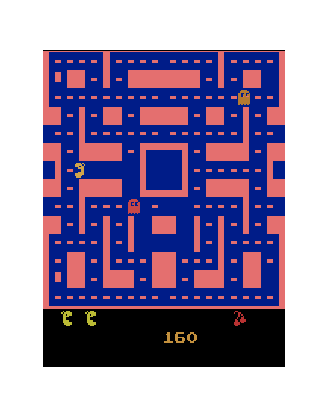
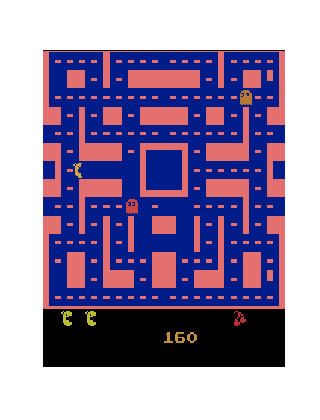
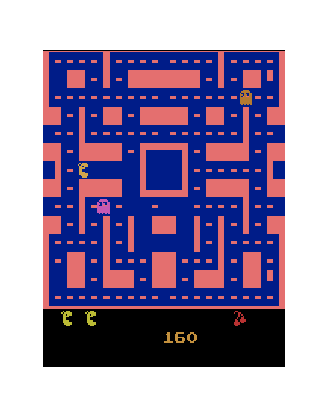
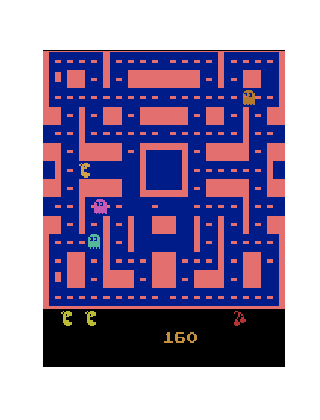
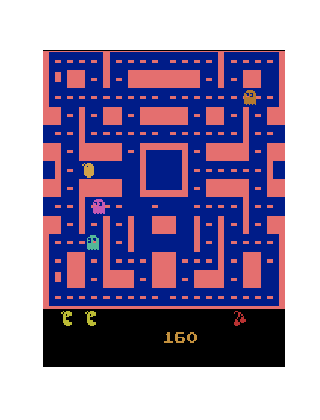
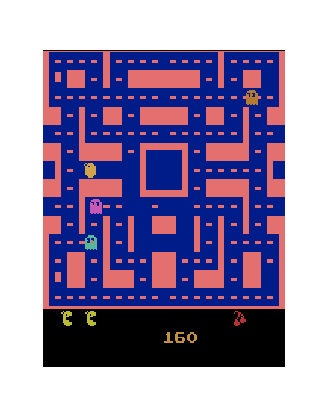
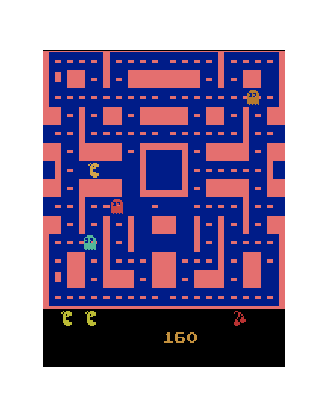
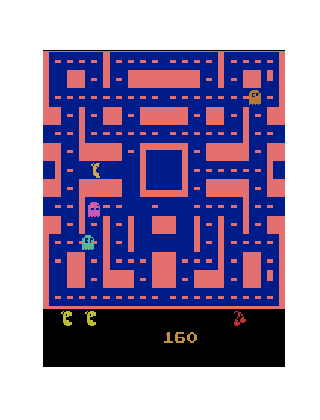
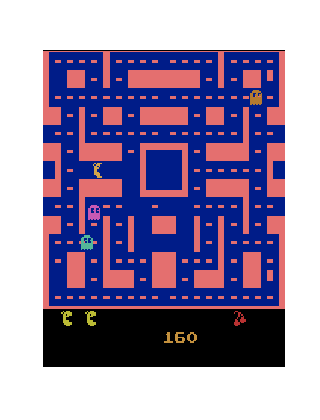
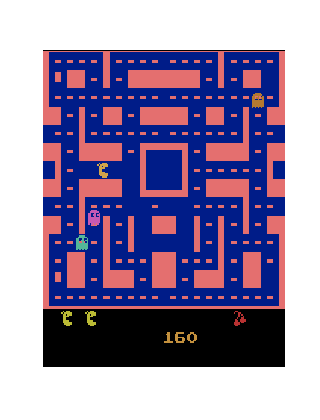
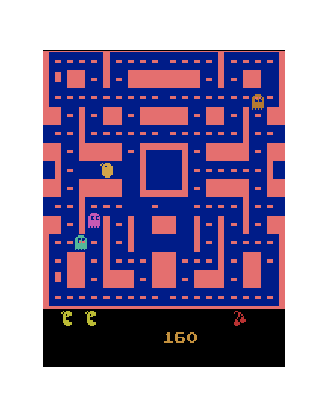
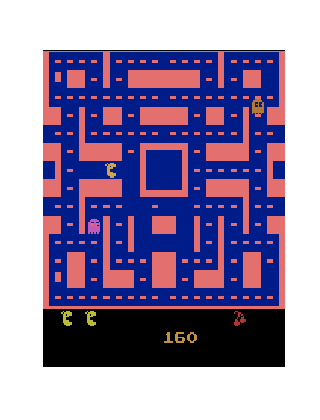
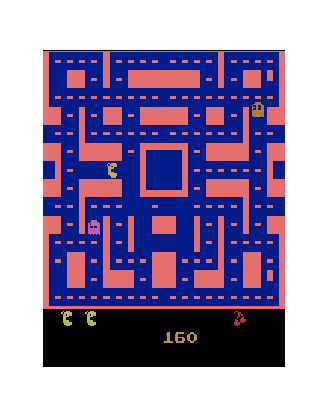
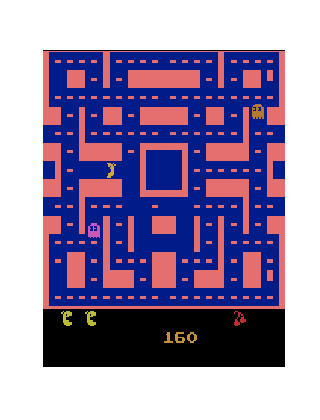
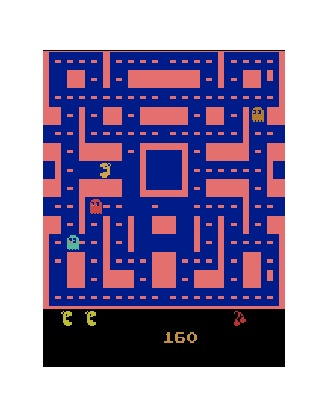
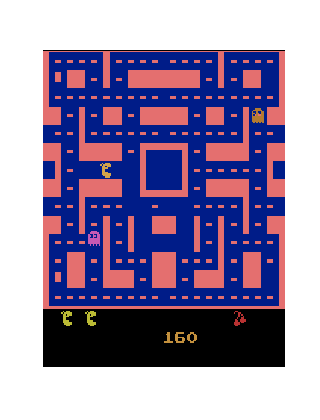
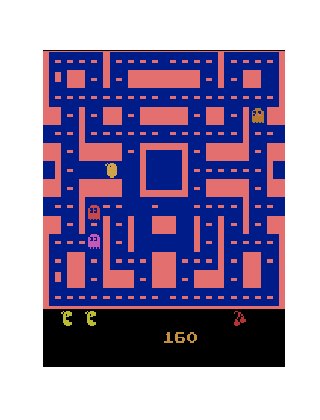
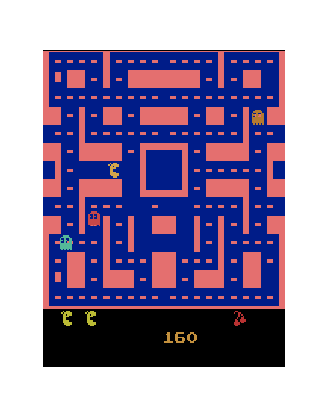
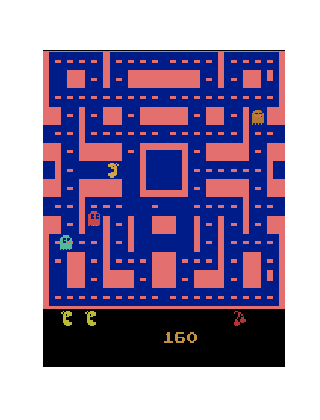
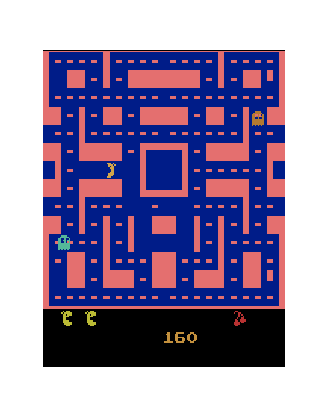
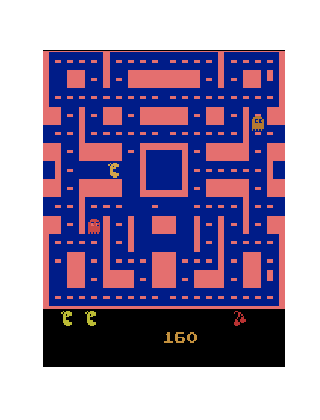
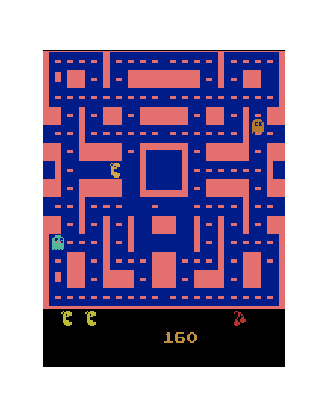
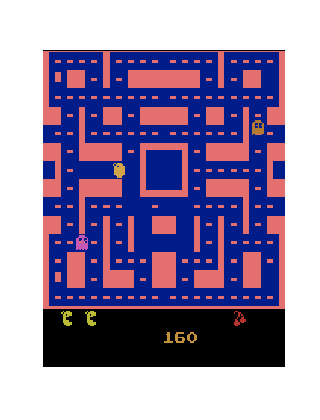
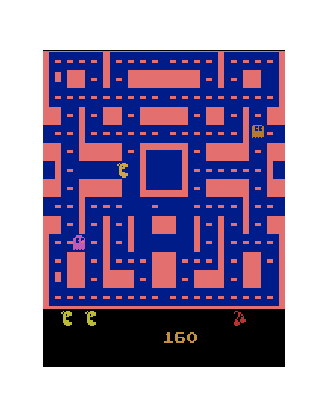
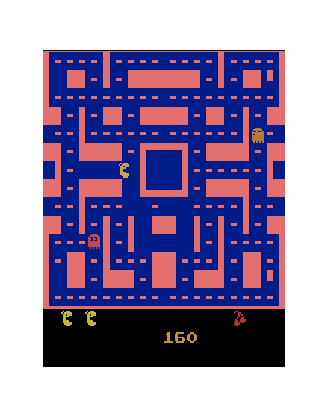
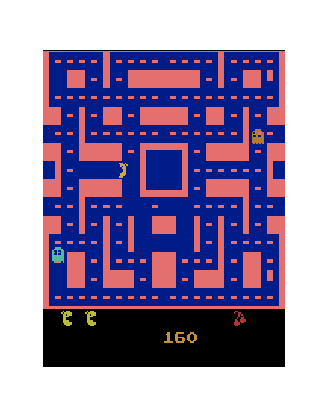
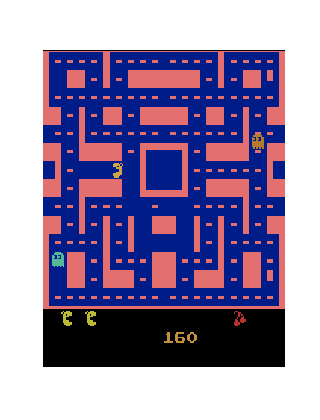
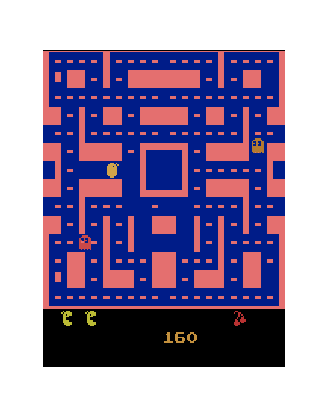
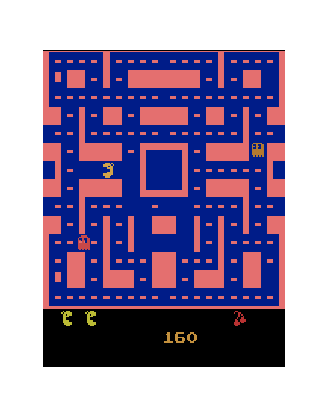
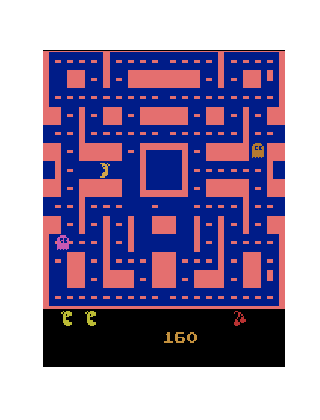
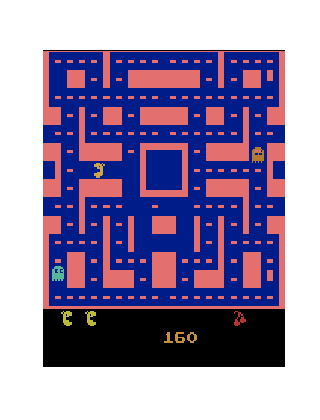
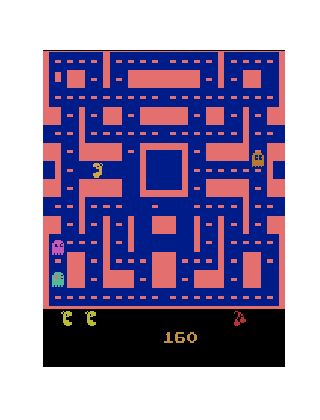
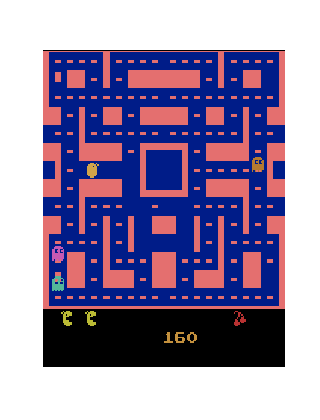
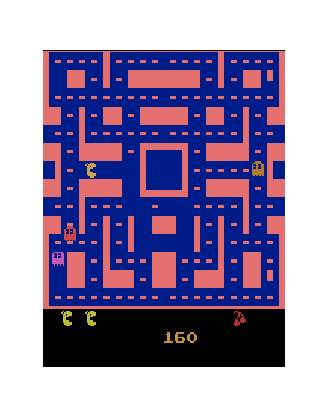
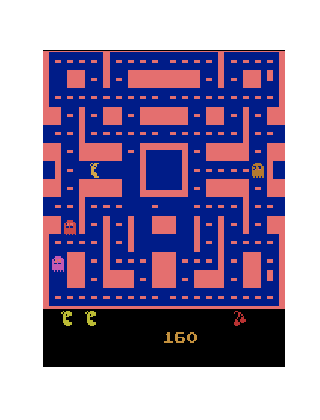
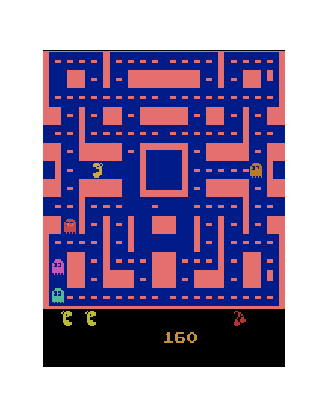
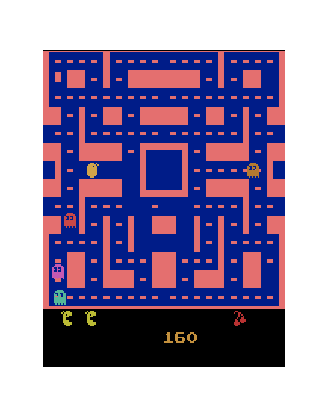
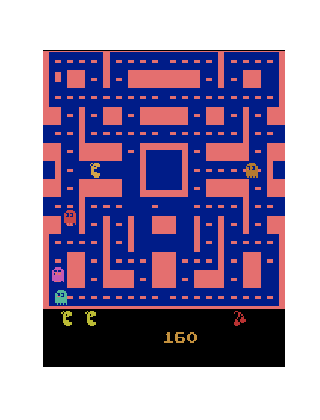
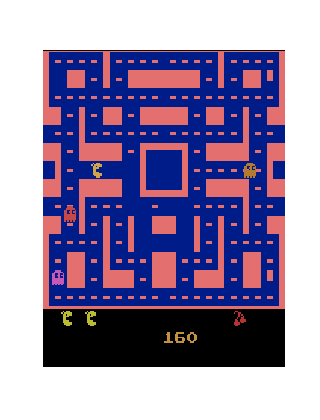
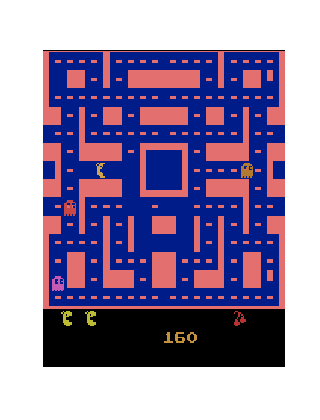
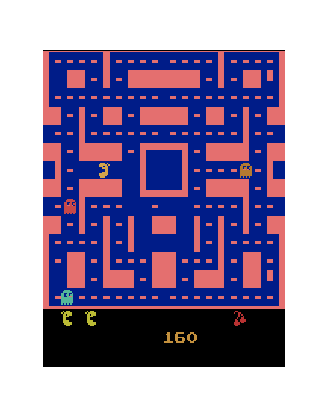
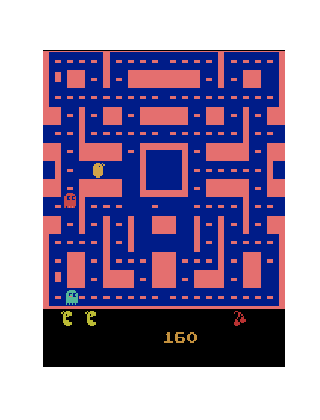
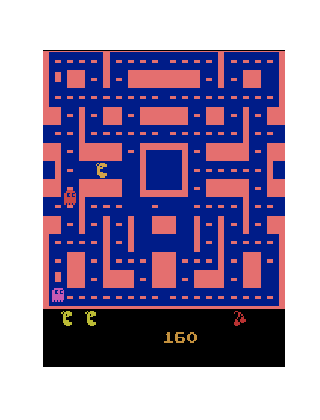
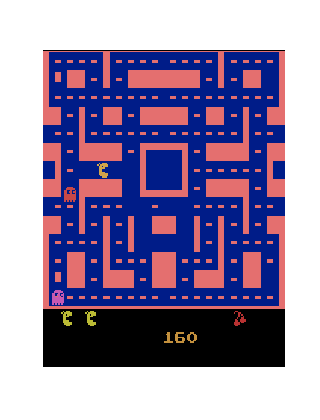
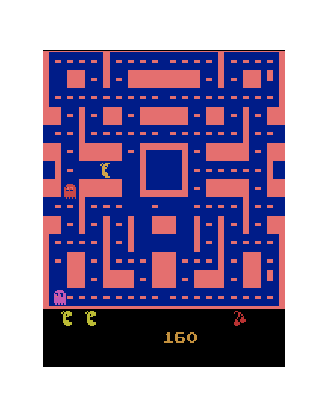
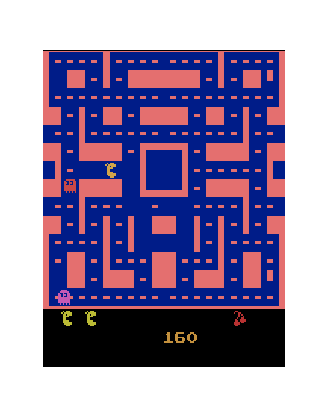
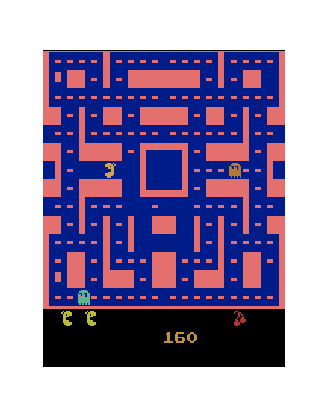
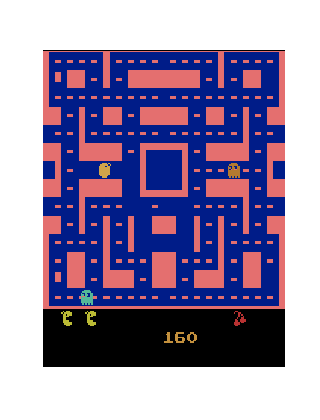
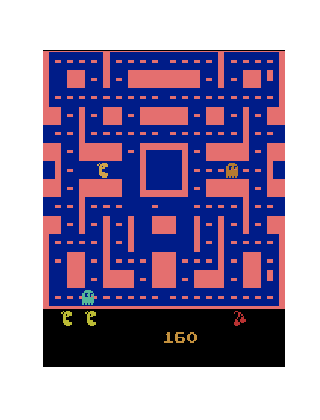
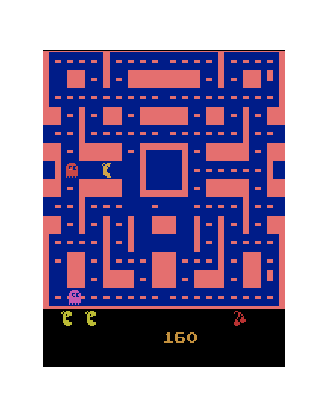
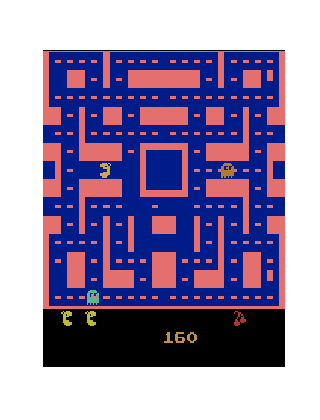
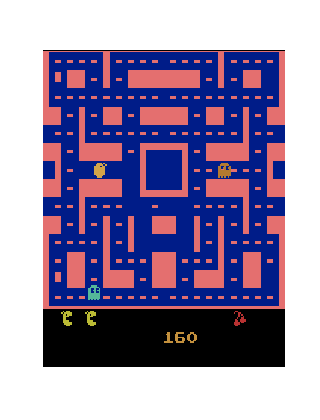
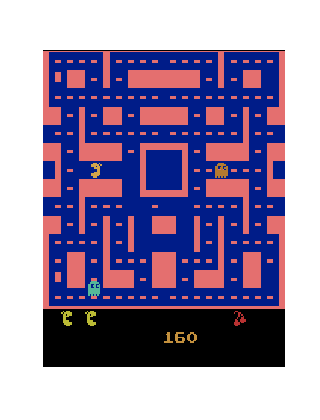
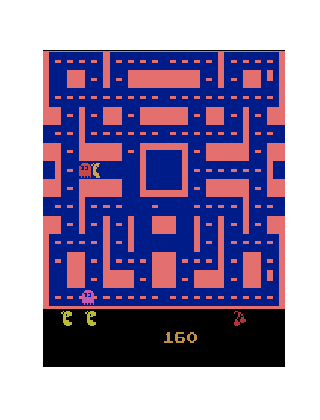
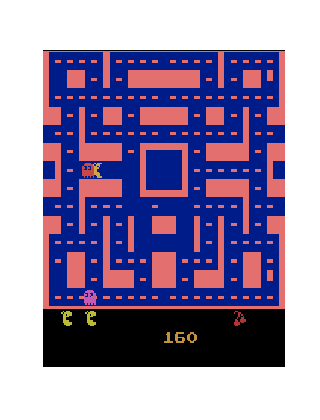
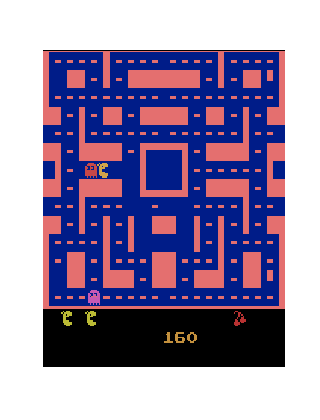
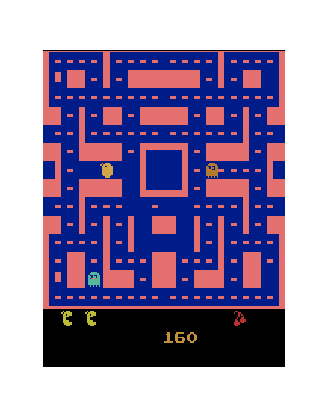
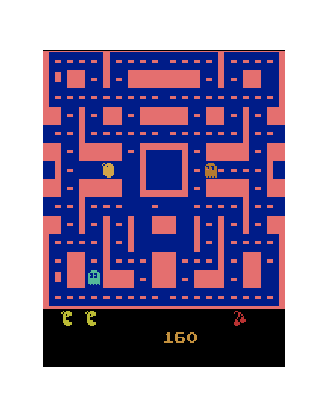
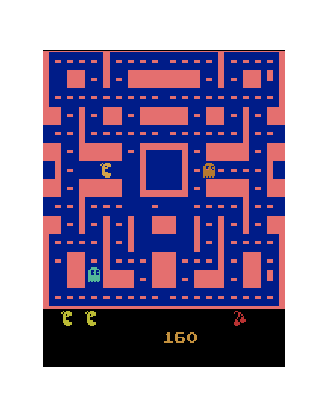
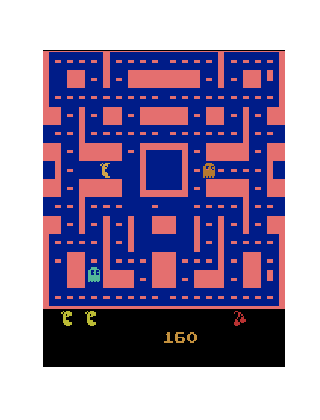
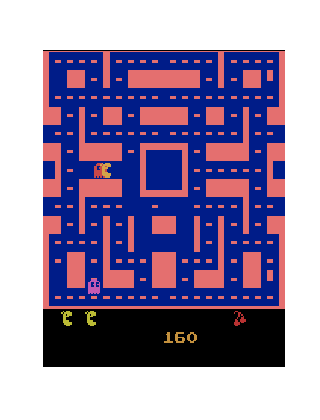
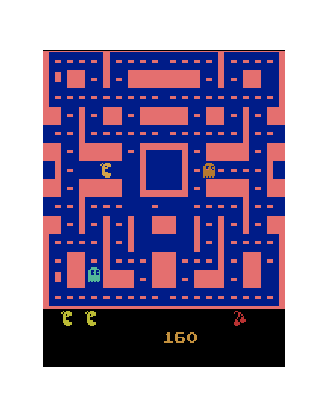
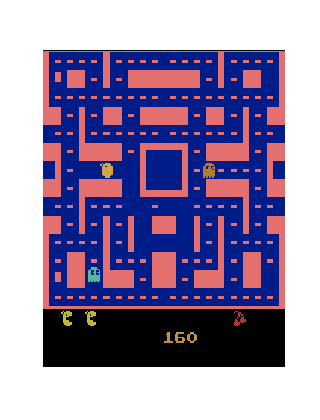
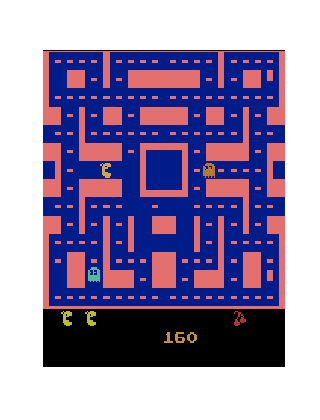
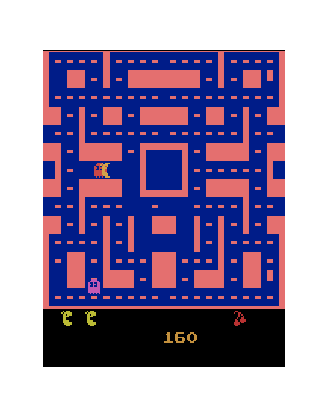
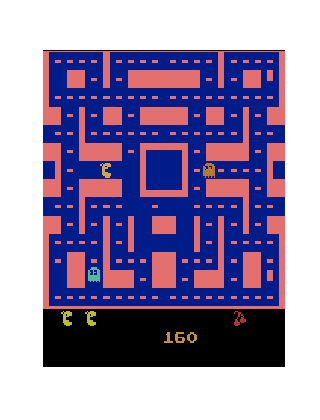
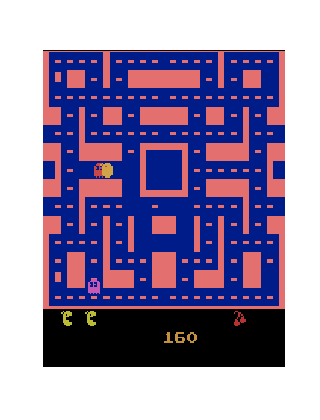
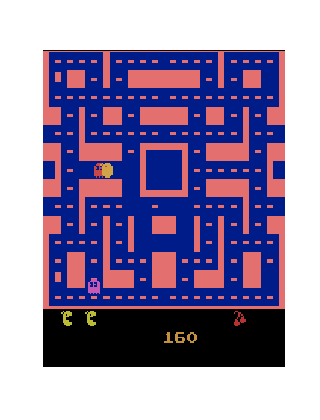
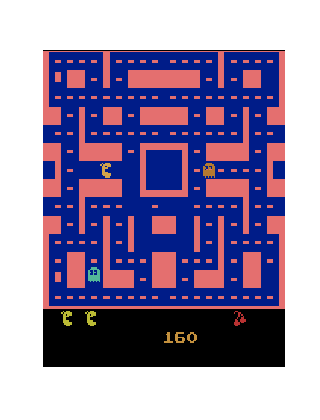
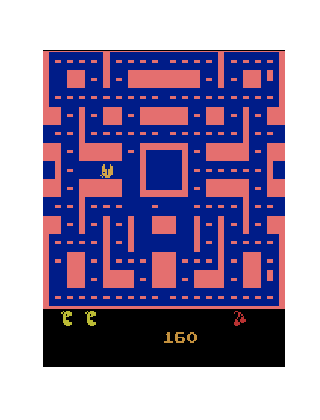
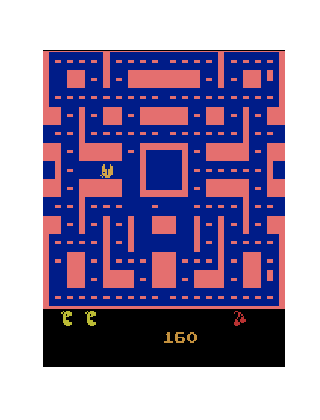
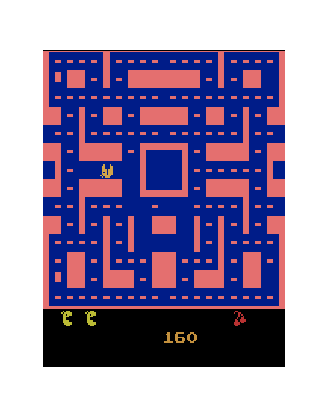
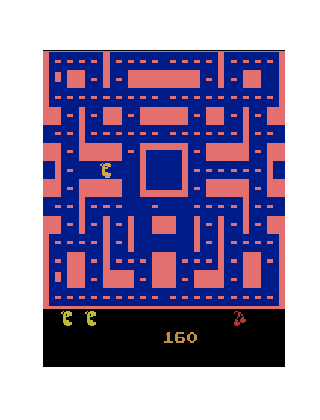
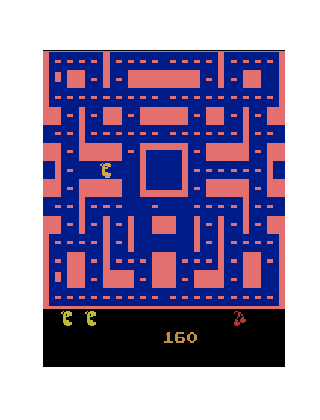
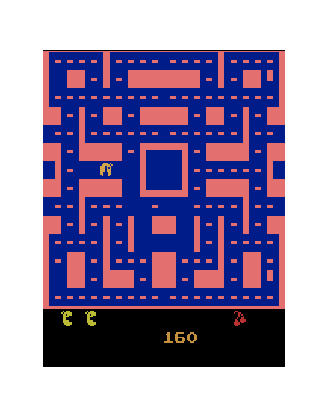
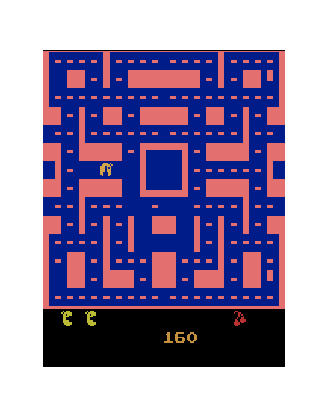
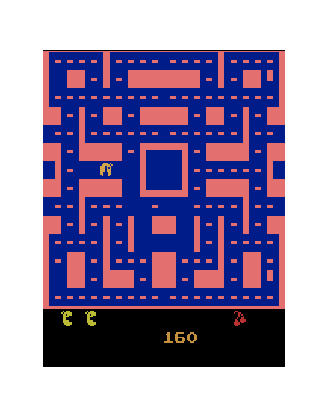
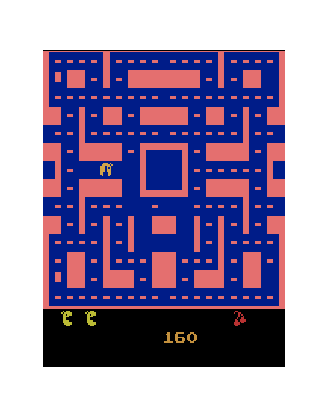
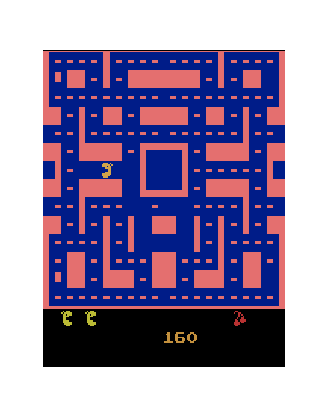
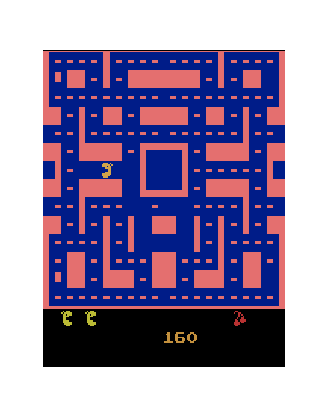
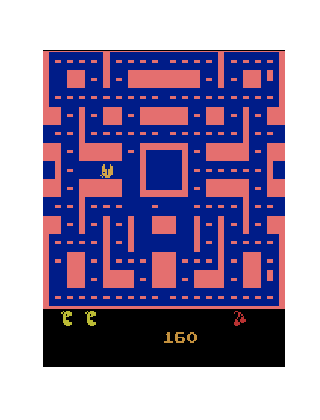
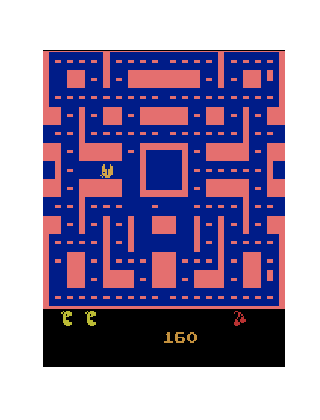
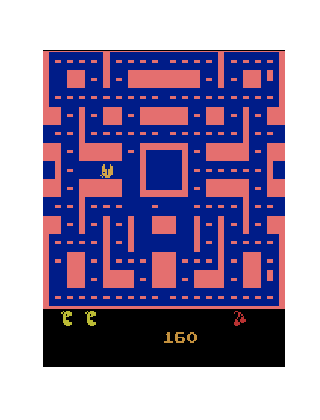
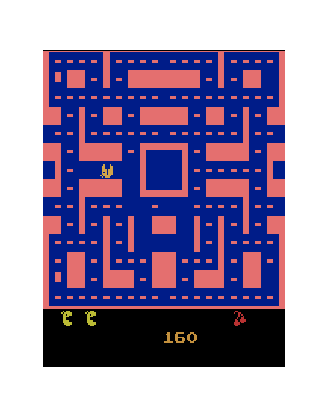
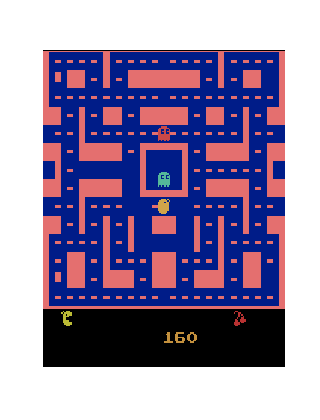
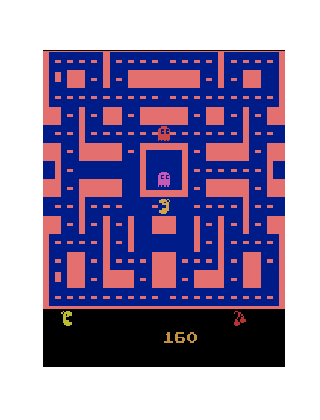
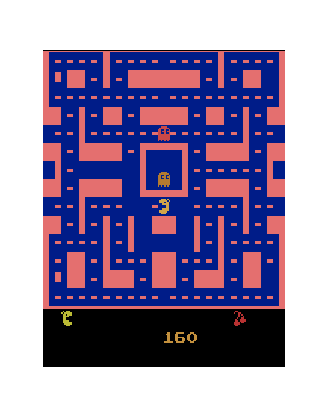
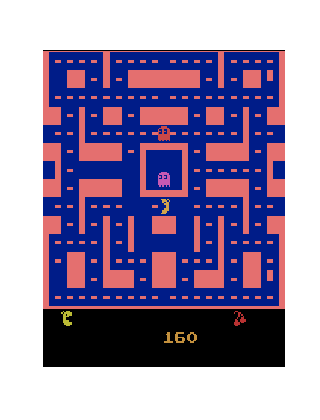
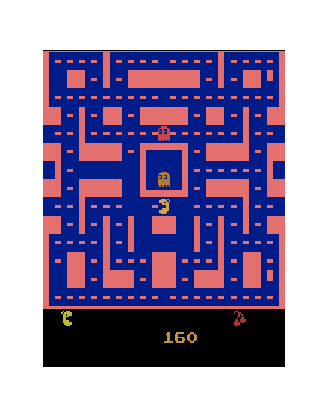
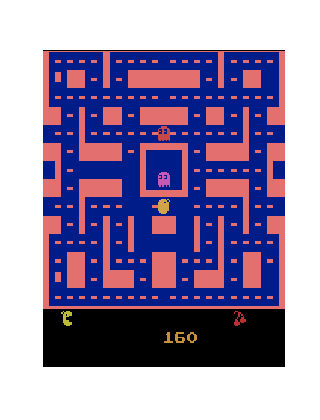
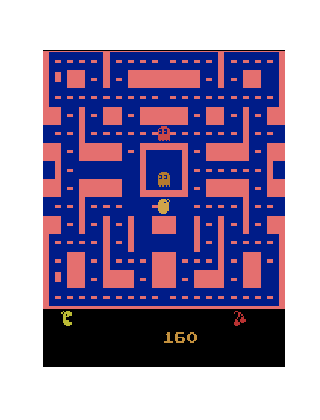
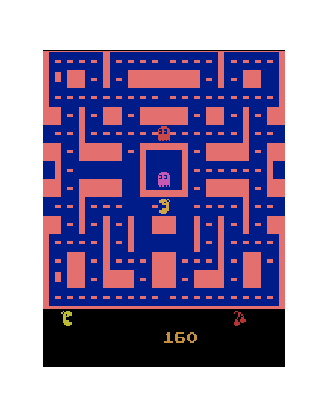
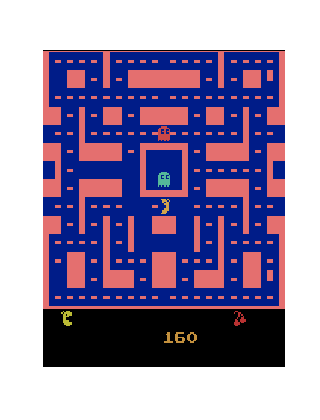
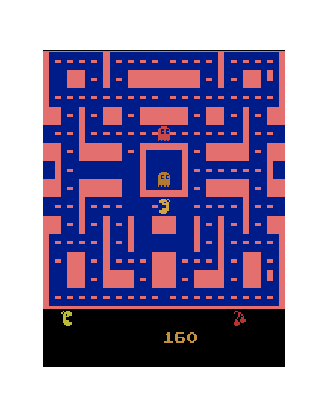
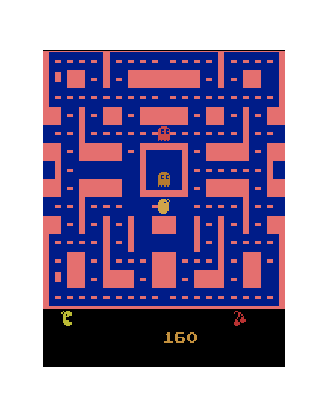
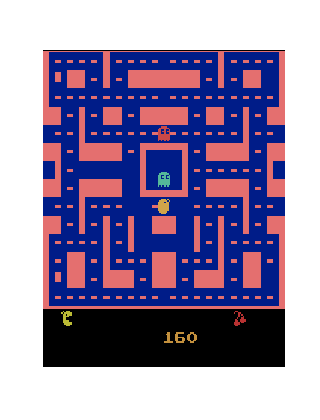
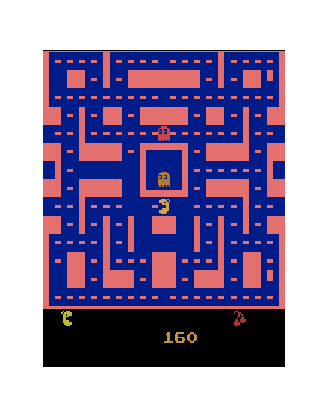
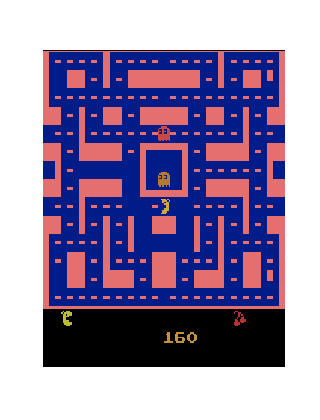
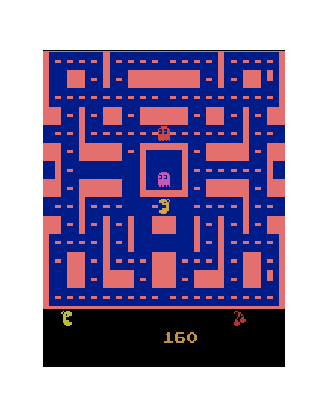
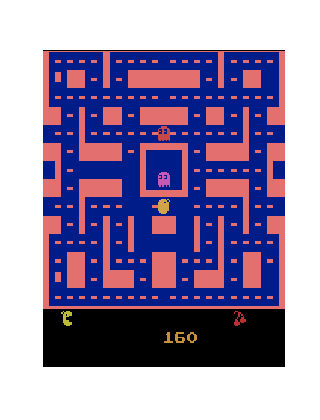
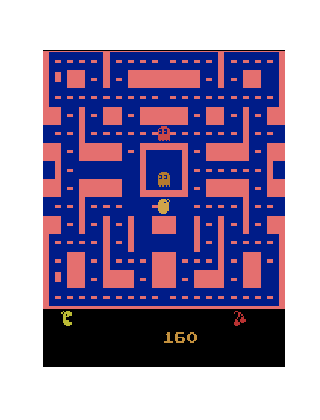
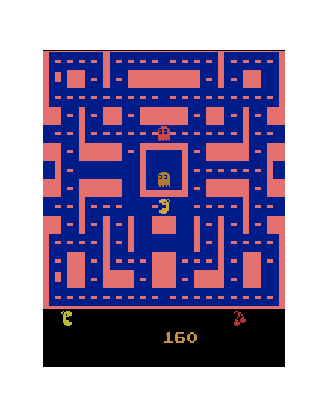
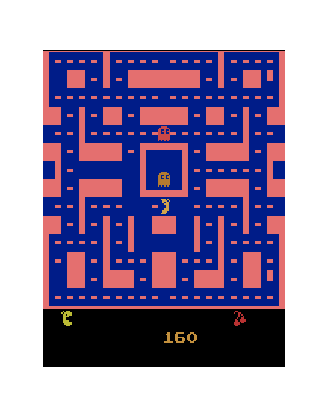
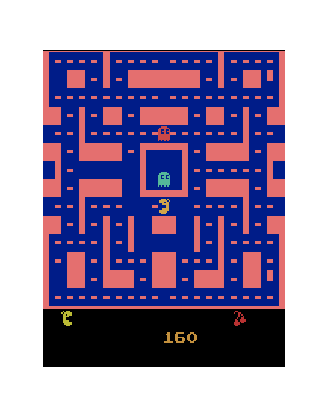
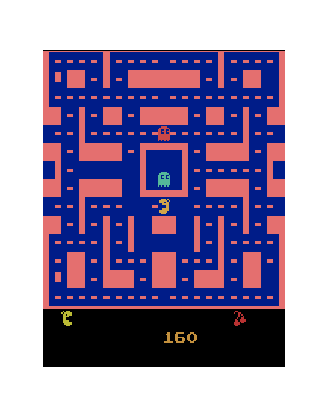
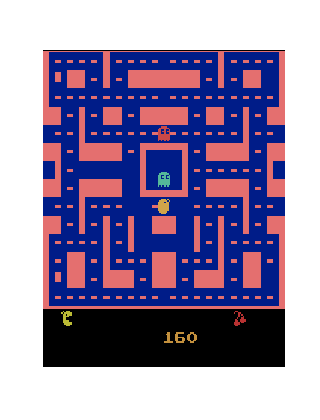
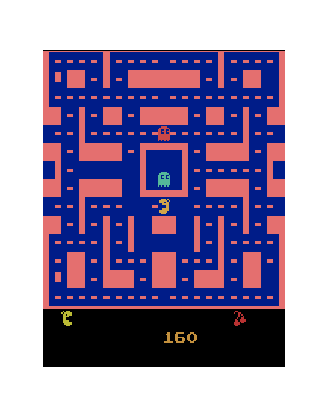
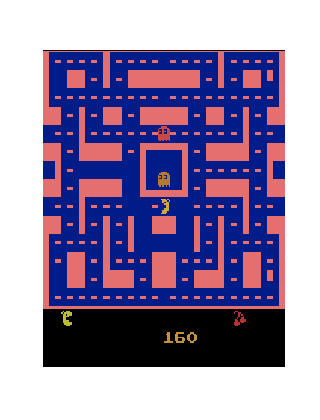
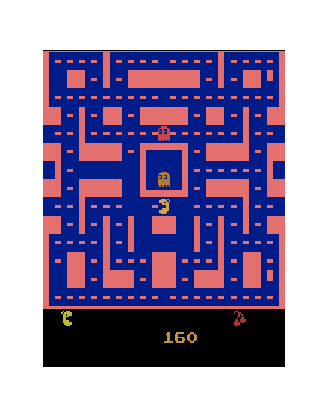
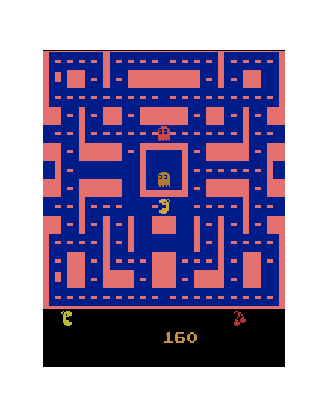
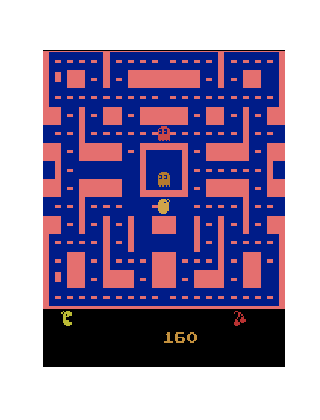
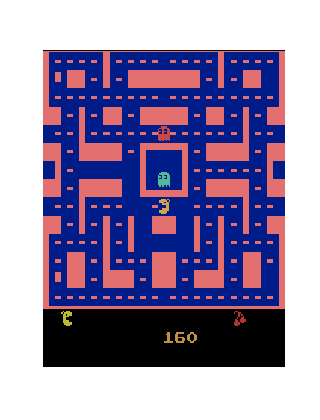
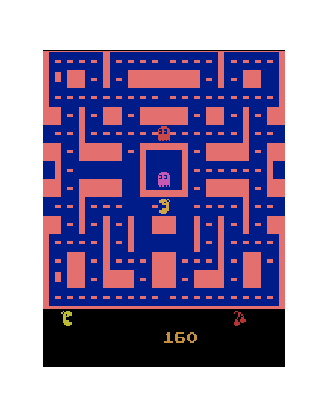
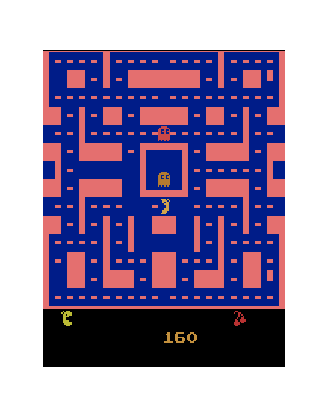
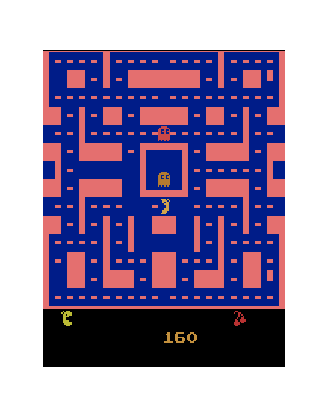
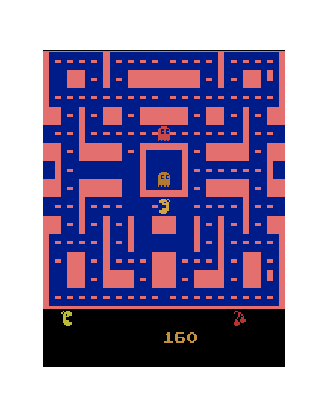
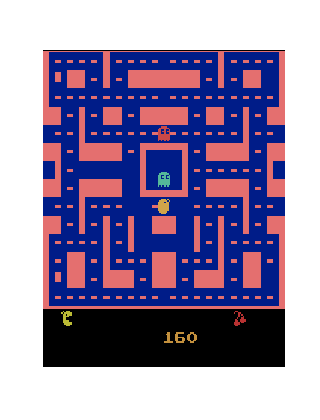
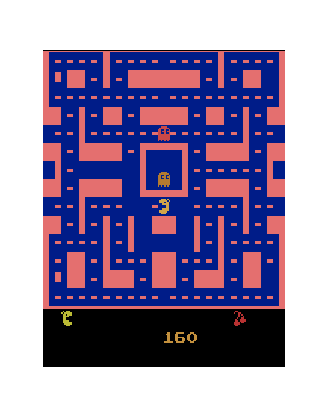
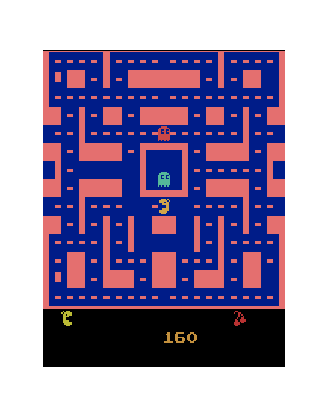
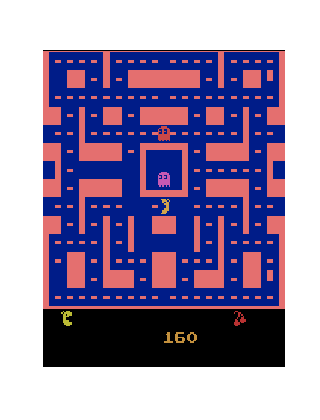
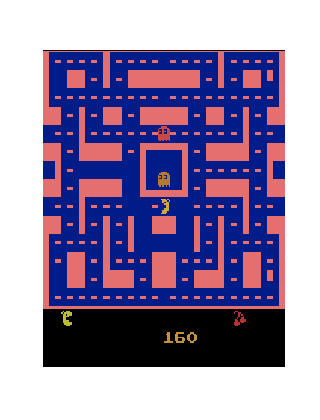
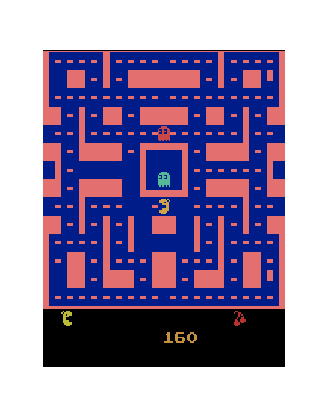
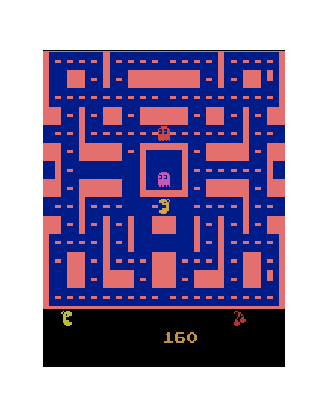
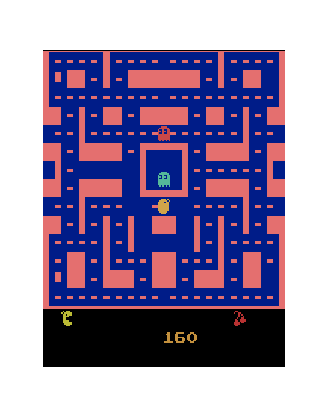
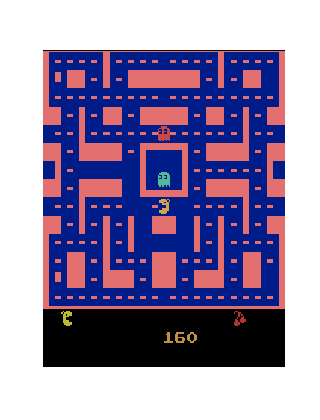
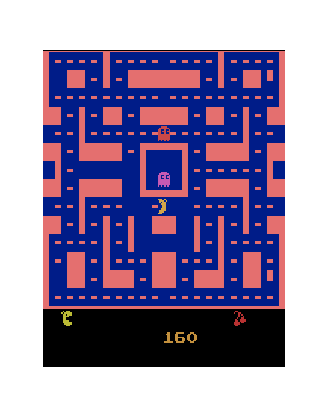
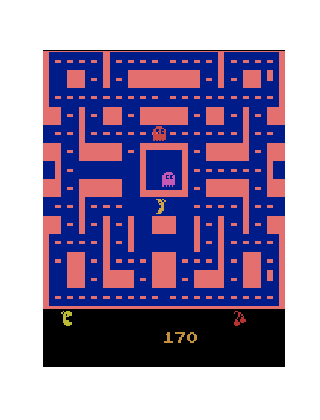
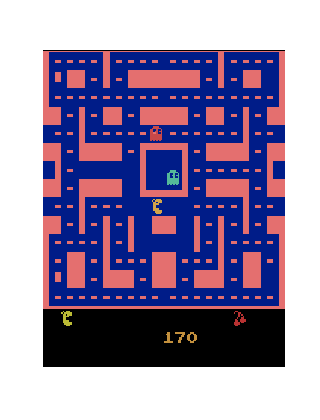
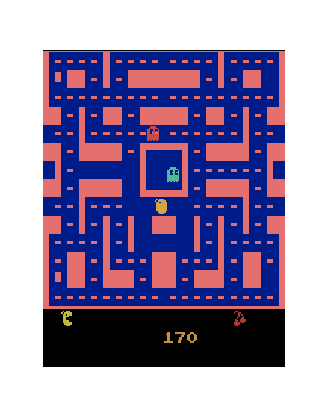
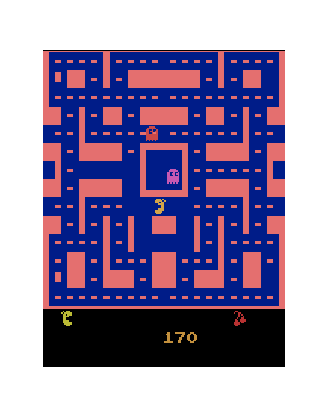
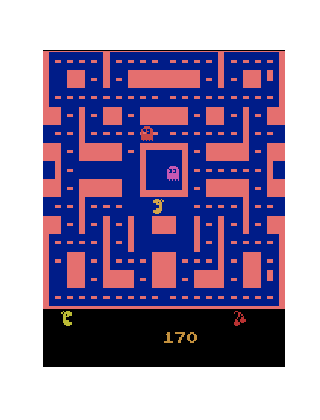
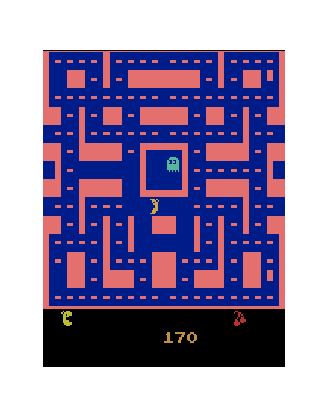
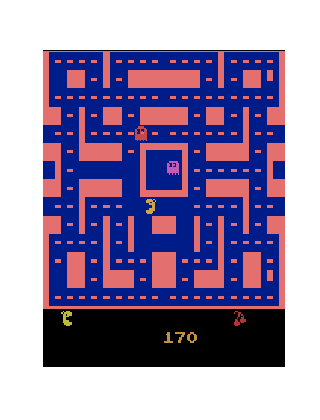
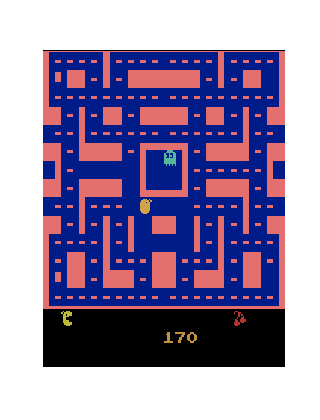
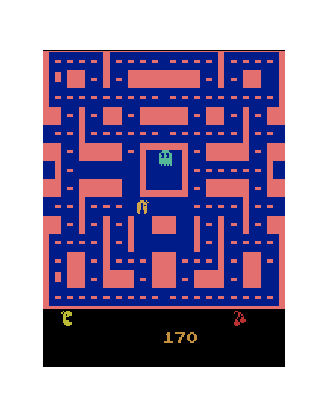
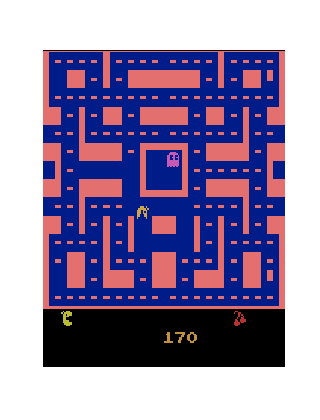
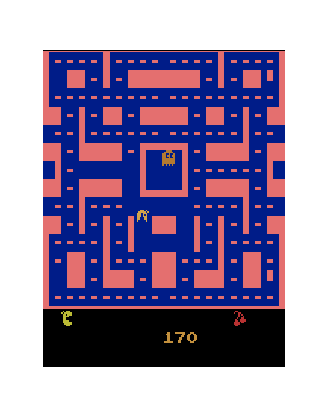
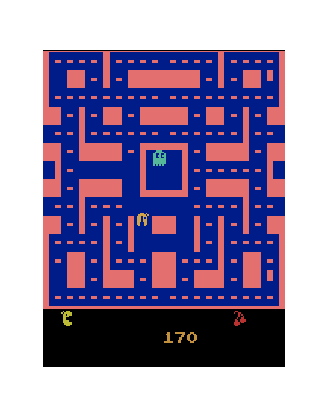
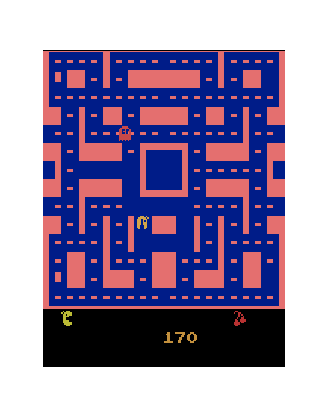
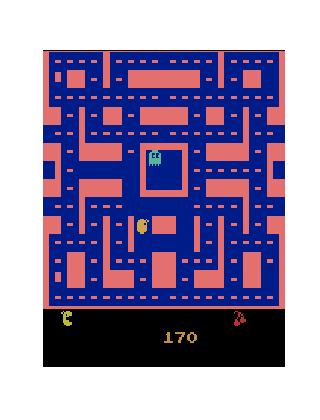
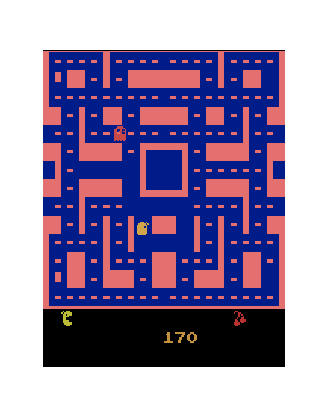
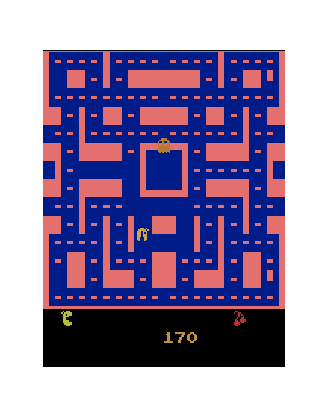
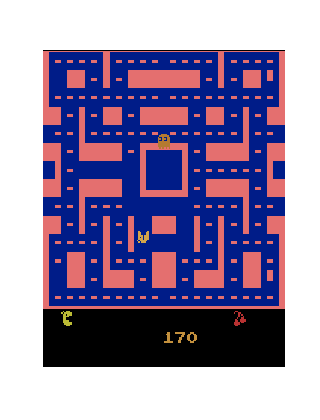
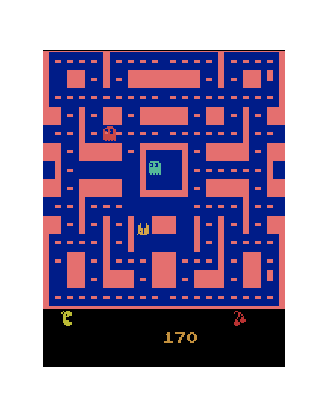
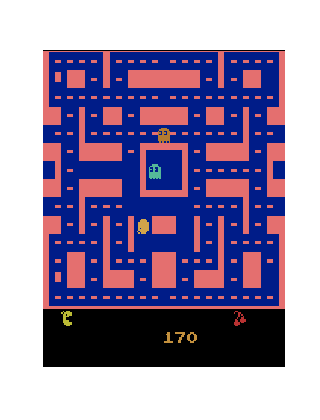
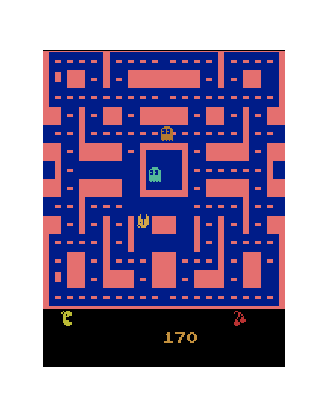
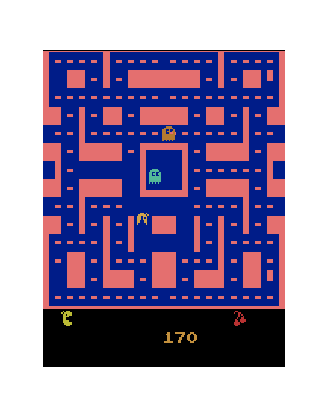
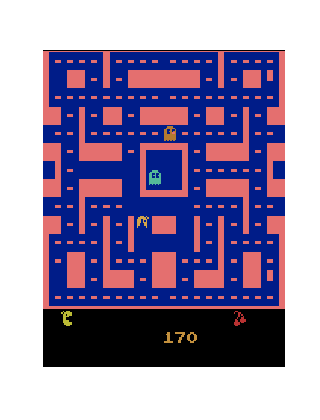
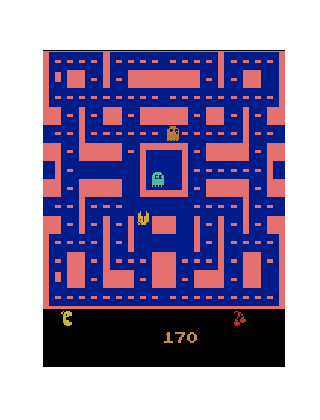
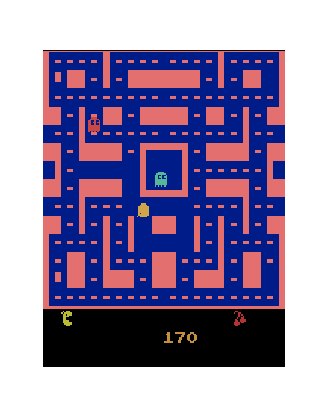
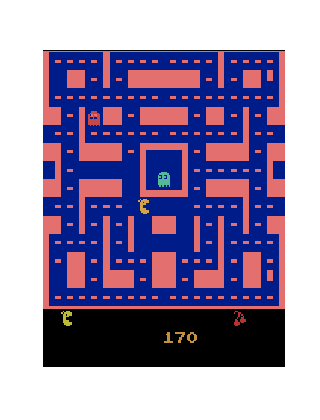
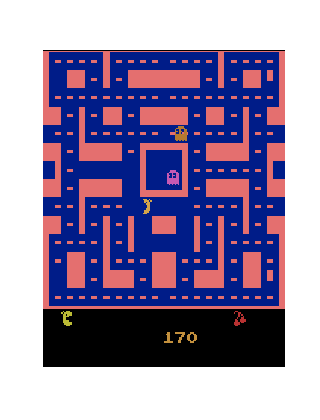
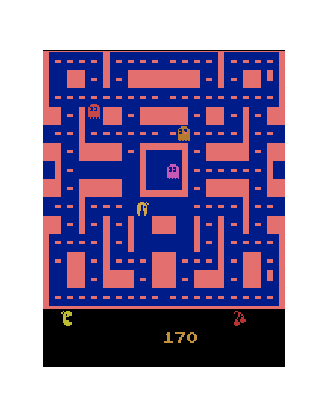
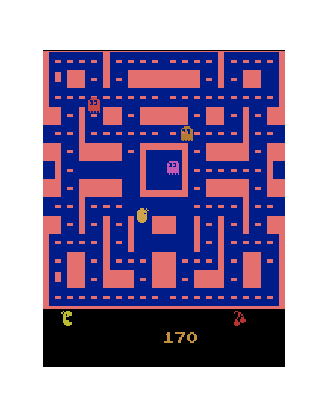
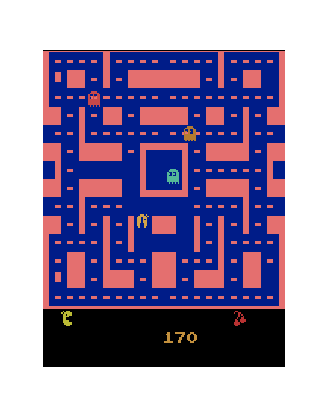
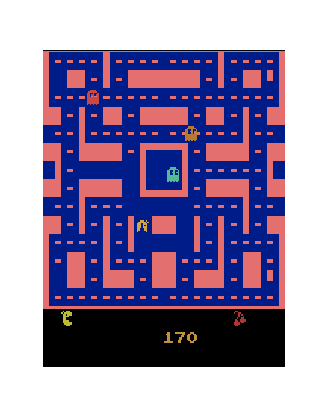
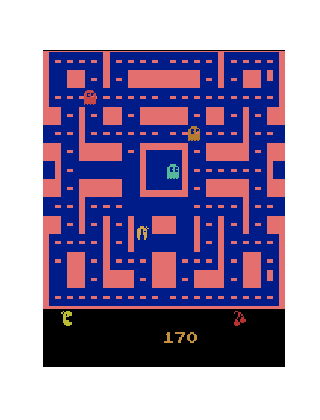
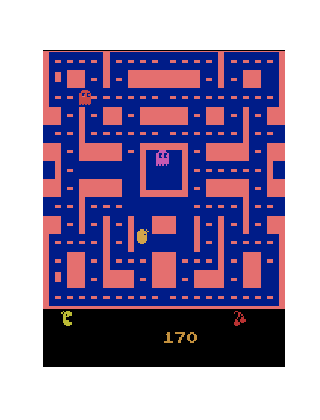
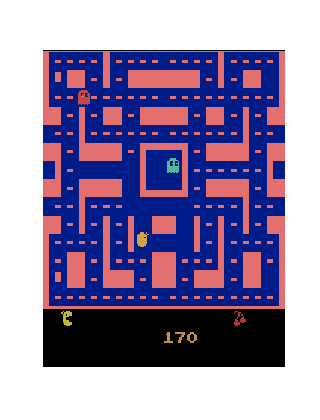
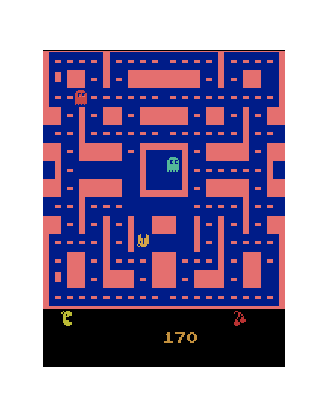
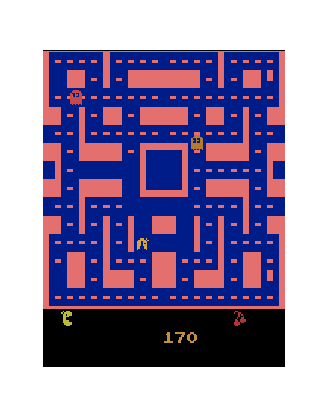
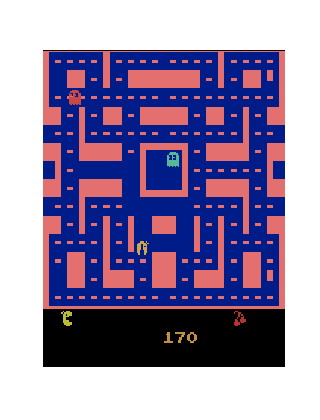
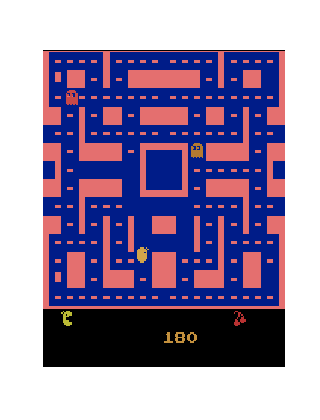
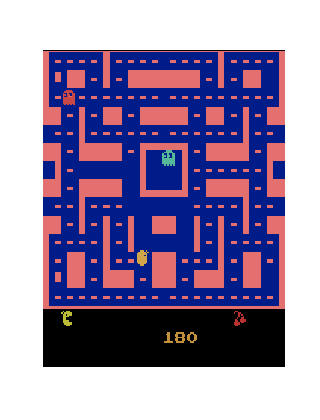
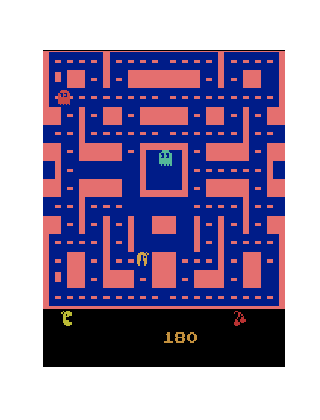
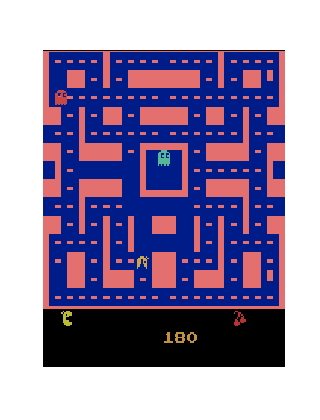
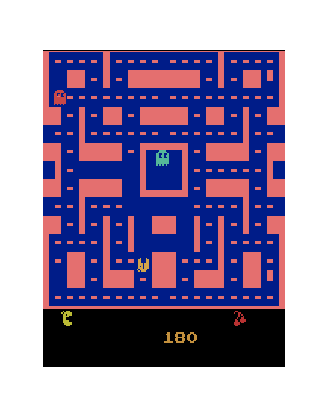
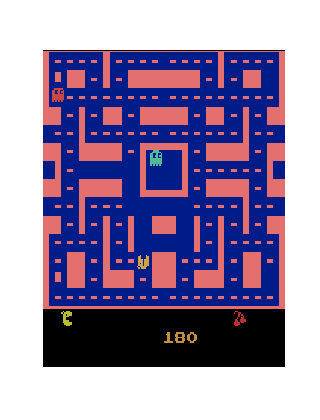
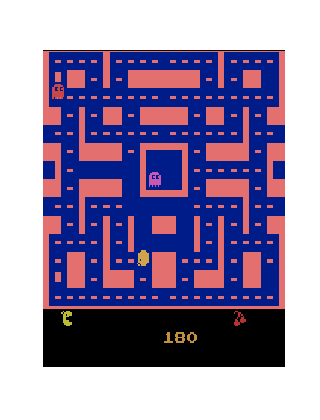
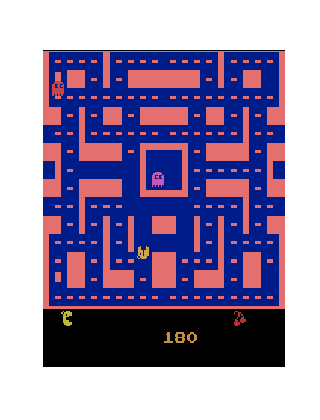
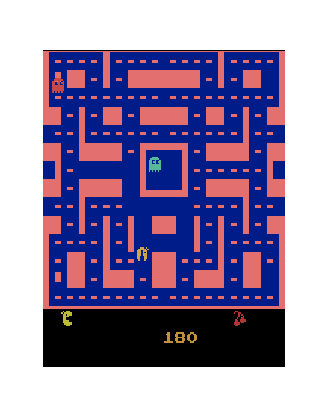
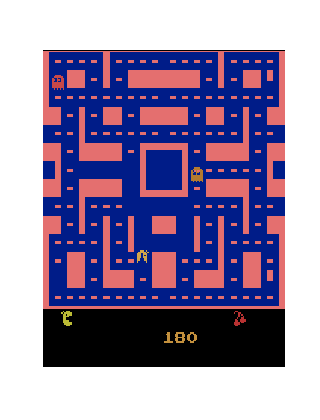
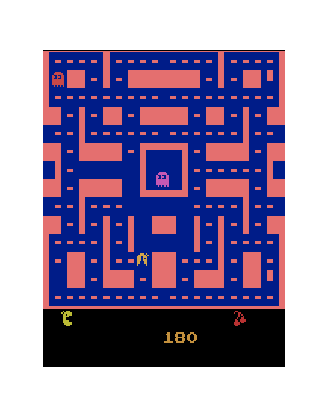
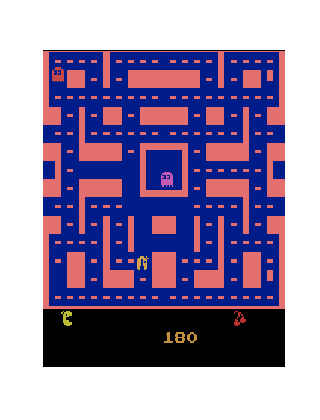
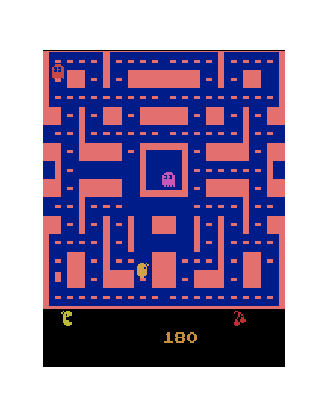
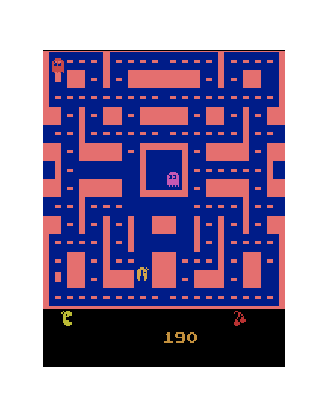
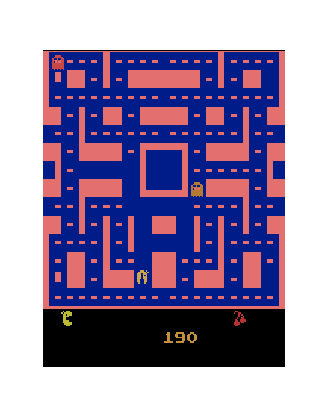
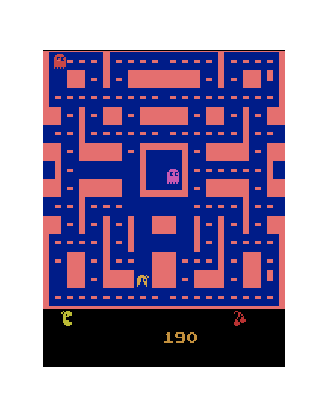
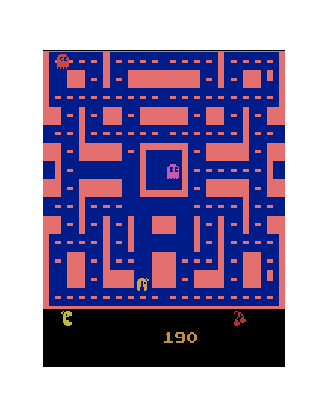
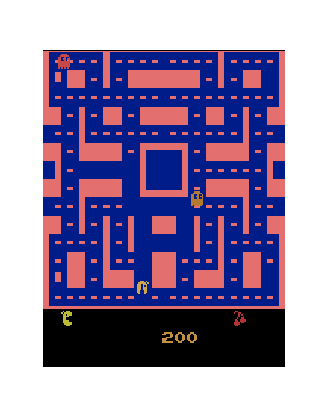
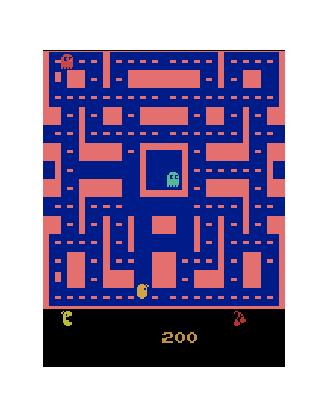
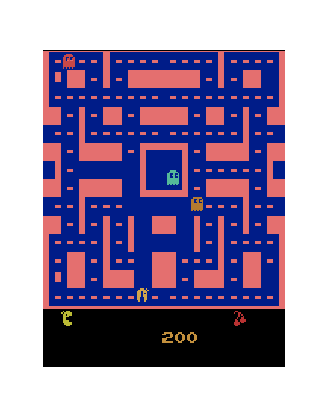
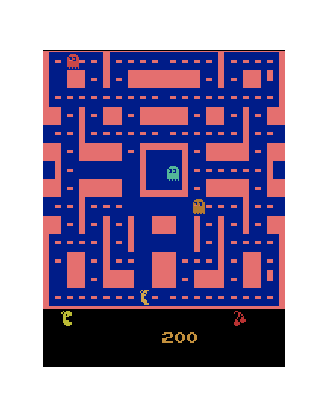
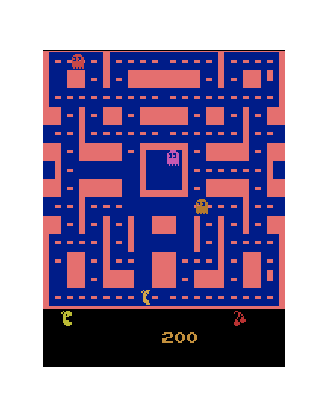
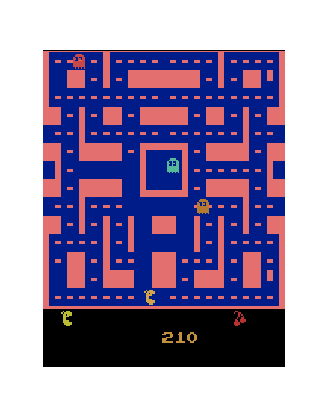
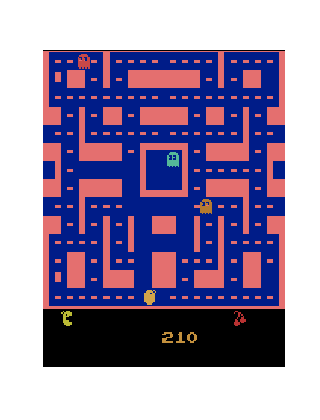
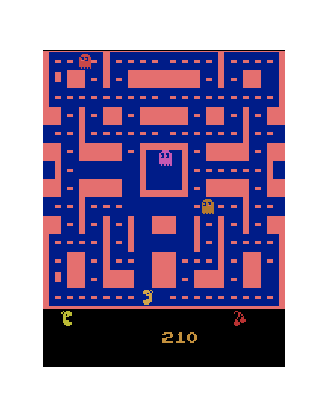
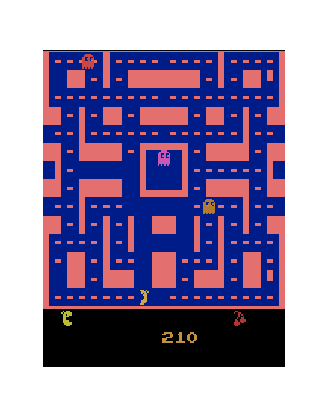
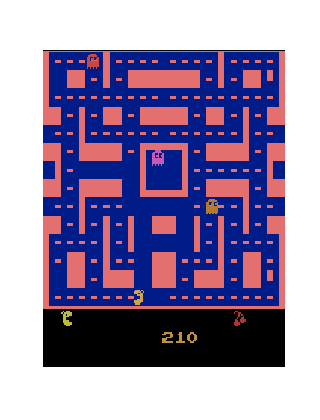
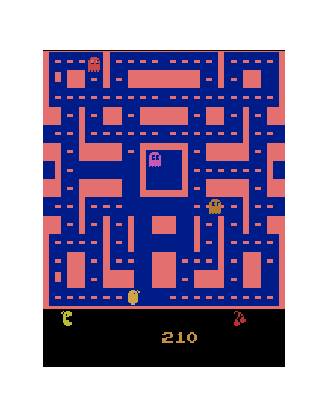
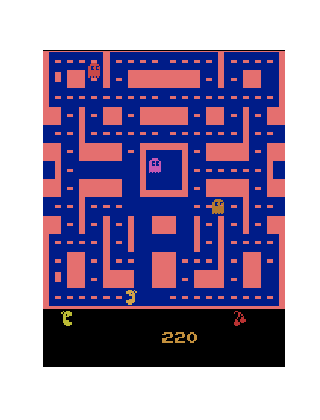
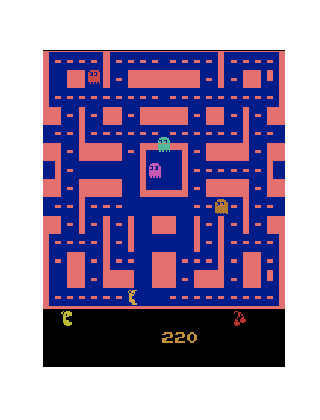
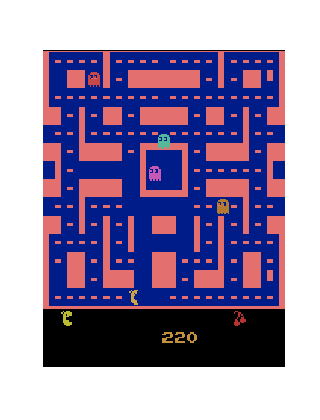
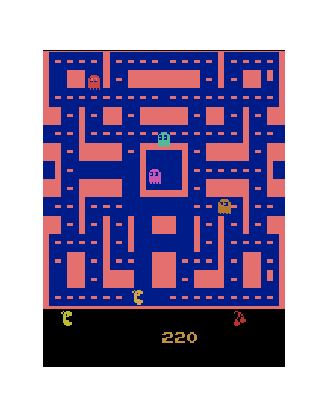
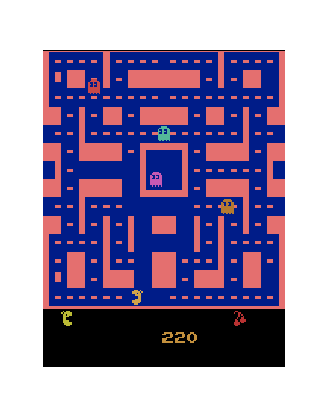
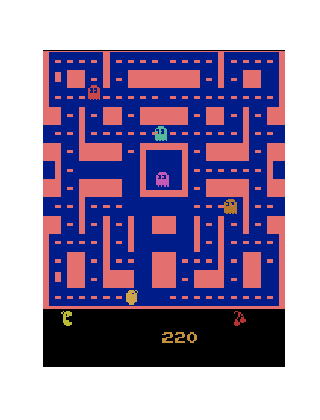
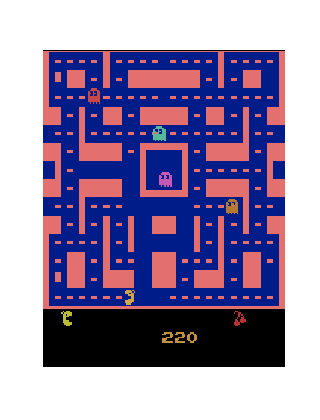
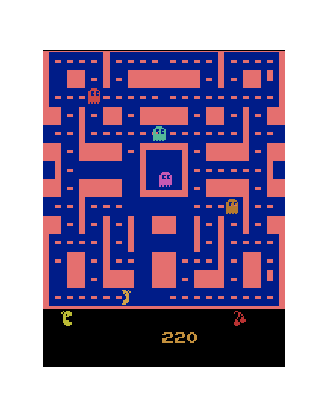
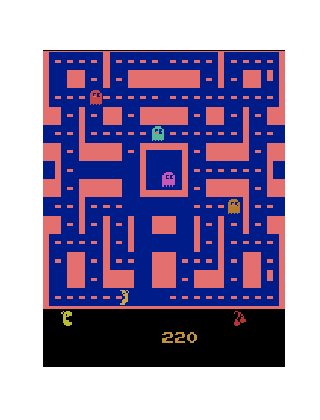
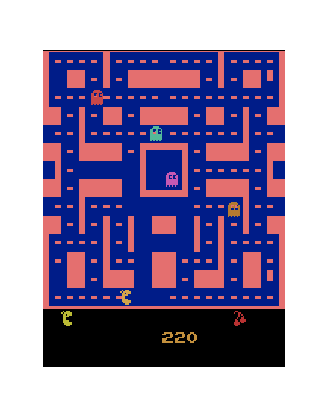
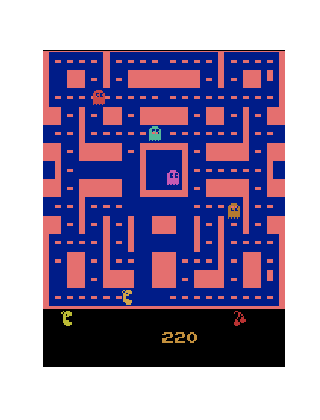
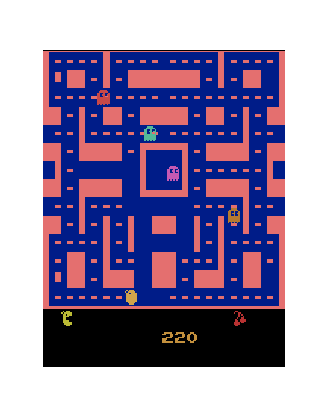
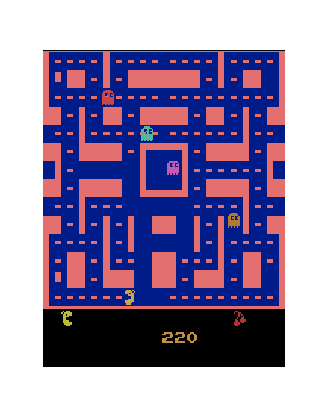
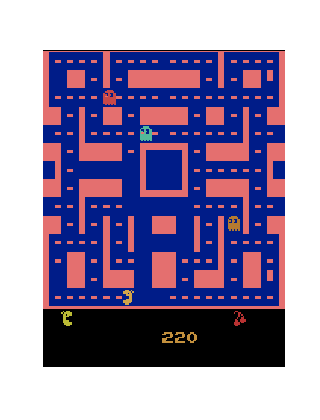
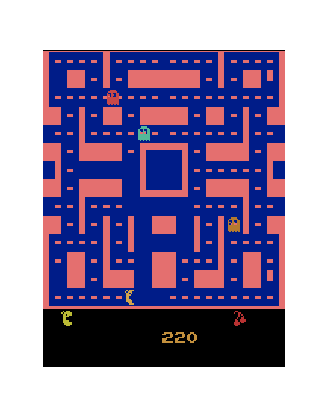
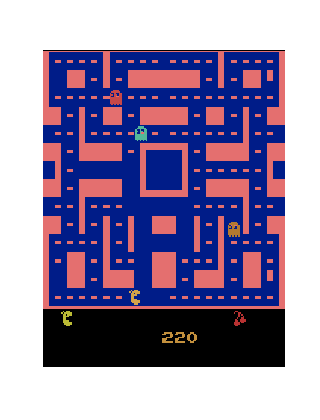
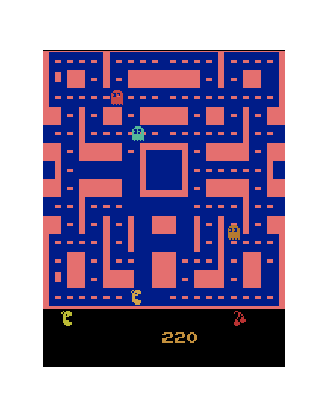
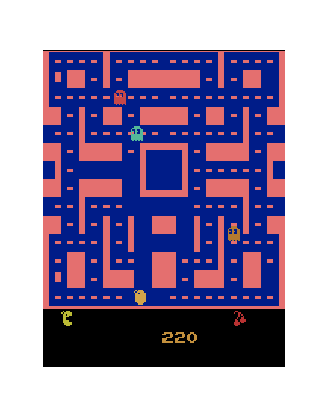
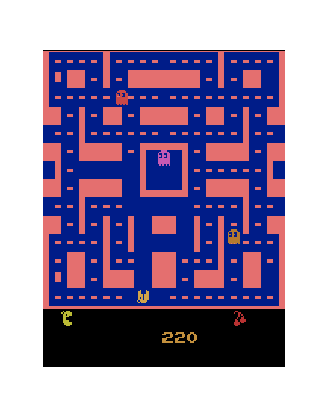
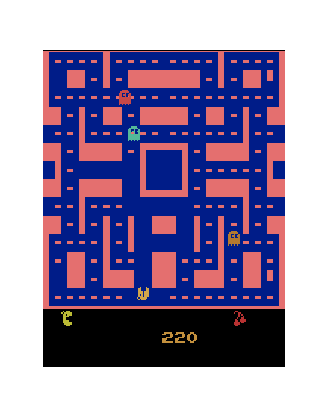
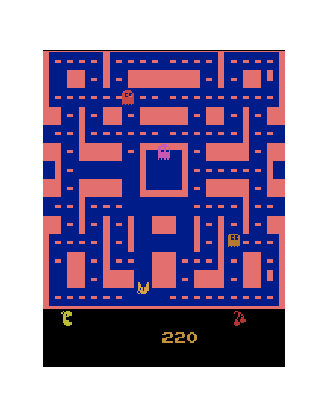
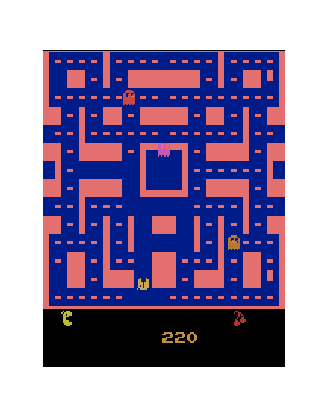
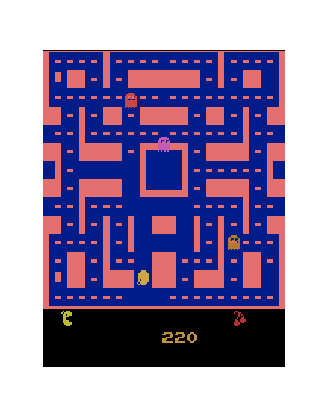
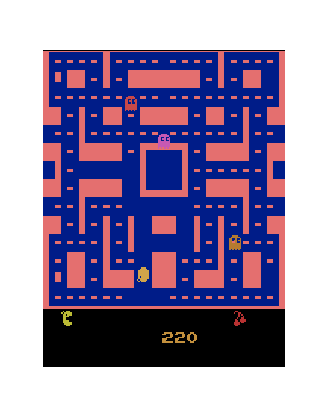
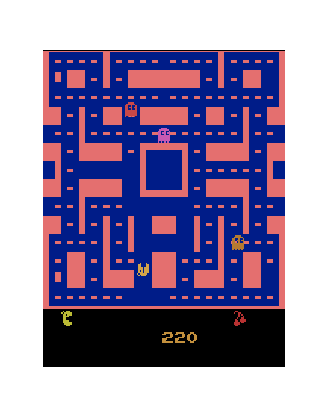
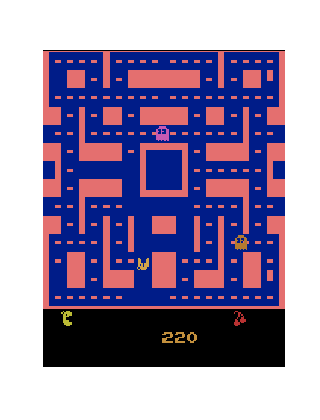
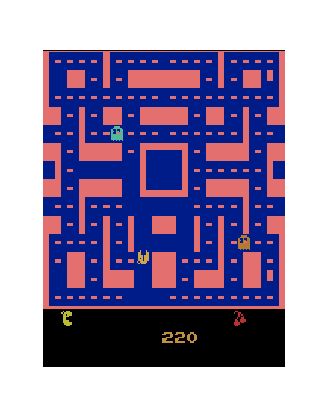
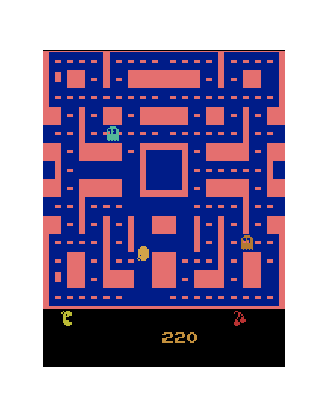
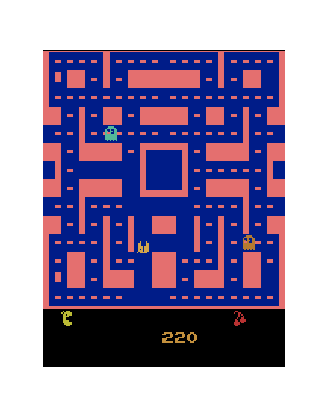
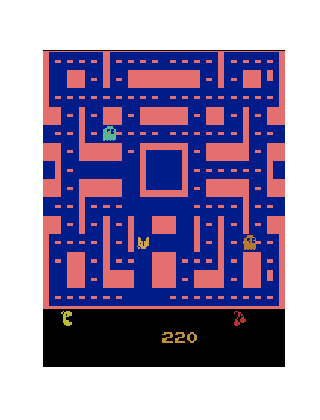
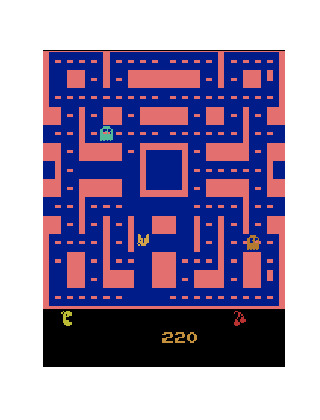
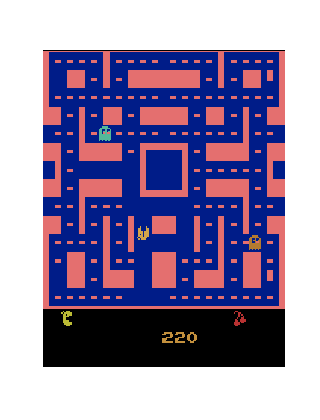
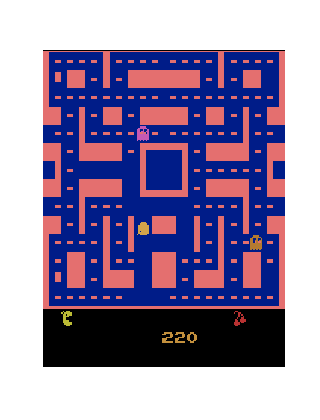
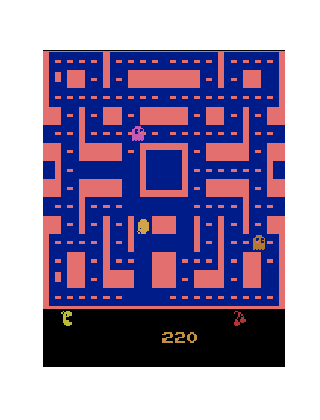
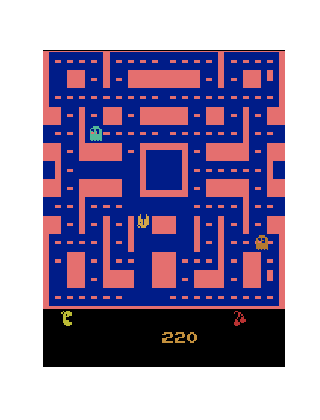
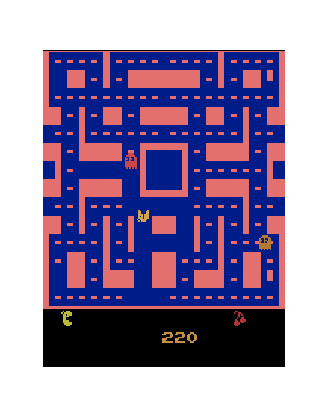
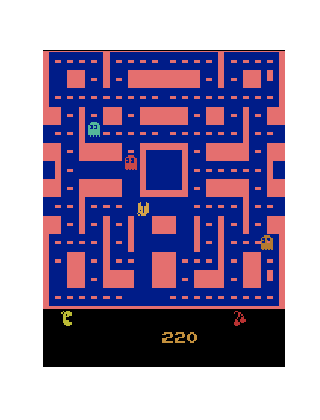
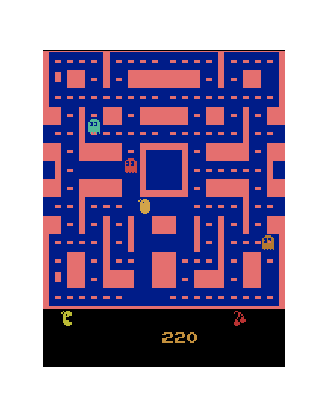
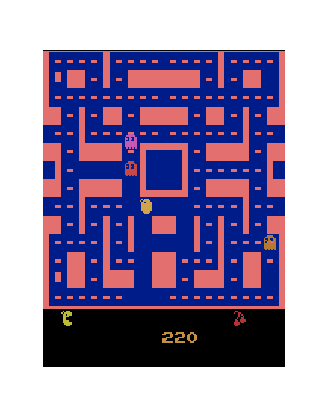
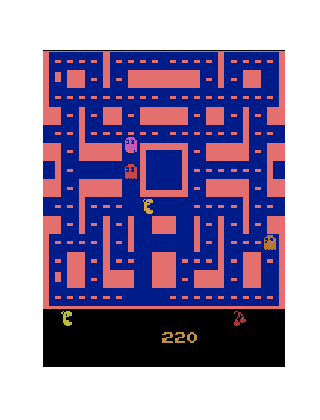
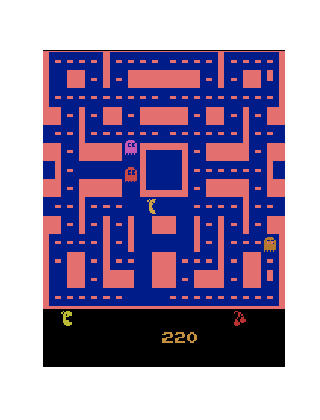
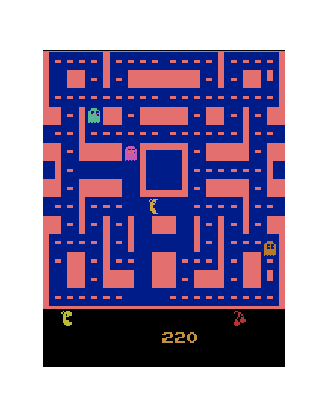
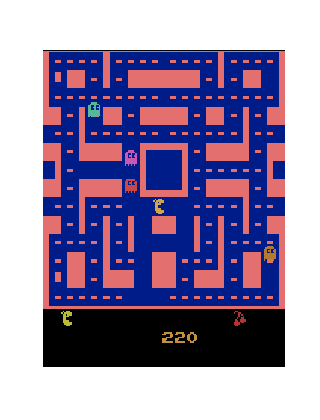
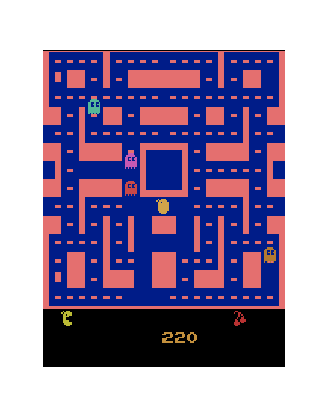
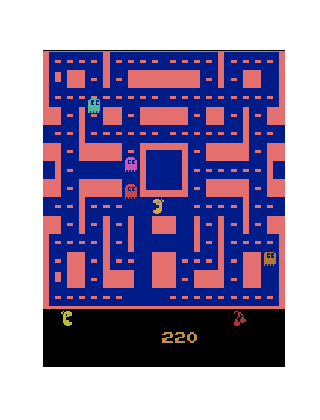
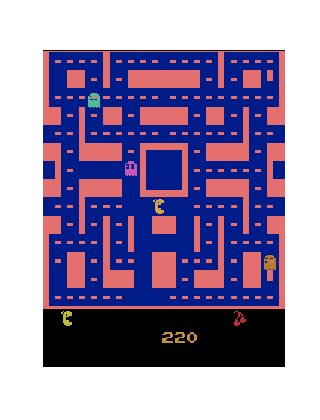
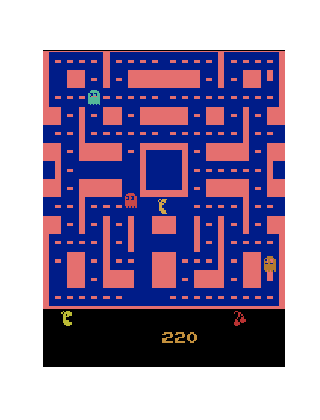
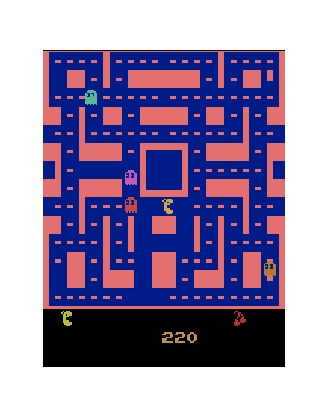
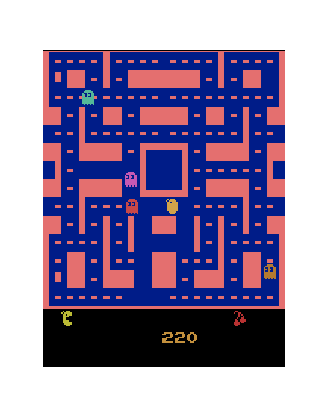
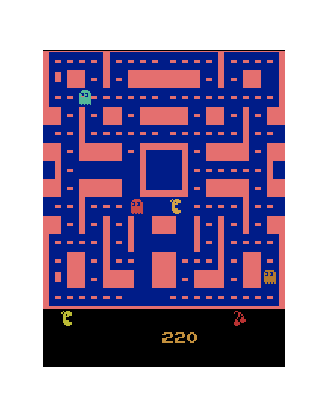
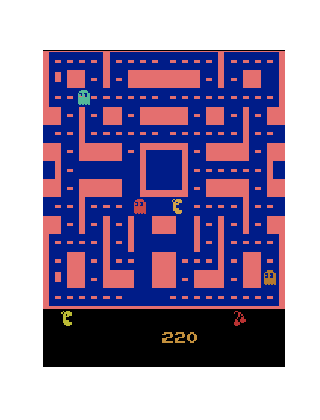
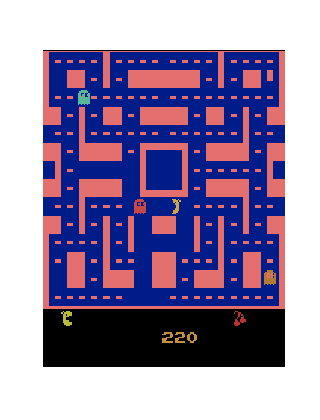
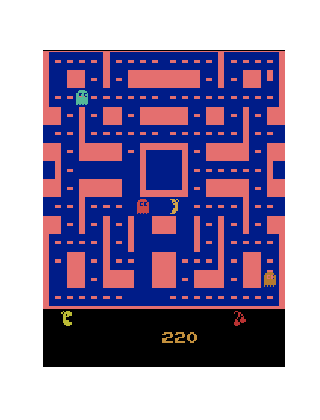
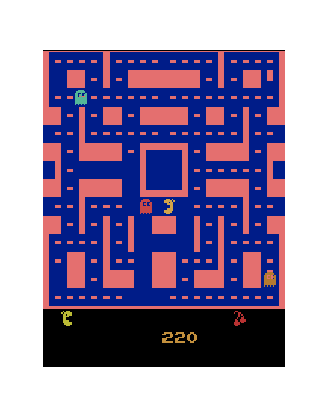
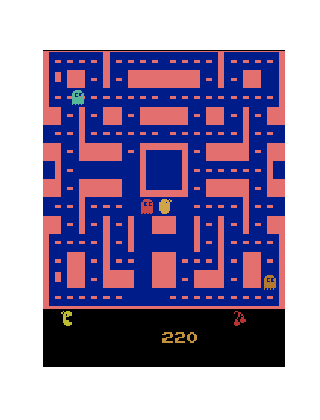
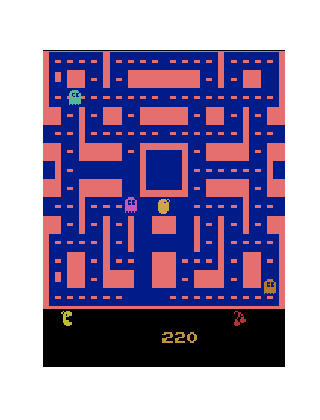
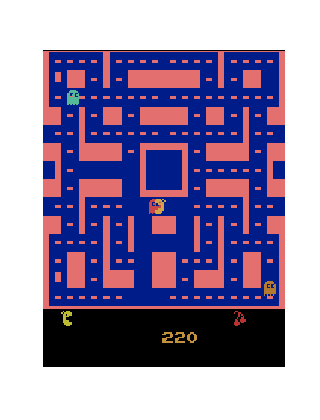
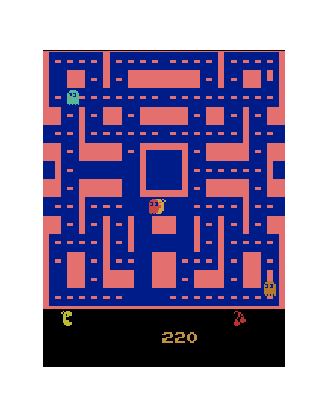
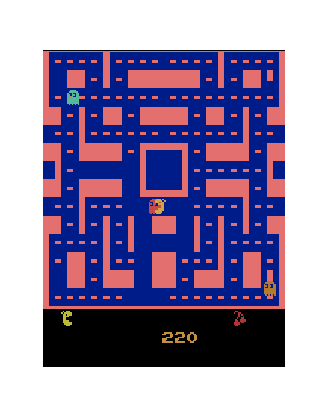
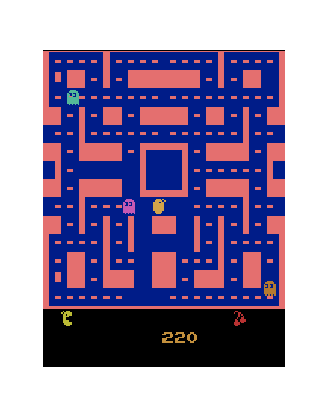
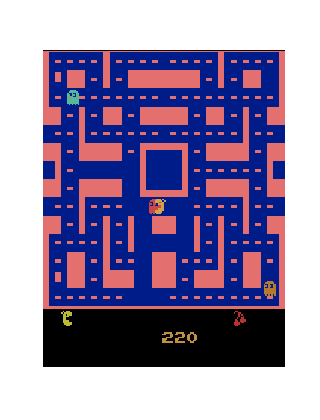
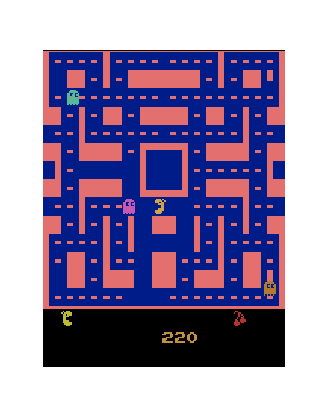
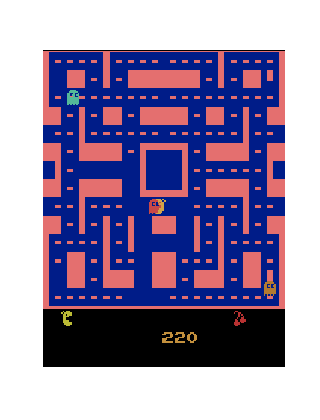
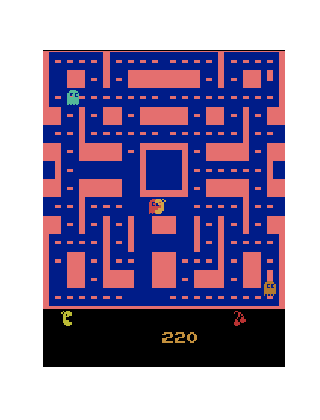
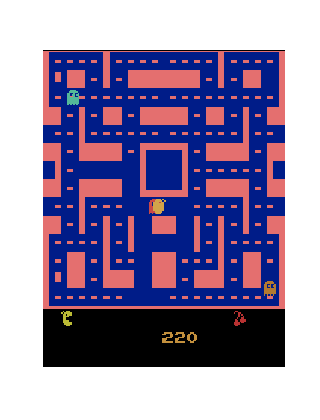
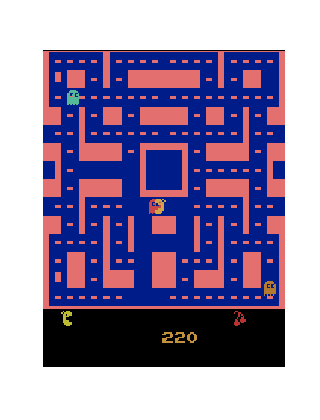
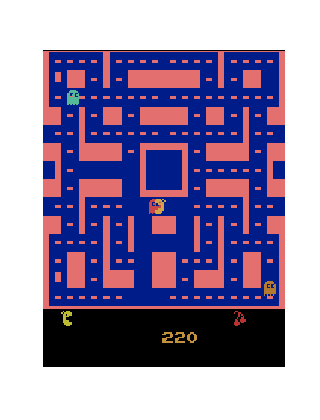
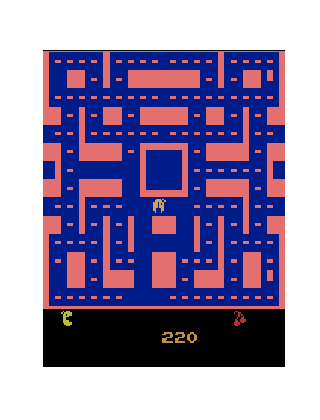
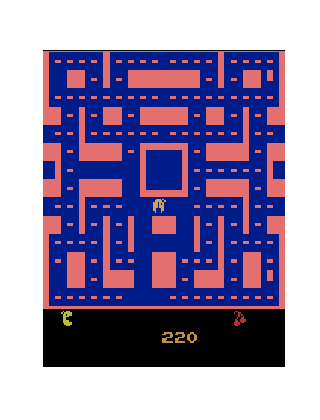
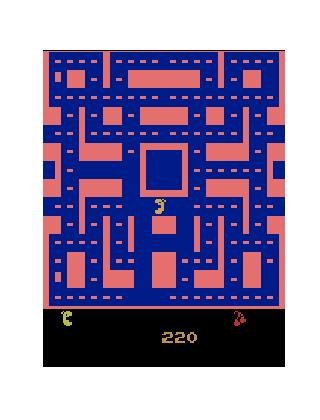
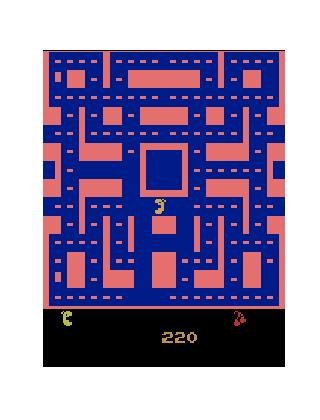
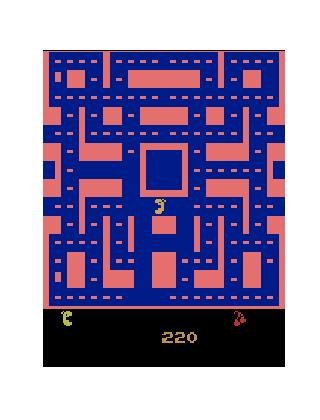
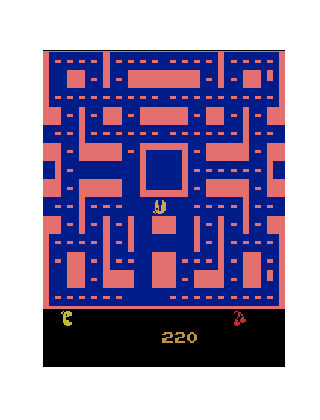
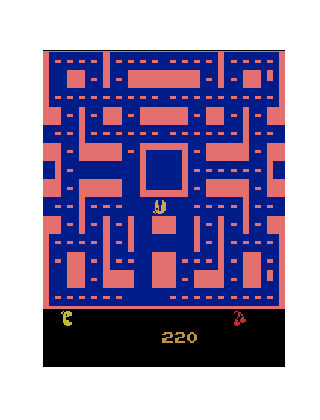
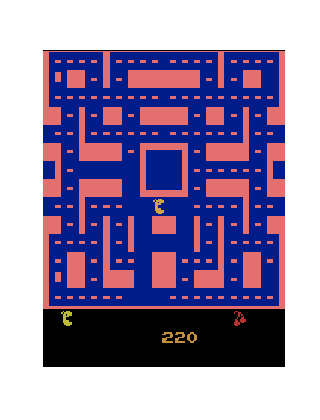
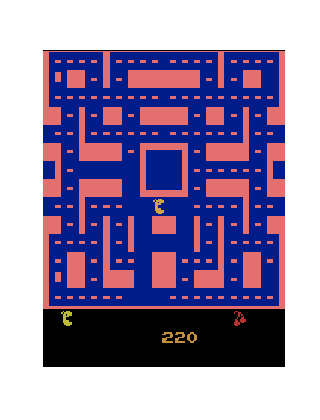
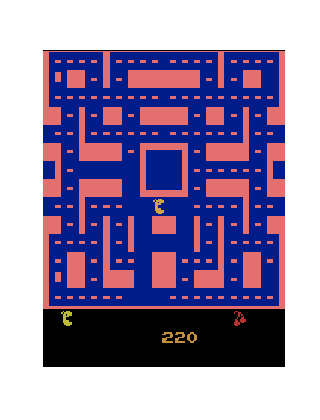
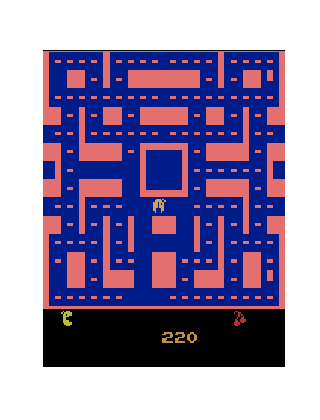
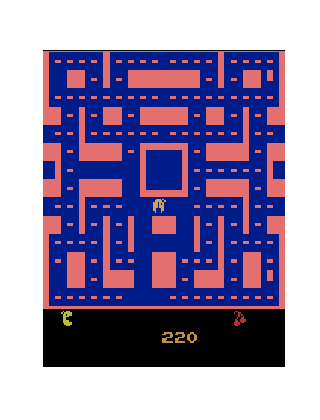
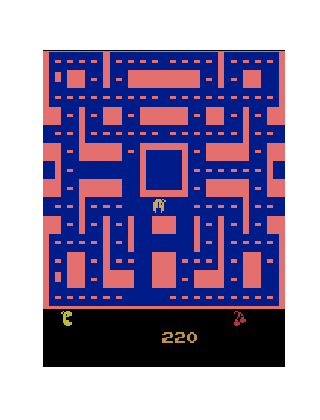
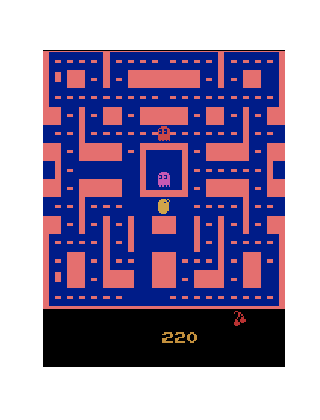
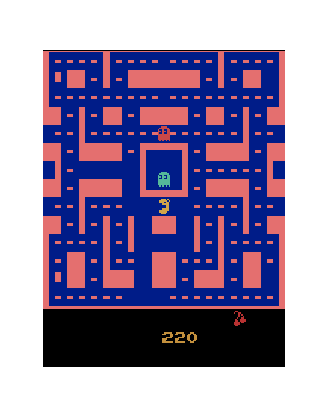
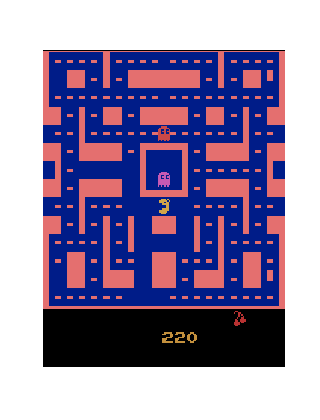
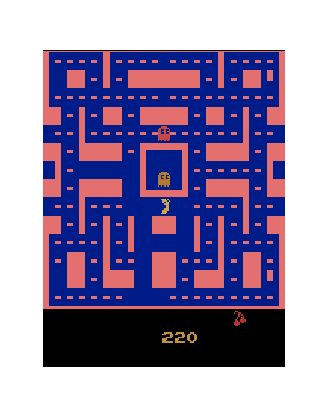
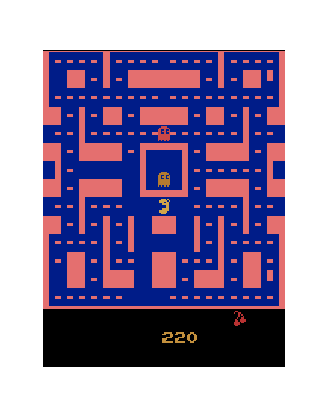
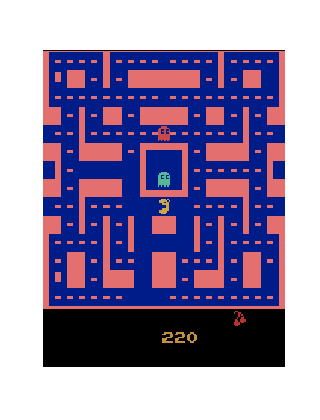
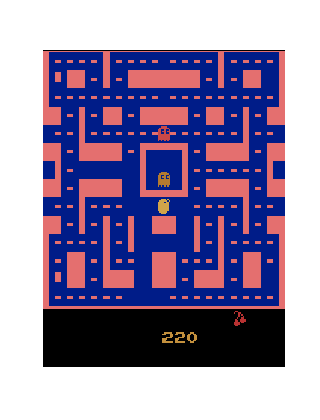
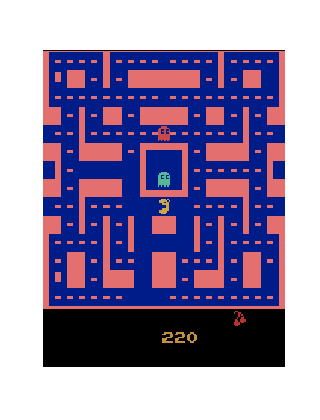
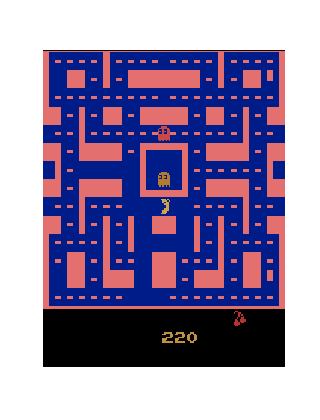
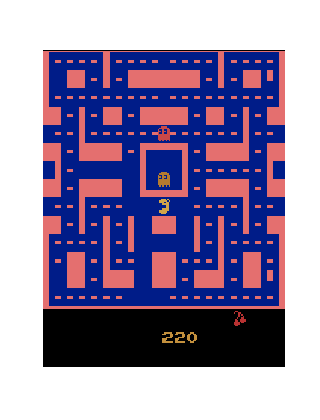
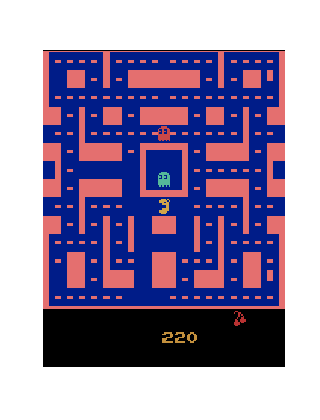
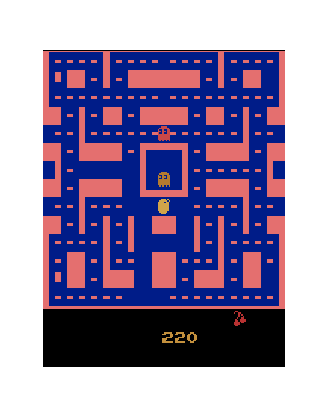
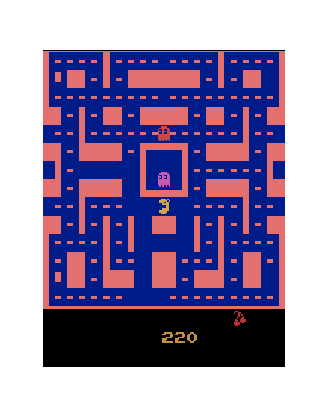
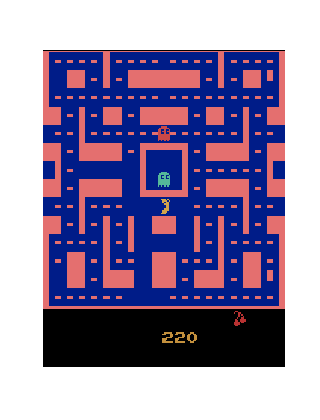
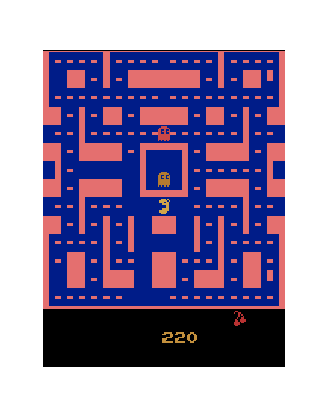
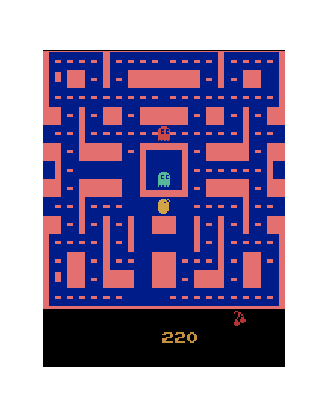
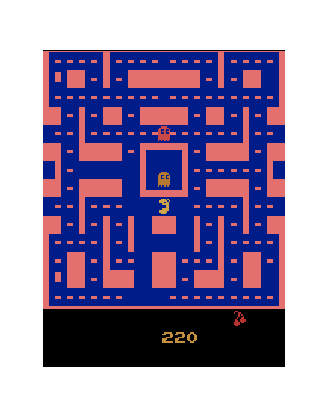
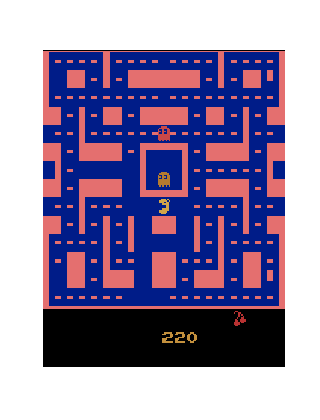
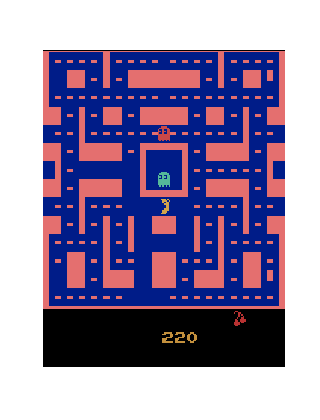
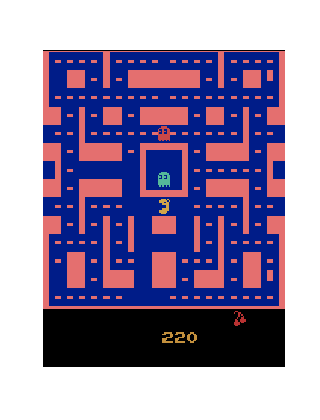
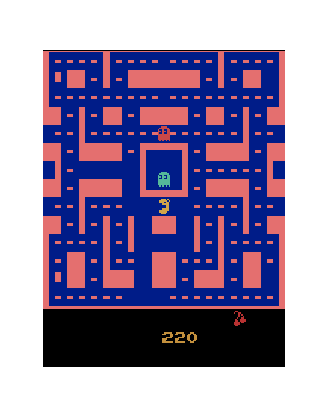
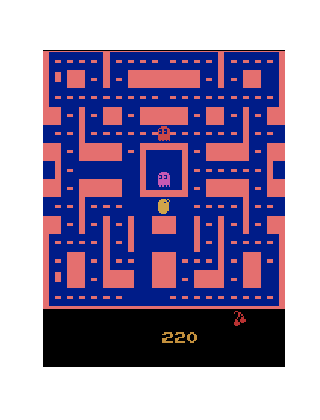
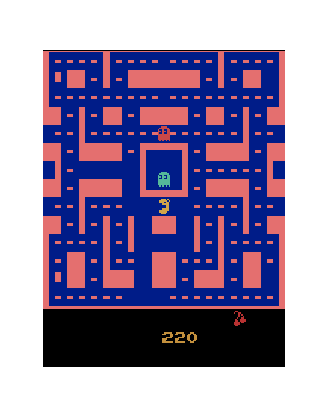
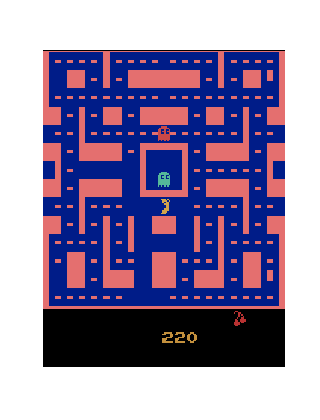
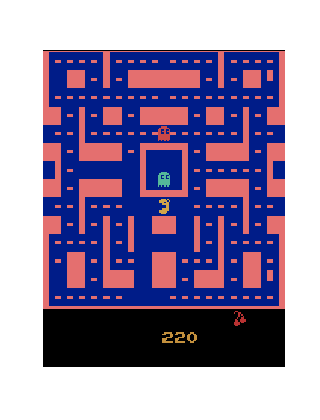
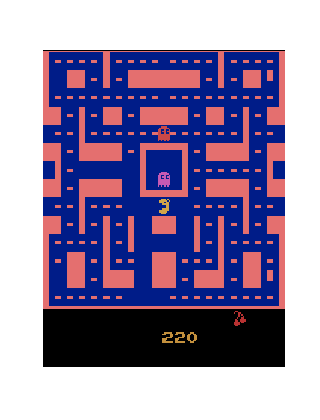
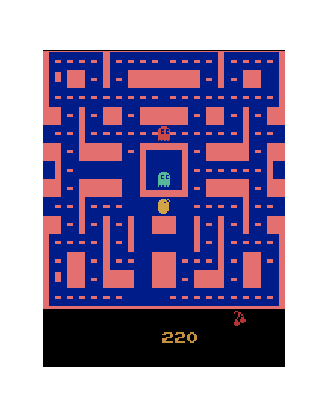
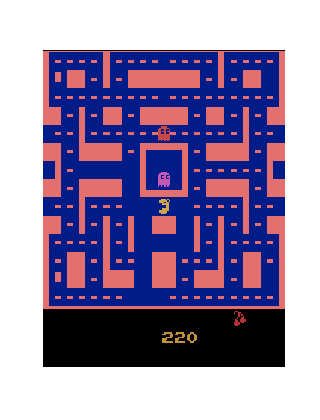
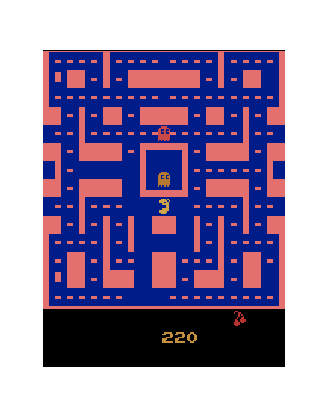
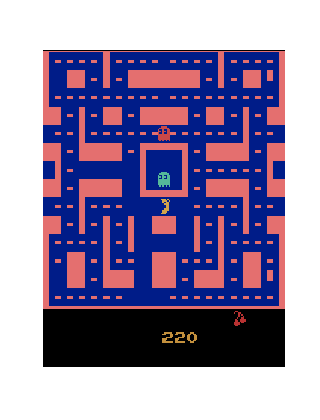
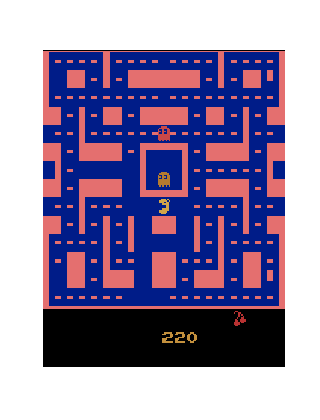
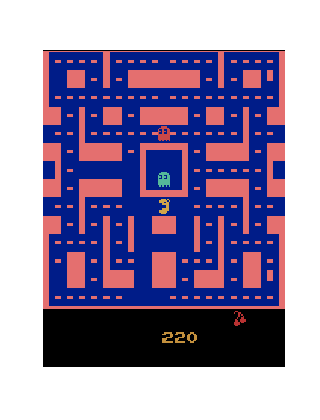
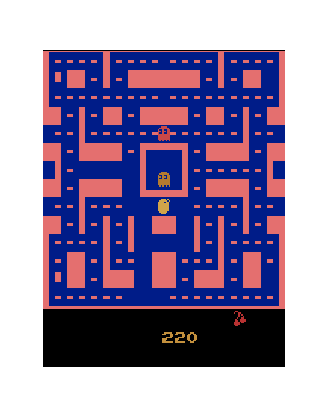
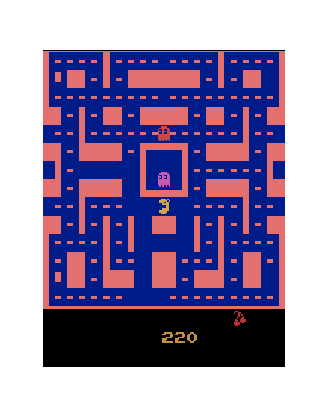
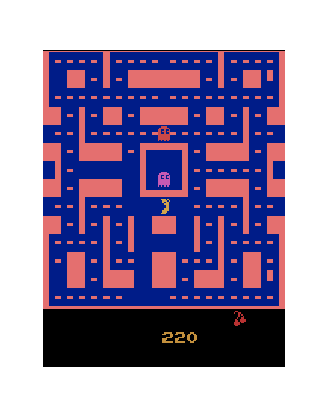
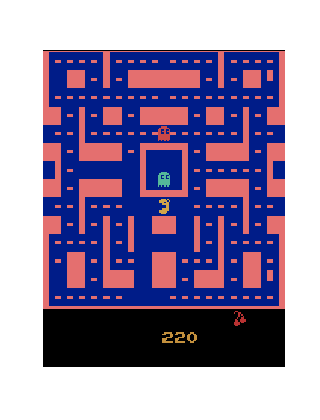
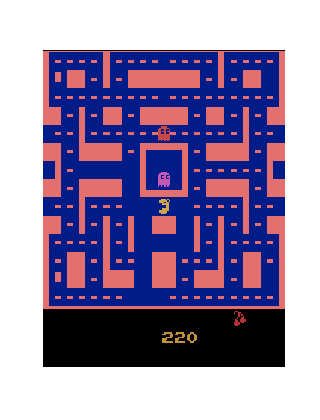
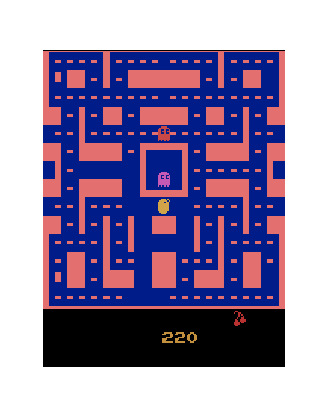
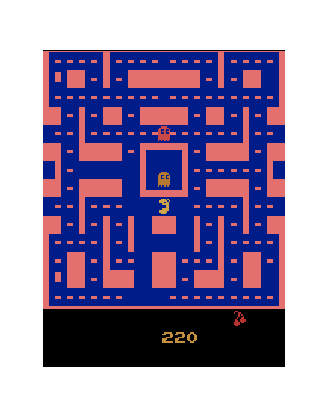
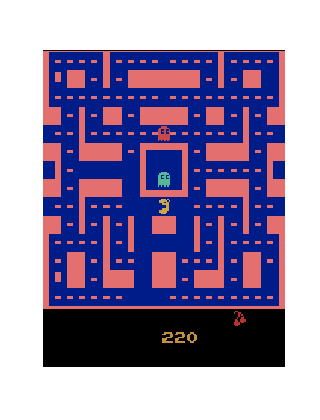
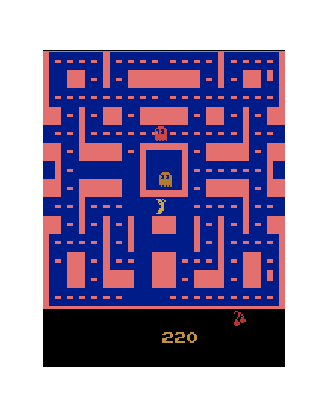
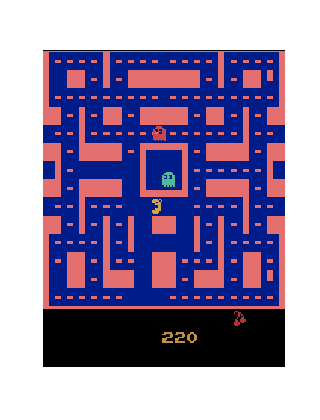
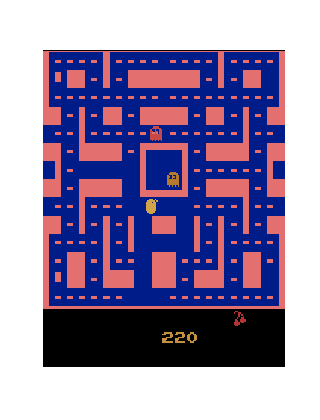
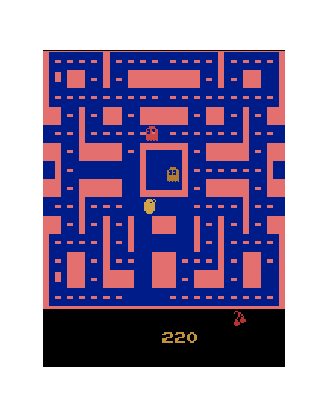
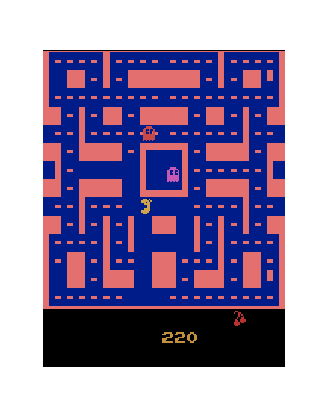
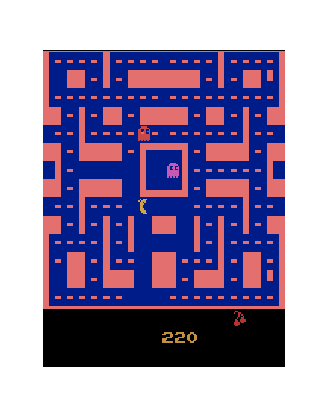
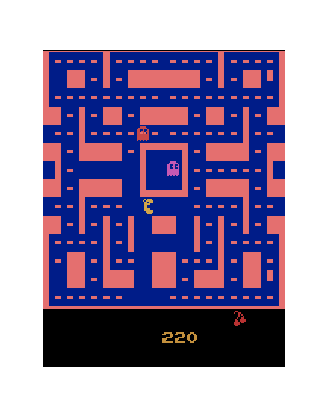
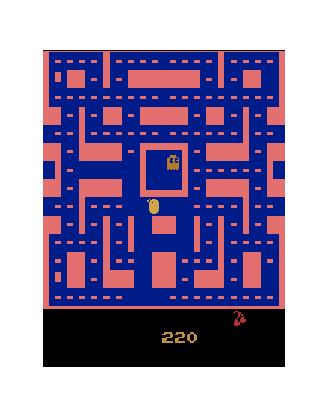
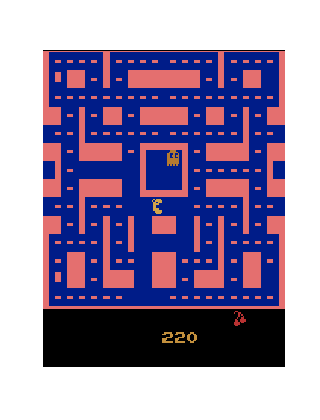
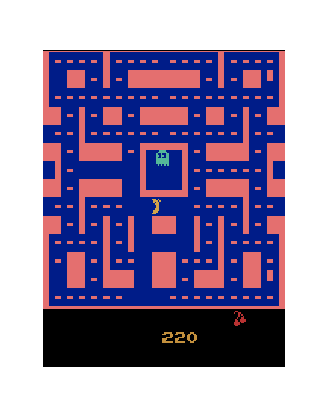
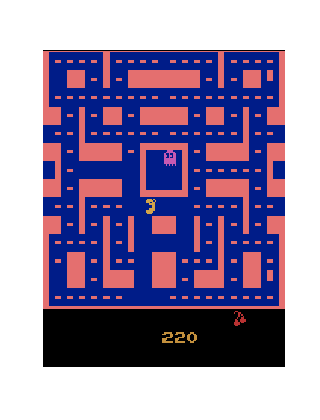
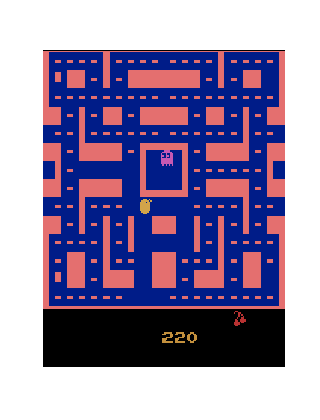
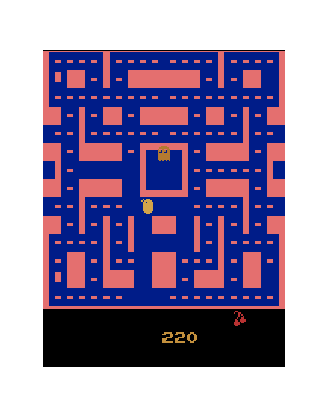
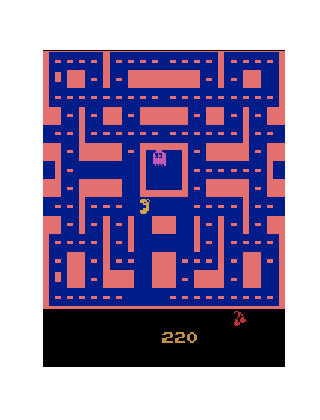
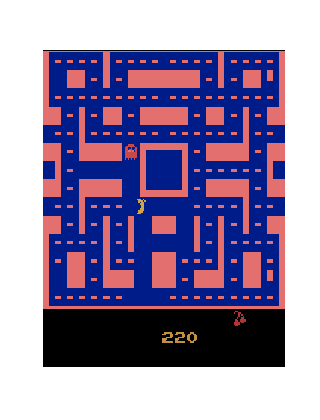
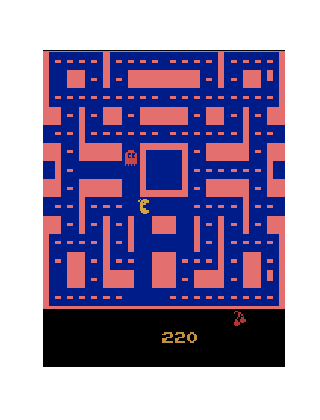
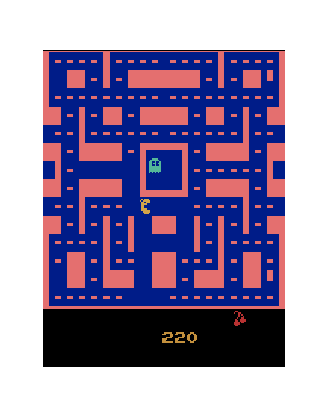
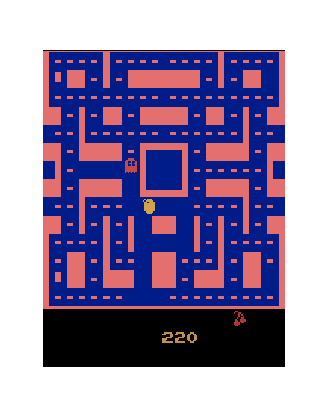
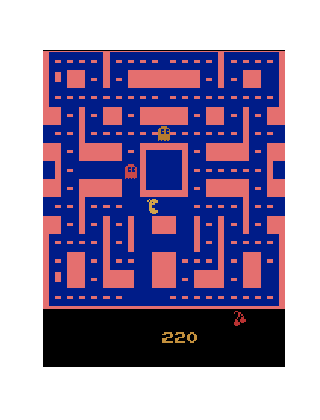
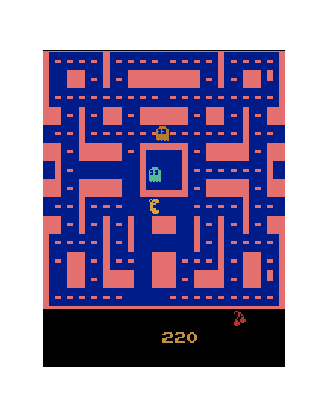
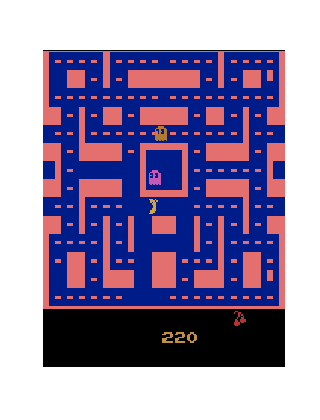
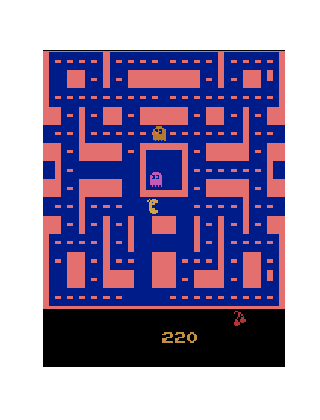
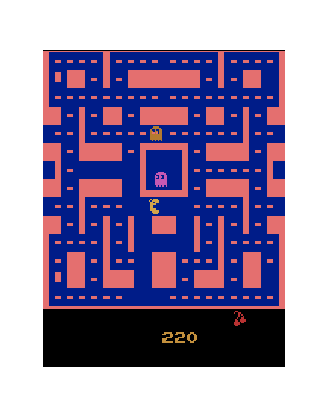
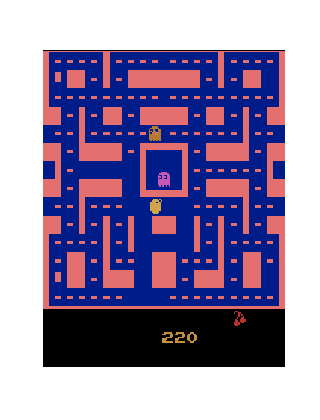
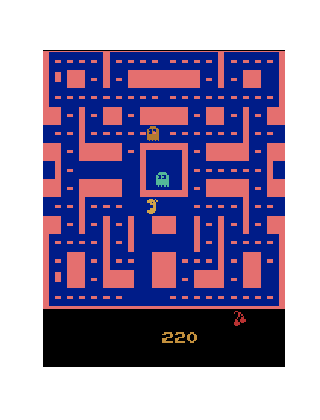
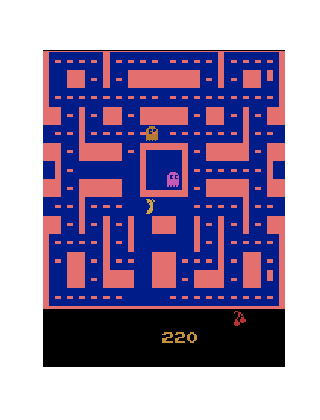
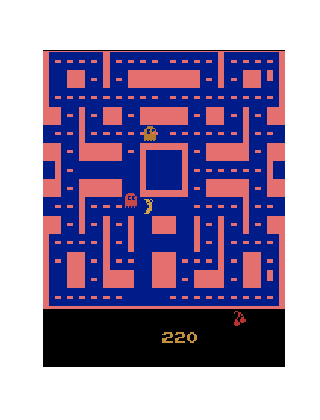
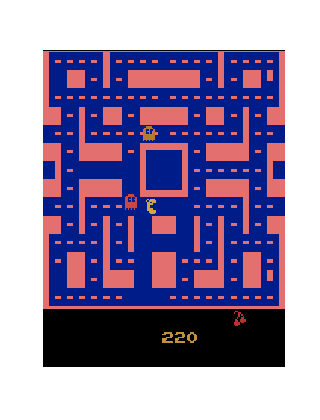
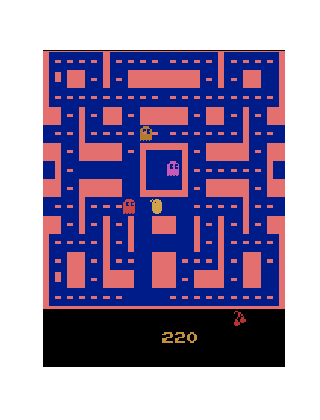
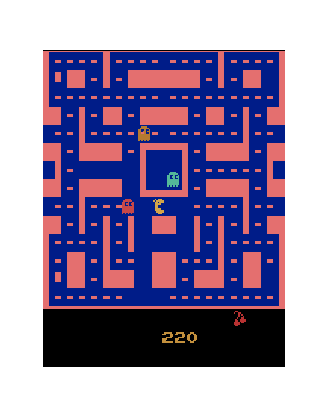
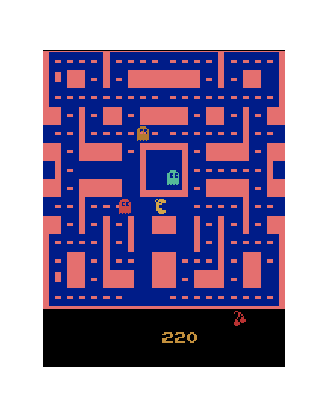
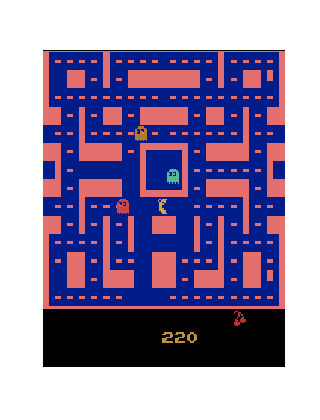
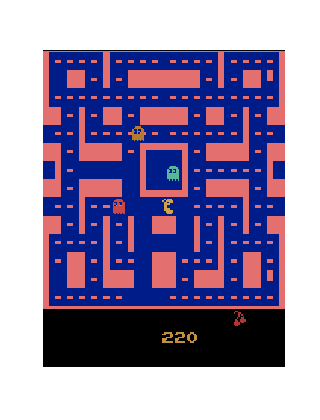
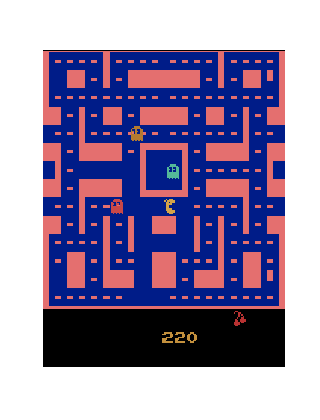
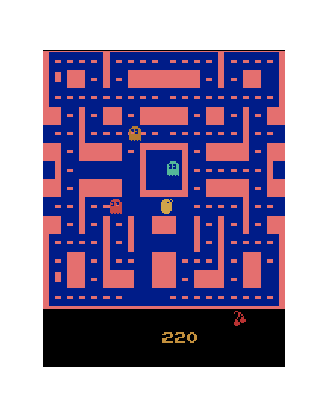
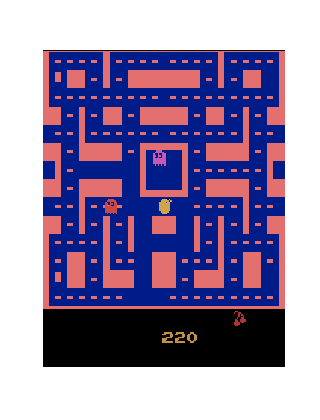
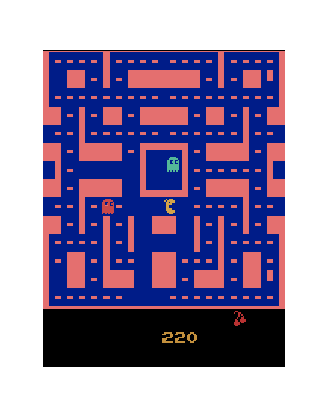
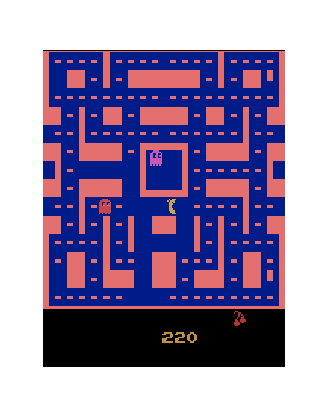
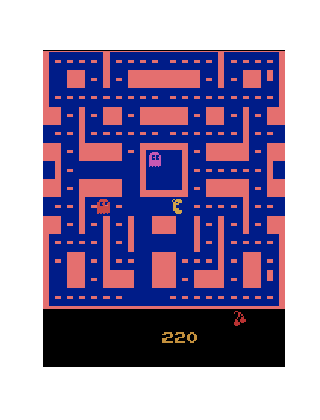
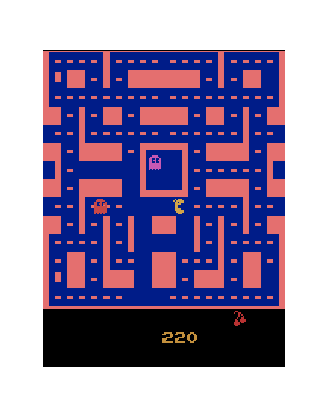
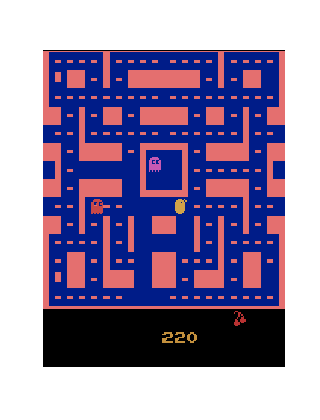
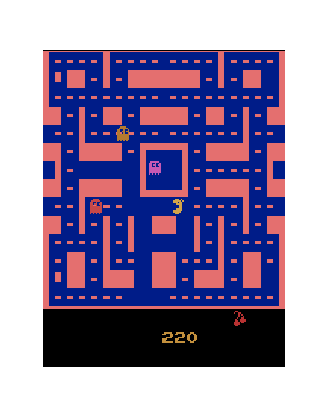
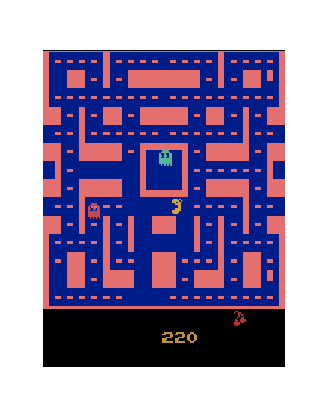
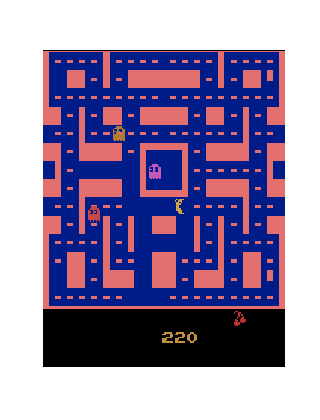
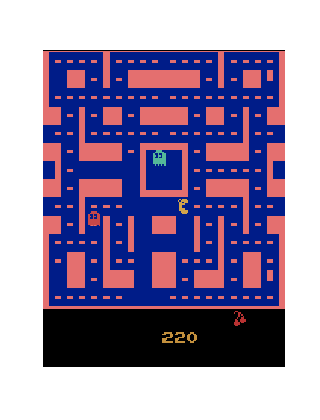
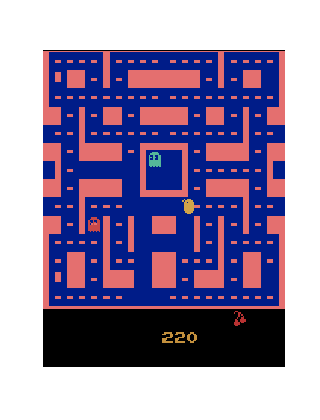
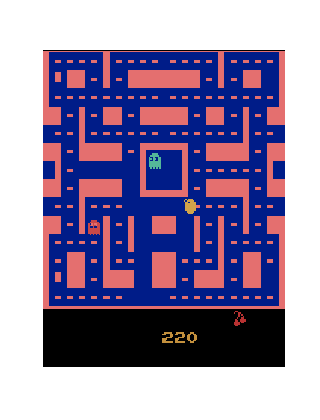
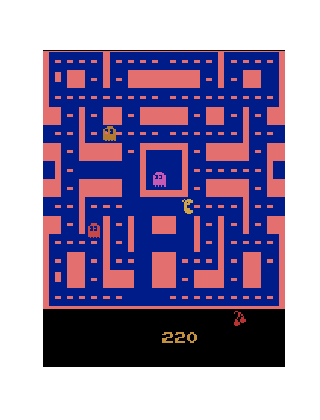
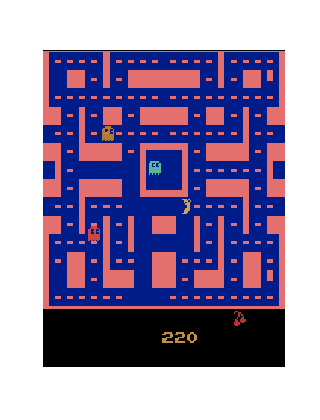
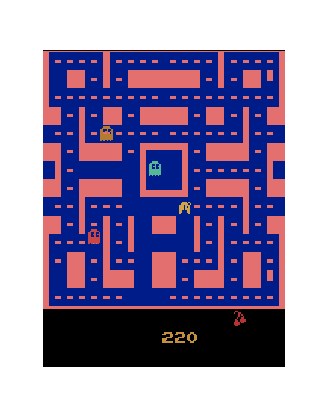
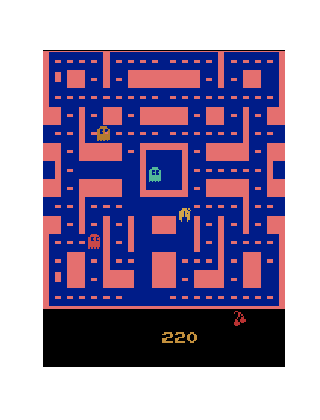
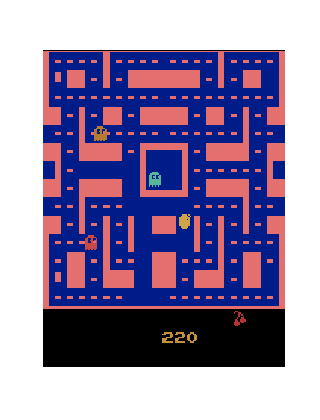
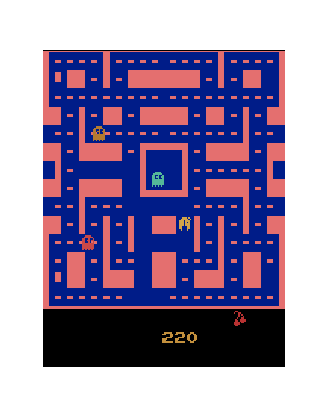
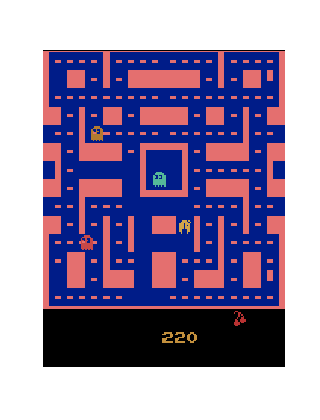
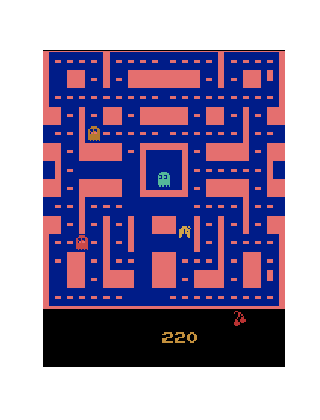
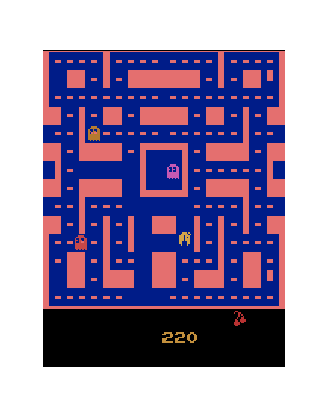
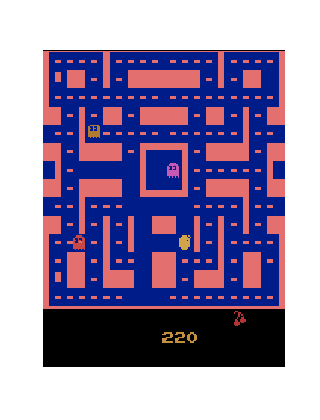
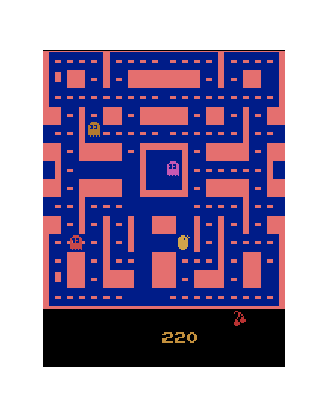
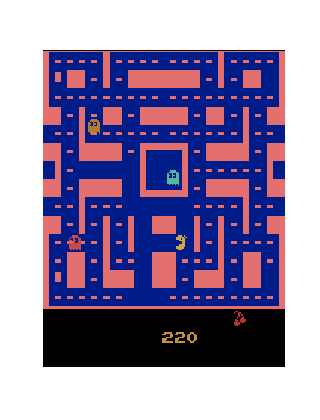
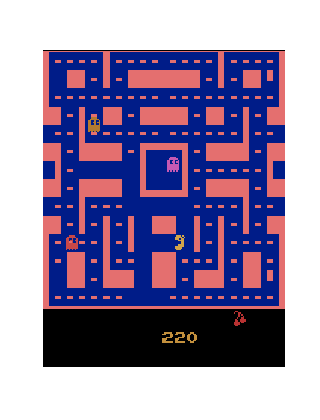
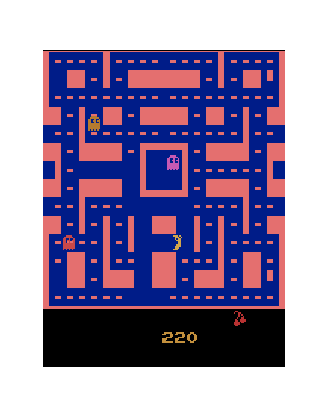
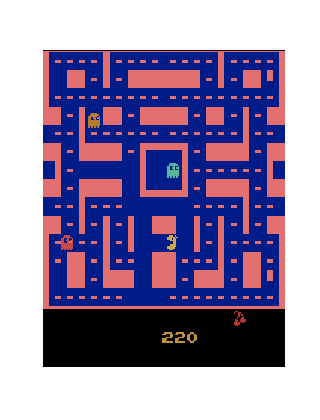
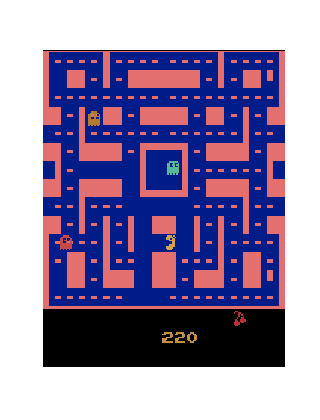
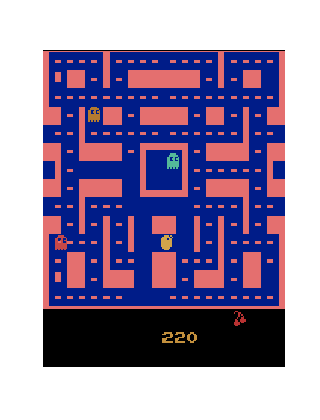
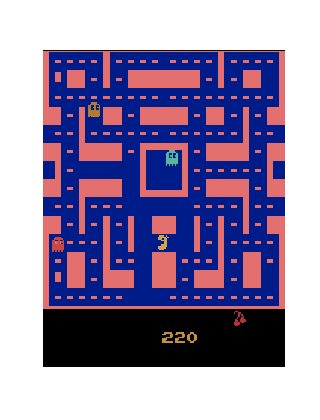
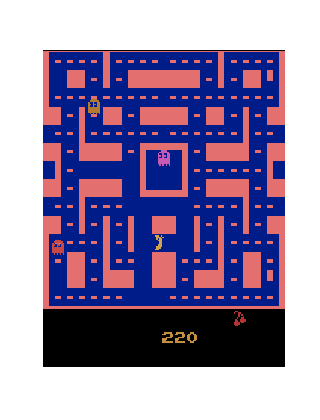
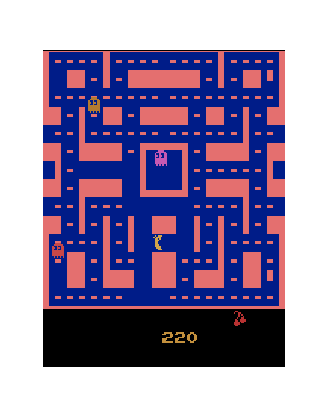
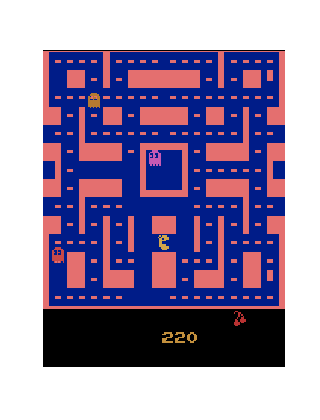
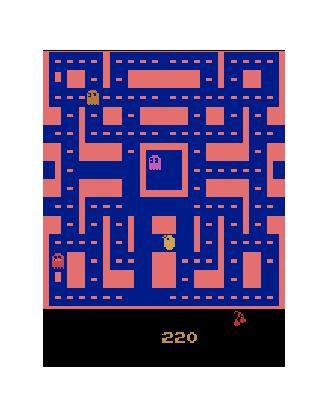
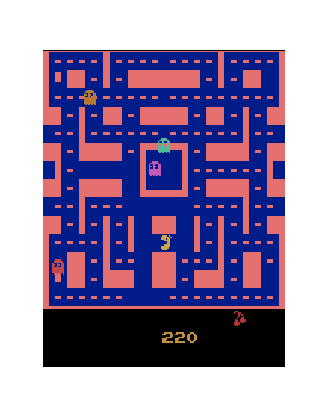
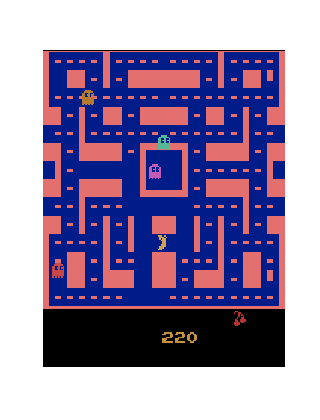
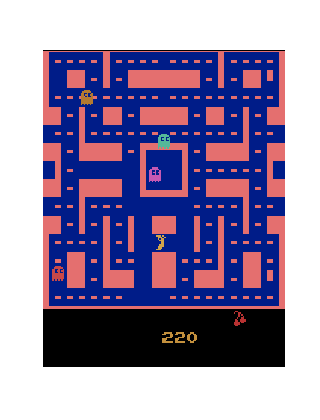
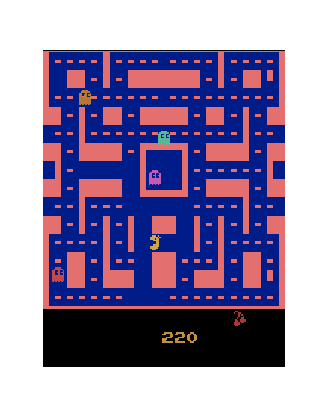
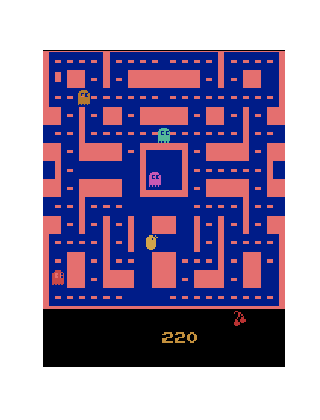
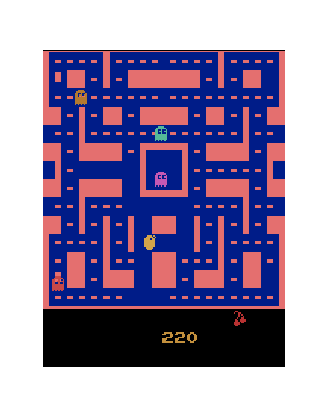
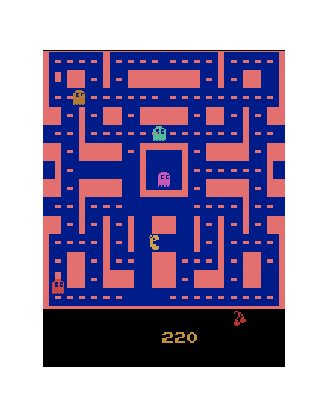
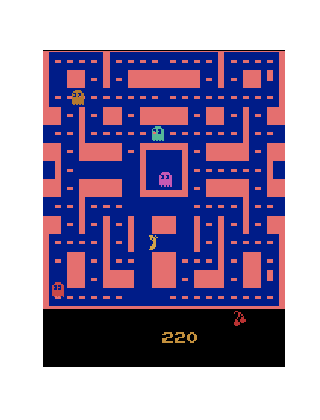
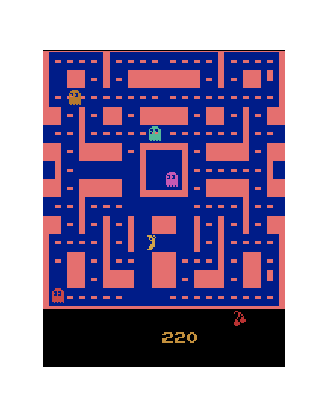
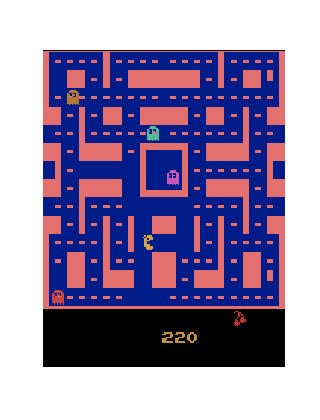
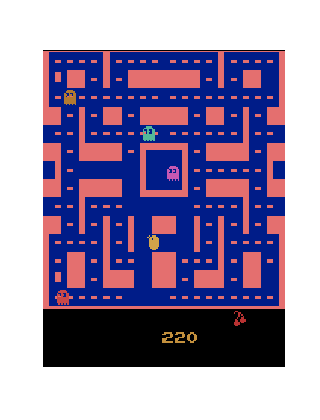
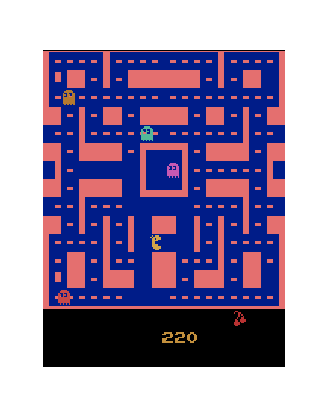
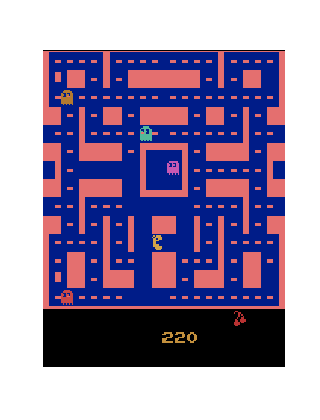
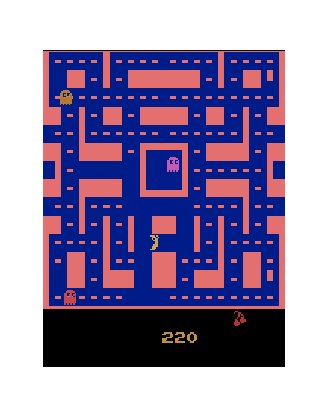
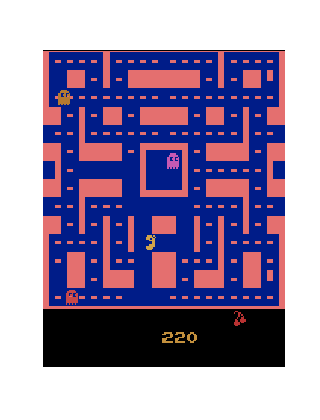
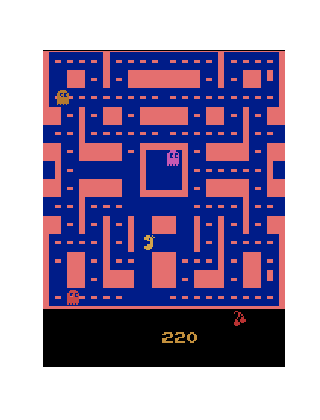
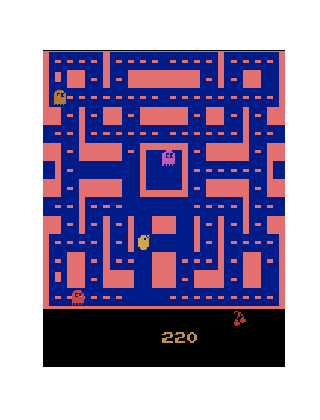
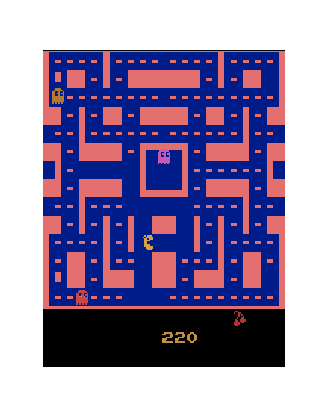
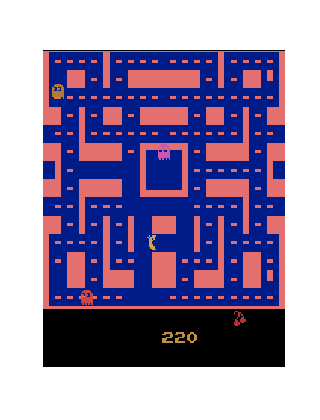
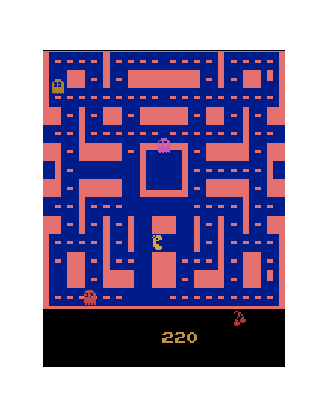
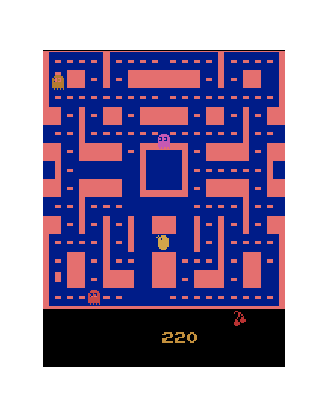
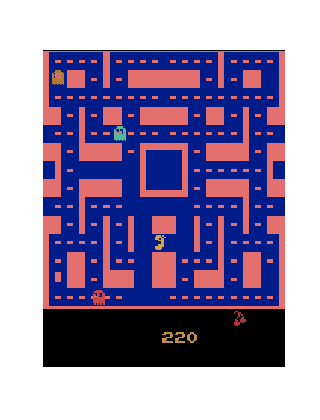
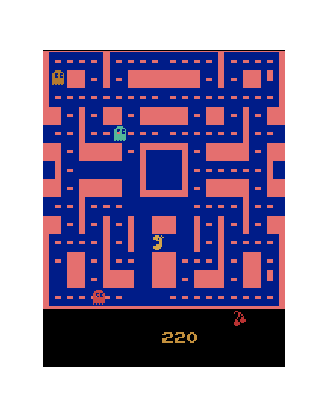
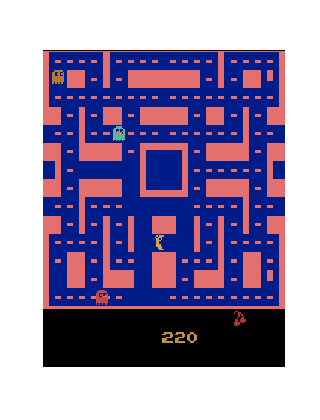
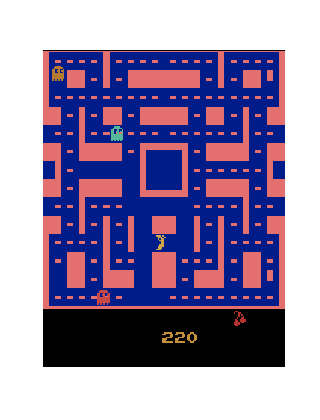
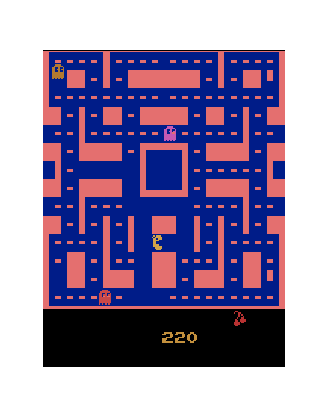
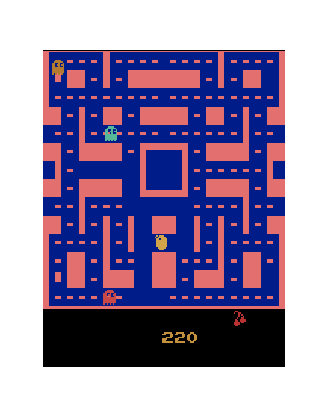
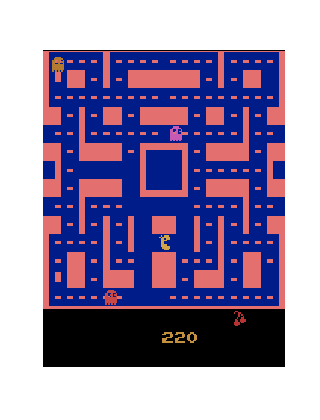
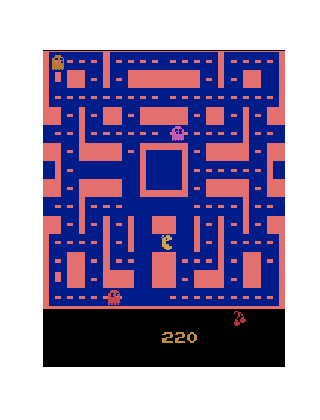
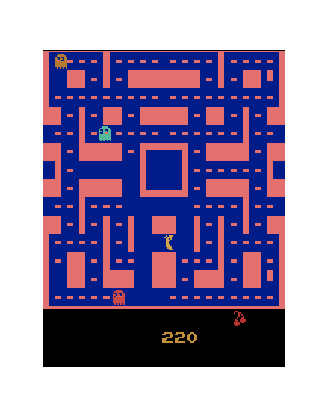
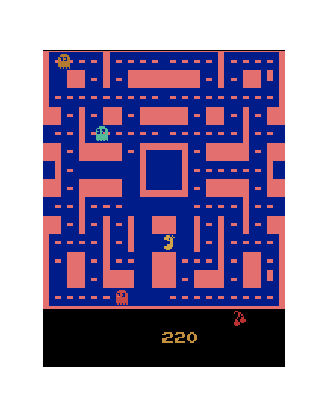
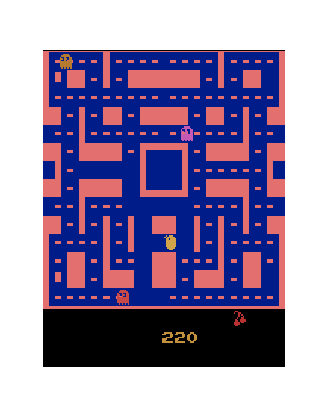
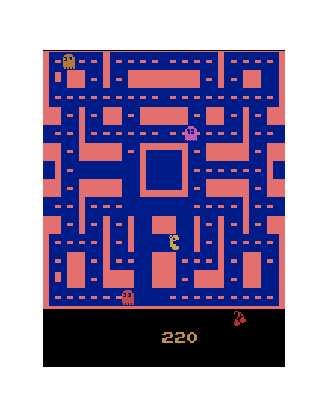
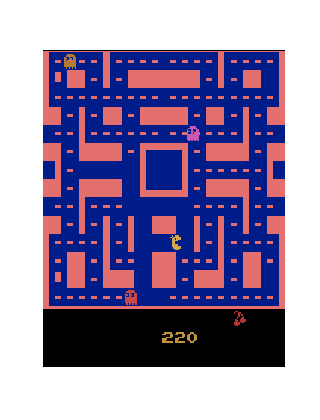
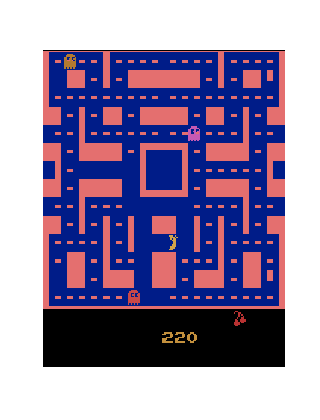
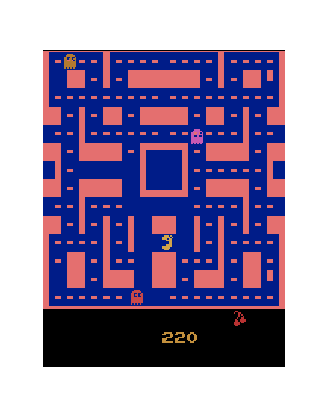
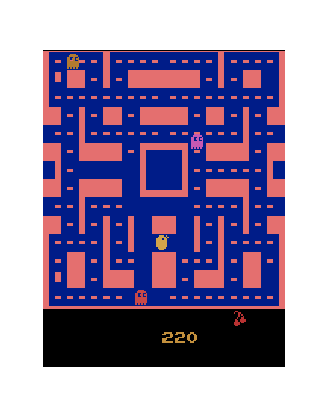
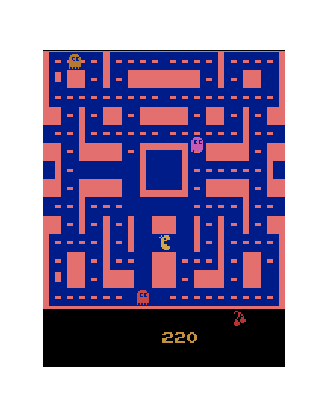
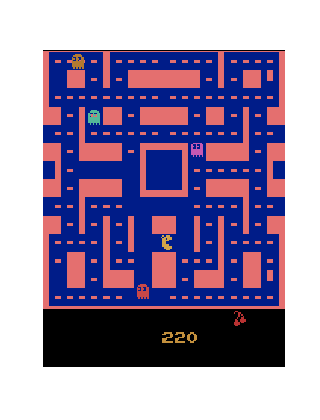
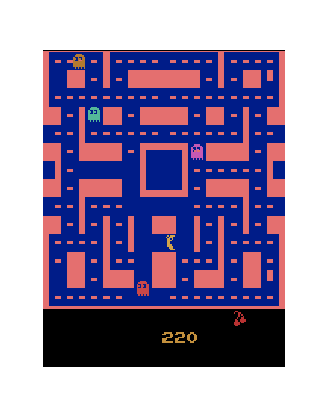
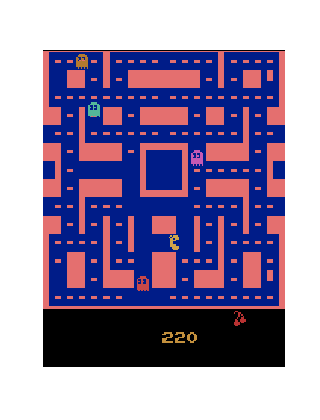
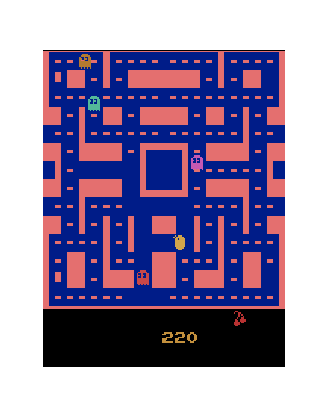
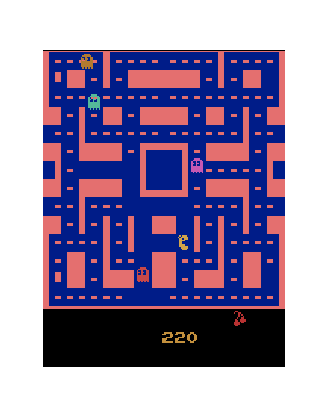
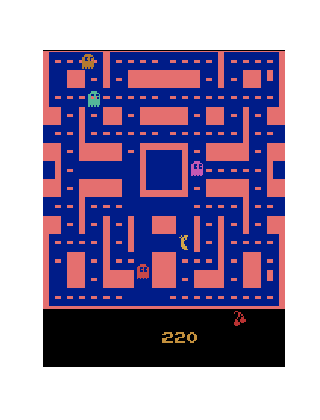
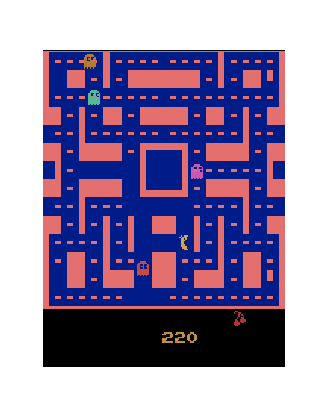
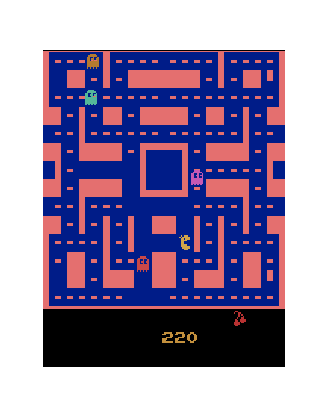
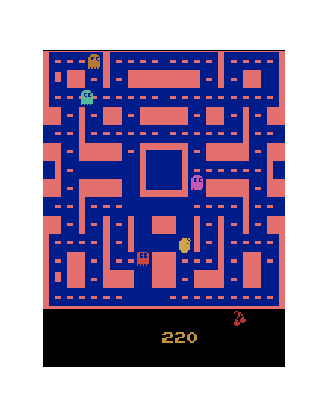
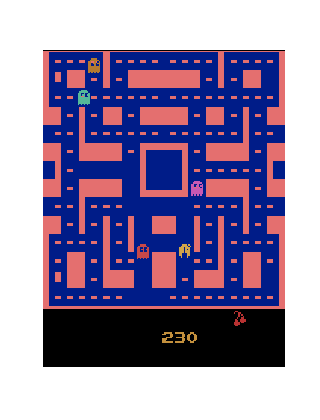
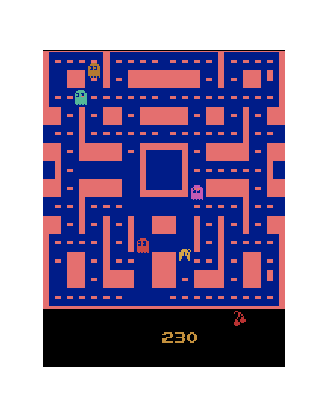
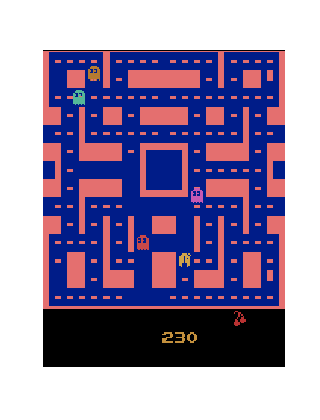
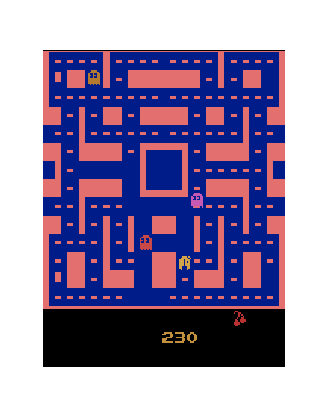
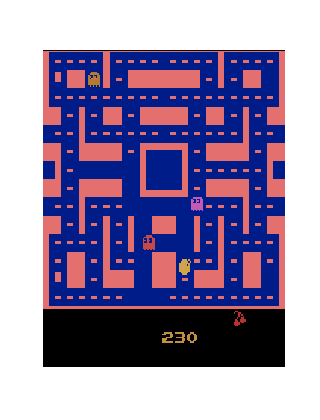
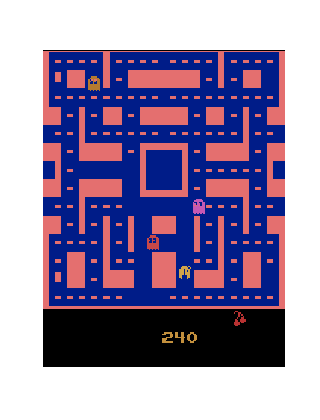
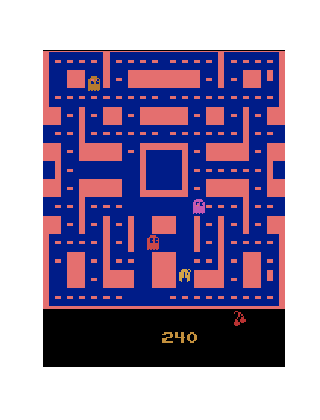
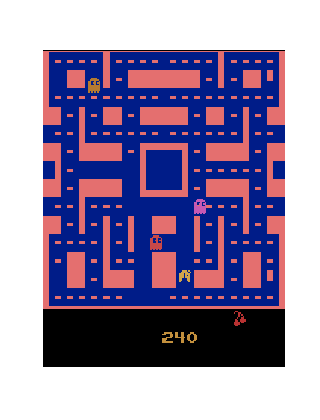
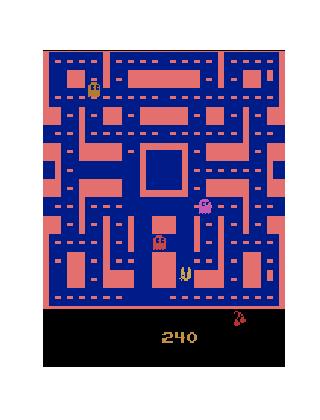
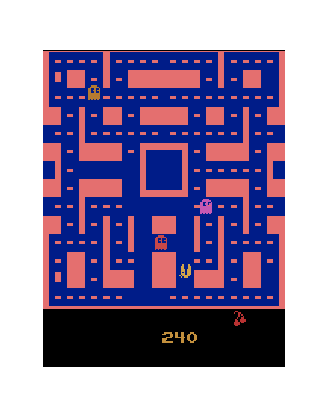
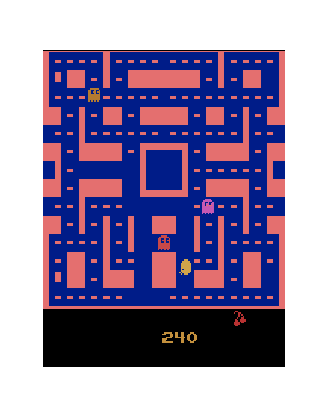
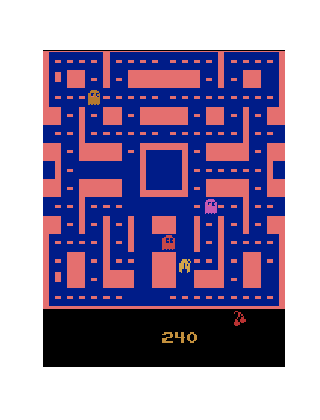
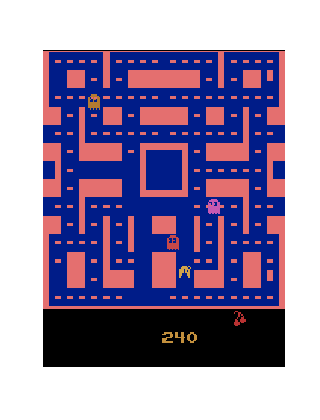
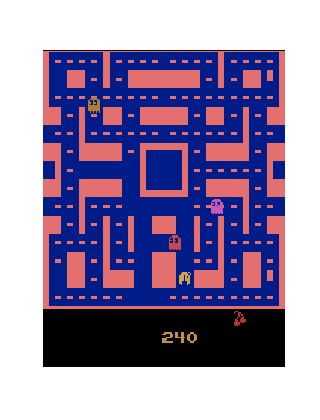
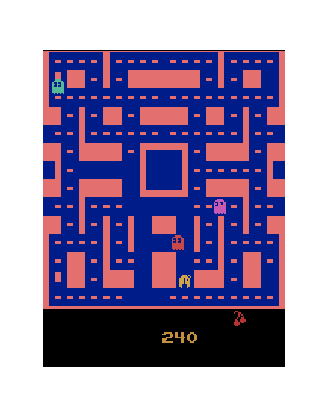
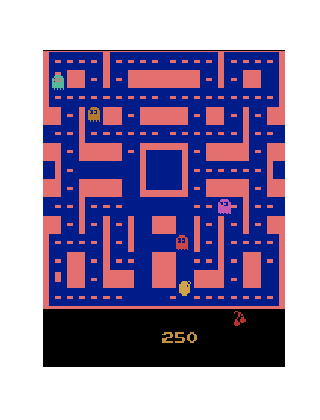
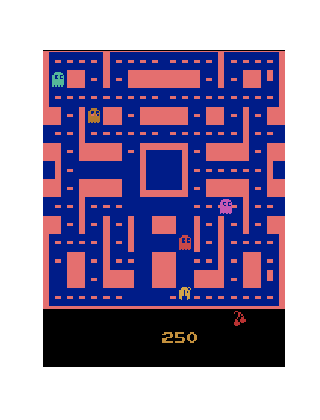
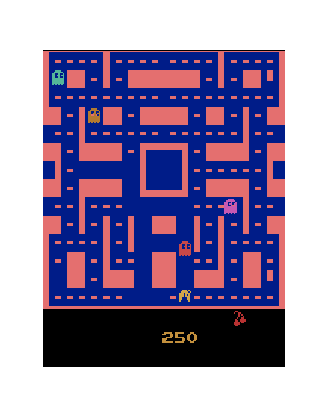
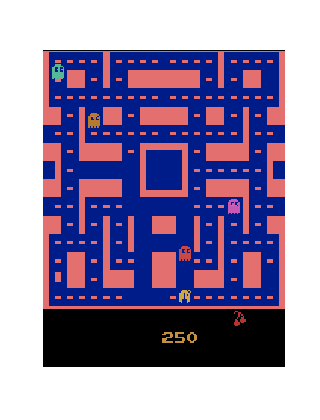
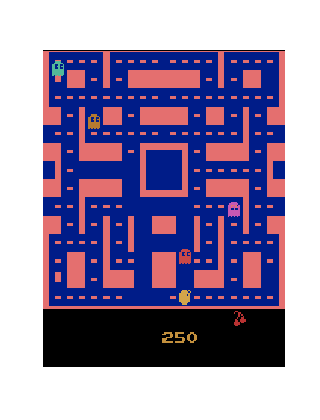
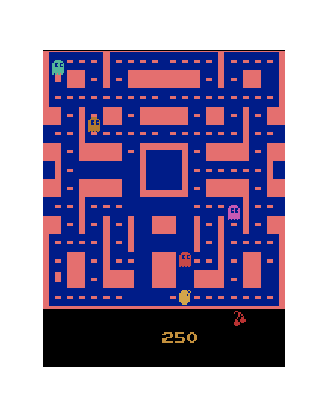
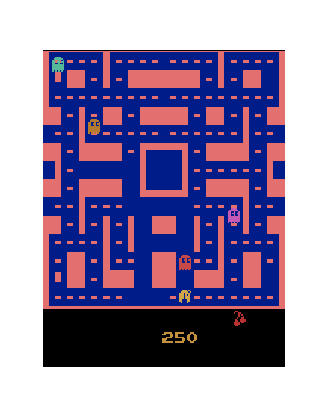
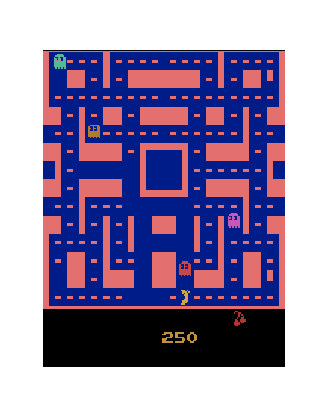
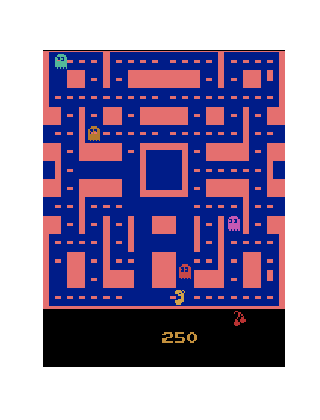
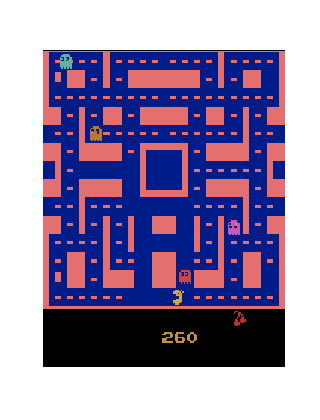
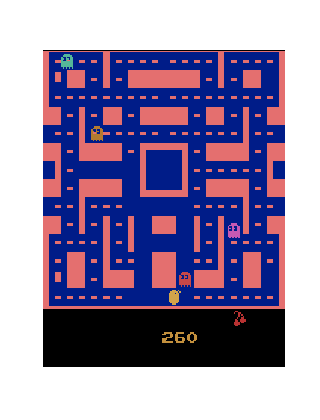
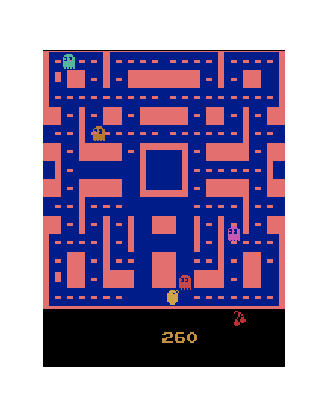
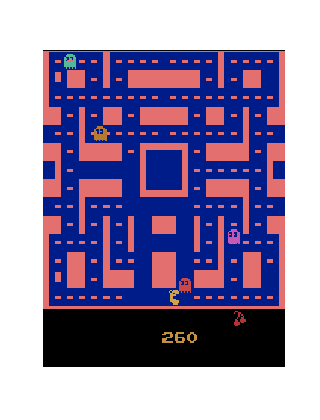
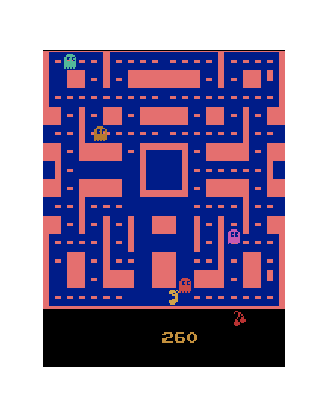
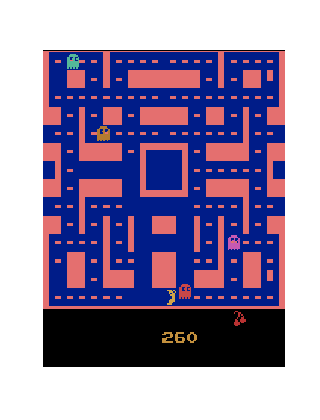
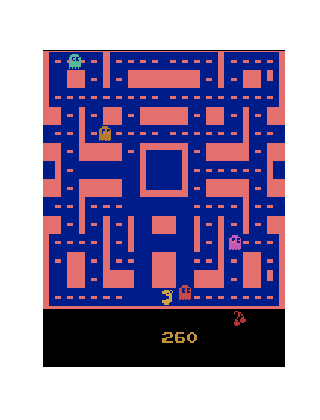
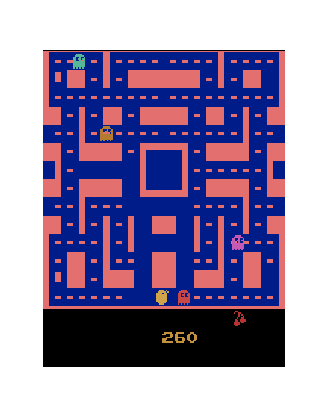
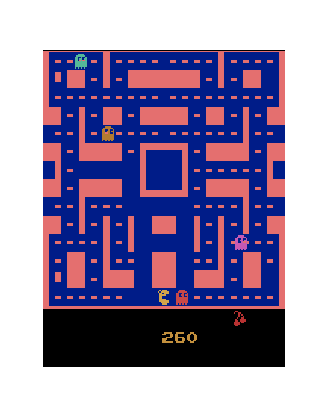
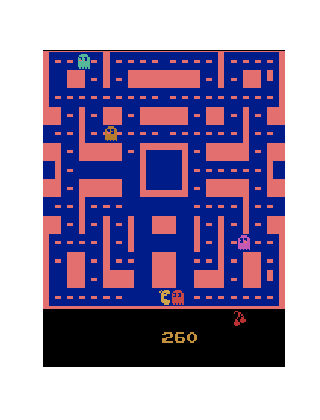
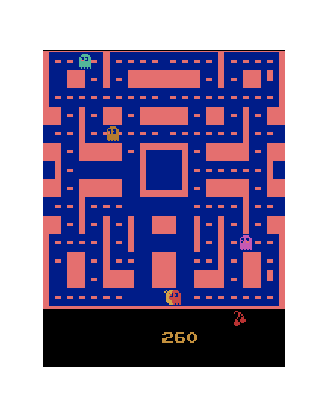
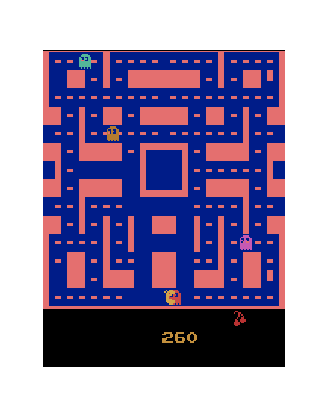
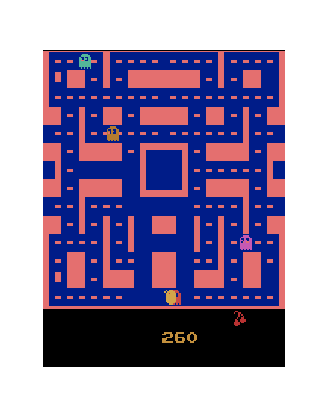
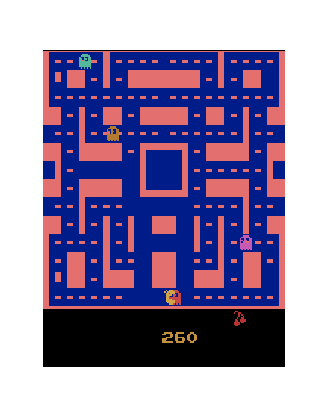
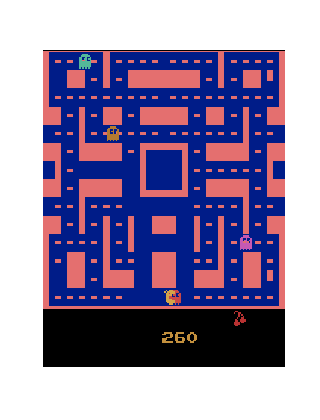
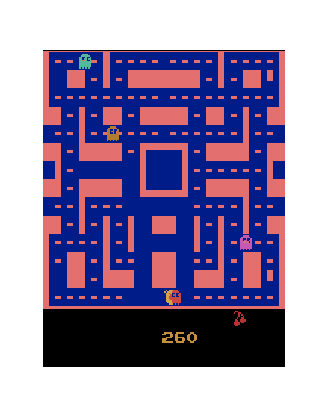
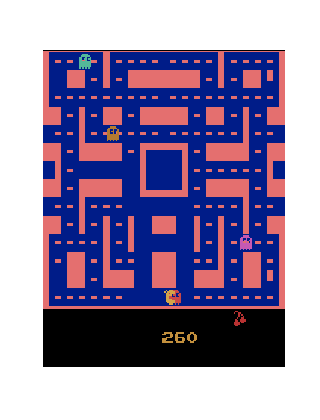
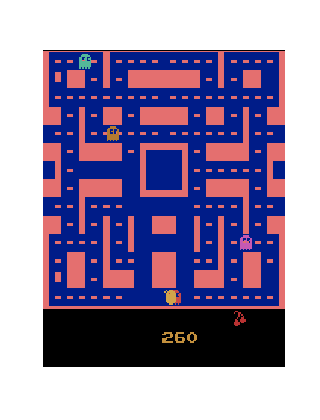
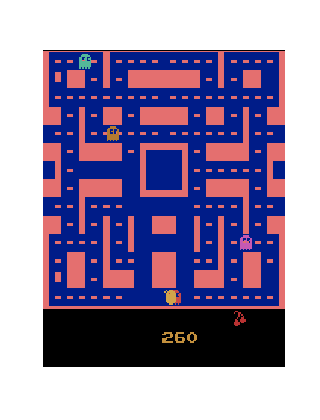
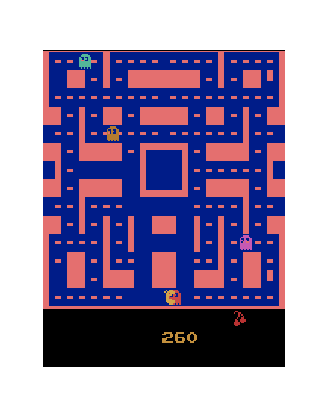
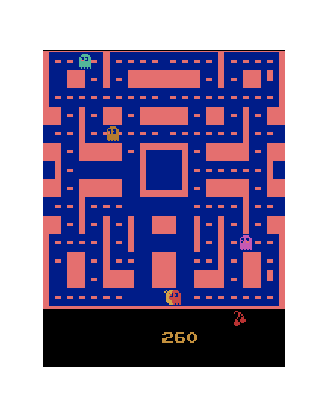
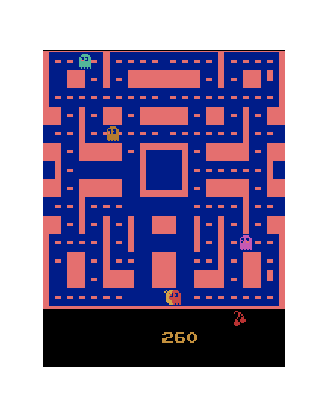
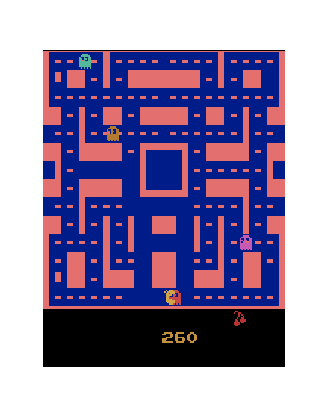
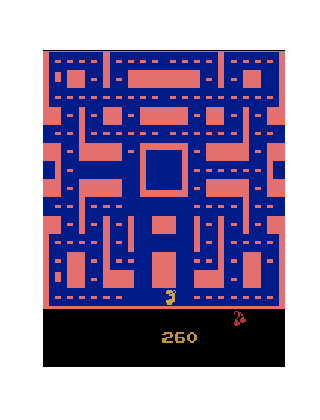
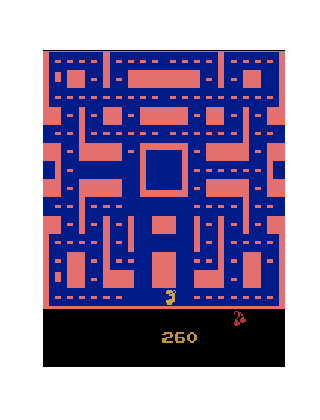
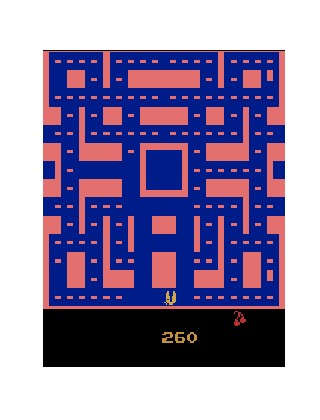
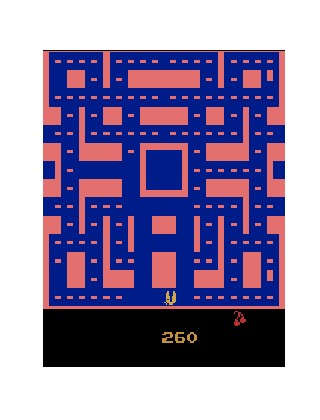
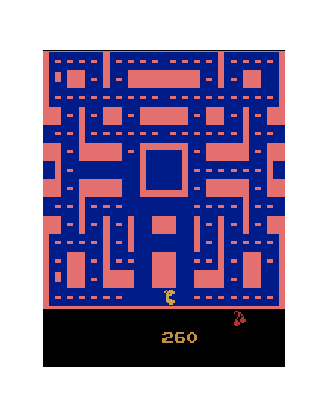
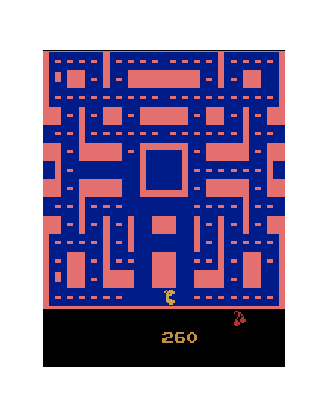
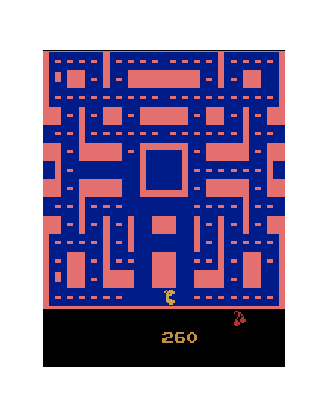
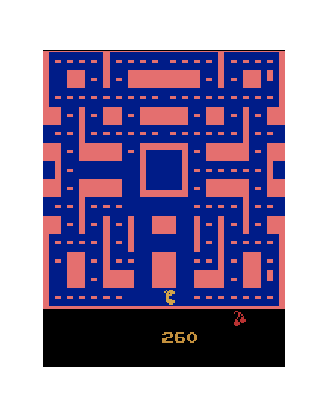
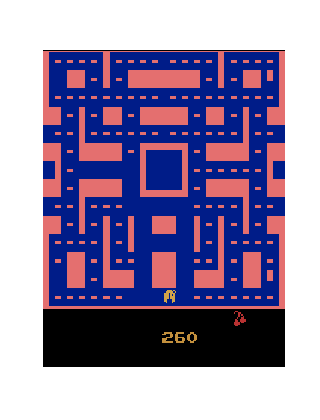
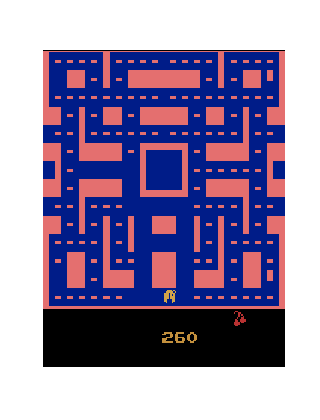
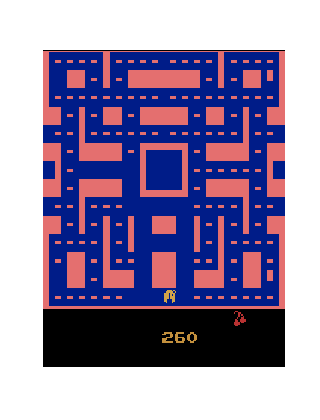
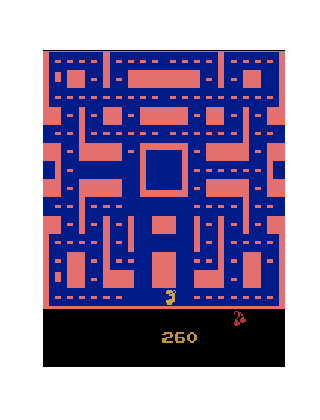
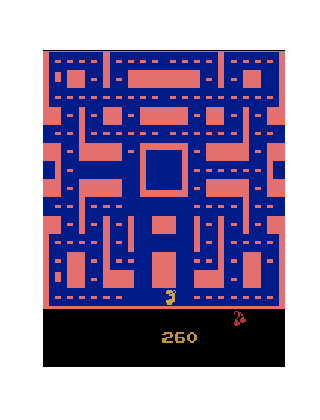

In [13]:
display_frames_as_gif(frames)

## Step 2b: Text based representations


## Step 3: Baselines

* https://github.com/openai/baselines
* https://github.com/openai/baselines/blob/master/docs/viz/viz.ipynb

In [0]:
# MsPacmanNoFrameskip-v4: Atari has no entropy source, so these are deterministic environments 
# https://github.com/openai/gym/blob/master/gym/envs/__init__.py#L498
!OPENAI_LOGDIR=$HOME/logs/cartpole-ppo OPENAI_LOG_FORMAT=csv python -m baselines.run --alg=ppo2 --env=MsPacmanNoFrameskip-v4 --num_timesteps=30000 --nsteps=128

env_type: atari
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
Training ppo2 on atari:MsPacmanNoFrameskip-v4 with arguments 
{'nsteps': 128, 'nminibatches': 4, 'lam': 0.95, 'gamma': 0.99, 'noptepochs': 4, 'log_interval': 1, 'ent_coef': 0.01, 'lr': <function atari.<locals>.<lambda> at 0x7fb0543e5c80>, 'cliprange': <function atari.<locals>.<lambda> at 0x7fb044d959d8>, 'network': 'cnn'}


In [4]:
from baselines.common import plot_util as pu
results = pu.load_results('~/logs/cartpole-ppo')

Logging to /tmp/openai-2018-12-20-09-35-25-320337


/content/src/berater/baselines/bench/monitor.py:164: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


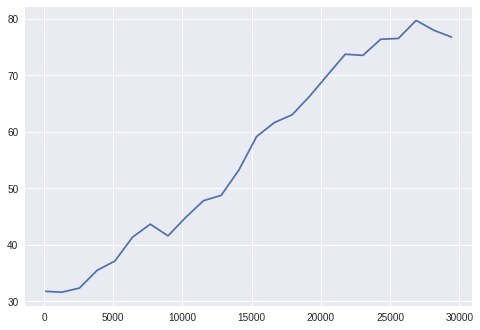

In [9]:
import matplotlib.pyplot as plt
import numpy as np
r = results[0]
plt.plot(r.progress.total_timesteps, r.progress.eprewmean)